# MADSC101-GVA05651  
## Data Science & Analytics in Business  
### FINALS


### 1. **Data Collection and Preparation**

For this project, we gathered datasets from multiple sources, each contributing relevant variables influencing coffee prices. These datasets included:### **Coffee Inventory:**
- Reflecting the supply dynamics of coffee in the mark
#### **Macroeconomic Indicators:**
- Variables such as China’s GDP YoY forecast, crude oil prices, the VIX index, and the DXY value, which represent economic and market t.

#### **Trade and Market Data:**
- Including Colombia's coffee exports, non-commercial net positions, and sugar prices, which capture market behavior and related commodity mnts.

#### **Consumption Data:**
- USDA's coffee consumption data indicating demand-side factors.

### **Data Preparation**

#### **Data Integration:**
- We merged datasets on shared timeframes, ensuring alignment across all variables.

#### **Renaming and Formatting:**
- Standardized column names (e.g., renaming `dxy` to `dxy_value`) for consistency.

#### **Feature Selection:**
- Focused on the most relevant variables based on domain knowledge and correlation analysis.

#### **Handling Missing Values:**
- Addressed any missing data points using imputation techniques or domain-specific logic.

#### **Normalization and Scaling:**
- Ensured comparability of features by scaling values where needed (e.g., inventories in thousands of bags).


In [4]:
import sqlite3

# Connect to the SQLite database
db_path = "exercise.sqlite"  # Replace with your database file path
conn = sqlite3.connect(db_path)


In [5]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = conn.execute(query).fetchall()
print(tables)


[('variables_reference',), ('sqlite_sequence',), ('data',)]


In [6]:
query = "PRAGMA table_info(variables_reference);"  # Replace with the table name
schema = conn.execute(query).fetchall()
print(schema)


[(0, 'id_variable', 'INTEGER', 0, None, 1), (1, 'variable', 'VARCHAR(255)', 1, None, 0)]


In [7]:
query = "SELECT * FROM data;"  # Replace with your table name
data = conn.execute(query).fetchall()
print(data)


[('1990-12-31', 20995.0, 1), ('1991-12-31', 22265.0, 1), ('1992-12-31', 22266.0, 1), ('1993-12-31', 21579.0, 1), ('1994-12-31', 22928.0, 1), ('1995-12-31', 22526.0, 1), ('1996-12-31', 24049.0, 1), ('1997-12-31', 24361.0, 1), ('1998-12-31', 25180.0, 1), ('1999-12-31', 25738.0, 1), ('2000-12-31', 25588.0, 1), ('2001-12-31', 26303.0, 1), ('2002-12-31', 27575.0, 1), ('2003-12-31', 114195.0, 1), ('2004-12-31', 117420.0, 1), ('2005-12-31', 116535.0, 1), ('2006-12-31', 124100.0, 1), ('2007-12-31', 123336.0, 1), ('2008-12-31', 128010.0, 1), ('2009-12-31', 124935.0, 1), ('2010-12-31', 138276.0, 1), ('2011-12-31', 134495.0, 1), ('2012-12-31', 141526.0, 1), ('2013-12-31', 142139.0, 1), ('2014-12-31', 142389.0, 1), ('2015-12-31', 145637.0, 1), ('2016-12-31', 152728.0, 1), ('2017-12-31', 154294.0, 1), ('2018-12-31', 160274.0, 1), ('2019-12-31', 163589.0, 1), ('2018-01-19', 6.2, 2), ('2018-01-22', 6.2, 2), ('2018-01-23', 6.2, 2), ('2018-01-24', 6.2, 2), ('2018-01-25', 6.2, 2), ('2018-01-26', 6.2, 2)

In [8]:
query = "SELECT * FROM sqlite_sequence;"  # Replace with your table name
data = conn.execute(query).fetchall()
print(data)


[('variables_reference', 9)]


In [9]:
query = "SELECT * FROM variables_reference;"  # Replace with your table name
data = conn.execute(query).fetchall()
print(data)


[(1, 'coffee_total_consumption_usda'), (2, 'china_gdp_yoy_forecast'), (3, 'sugar_nearby'), (4, 'crude_nearby'), (5, 'coffee_nearby'), (6, 'vix_index'), (7, 'colombia_coffee_exports'), (8, 'non_commercial_net_position'), (9, 'coffee_inventory')]


In [10]:
import pandas as pd

query = "SELECT * FROM data;"  # Replace with your table name
df = pd.read_sql_query(query, conn)
print(df)


             date      value  id_variable
0      1990-12-31    20995.0            1
1      1991-12-31    22265.0            1
2      1992-12-31    22266.0            1
3      1993-12-31    21579.0            1
4      1994-12-31    22928.0            1
...           ...        ...          ...
38023  2020-02-04  2165770.0            9
38024  2020-02-05  2166495.0            9
38025  2020-02-06  2166185.0            9
38026  2020-02-07  2164799.0            9
38027  2020-02-10  2166601.0            9

[38028 rows x 3 columns]


In [11]:
import sqlite3
import pandas as pd

# Connect to SQLite database
db_path = "exercise.sqlite"  # Replace with your database file path
conn = sqlite3.connect(db_path)

# Query to extract data from 'data' table
query = """
SELECT date, value, id_variable
FROM data;
"""
data_df = pd.read_sql_query(query, conn)

# Query to extract variable names from 'variables_reference' table
variables_query = """
SELECT id_variable, variable
FROM variables_reference;
"""
variables_df = pd.read_sql_query(variables_query, conn)

# Close the connection
conn.close()

# Merge the variable names with the data table
data_with_names_df = pd.merge(data_df, variables_df, on="id_variable", how="left")

# Inspect the merged DataFrame
print(data_with_names_df)


             date      value  id_variable                       variable
0      1990-12-31    20995.0            1  coffee_total_consumption_usda
1      1991-12-31    22265.0            1  coffee_total_consumption_usda
2      1992-12-31    22266.0            1  coffee_total_consumption_usda
3      1993-12-31    21579.0            1  coffee_total_consumption_usda
4      1994-12-31    22928.0            1  coffee_total_consumption_usda
...           ...        ...          ...                            ...
38023  2020-02-04  2165770.0            9               coffee_inventory
38024  2020-02-05  2166495.0            9               coffee_inventory
38025  2020-02-06  2166185.0            9               coffee_inventory
38026  2020-02-07  2164799.0            9               coffee_inventory
38027  2020-02-10  2166601.0            9               coffee_inventory

[38028 rows x 4 columns]


In [12]:
# Load the dxy.txt file
dxy_file_path = "dxy.txt"  # Replace with the actual path to your file
dxy_df = pd.read_csv(dxy_file_path, parse_dates=["date"])

# Rename the 'value' column to avoid confusion with the SQLite data
dxy_df.rename(columns={"value": "dxy_value"}, inplace=True)

# Inspect the data
print("DXY Data:\n", dxy_df.head())


DXY Data:
         date   value
0 1990-01-02   94.25
1 1990-01-03   94.45
2 1990-01-04   92.54
3 1990-01-05   93.06
4 1990-01-08   92.05


In [13]:
# Convert 'date' column in both DataFrames to datetime
data_with_names_df['date'] = pd.to_datetime(data_with_names_df['date'])
dxy_df['date'] = pd.to_datetime(dxy_df['date'])

# Merge the data_with_names_df with dxy_df on the date column
merged_df = pd.merge(data_with_names_df, dxy_df, on="date", how="inner")

# Inspect the merged DataFrame
print("Merged Data:\n", merged_df.head())


Merged Data:
         date    value  id_variable                       variable   value
0 1990-12-31  20995.0            1  coffee_total_consumption_usda   83.12
1 1991-12-31  22265.0            1  coffee_total_consumption_usda   83.53
2 1992-12-31  22266.0            1  coffee_total_consumption_usda   92.36
3 1993-12-31  21579.0            1  coffee_total_consumption_usda   96.84
4 1996-12-31  24049.0            1  coffee_total_consumption_usda   88.12


In [14]:
# Ensure the column name matches exactly
dxy_df.rename(columns={"value": "dxy_value"}, inplace=True)

# If the column name has unexpected characters or spaces, handle them like this:
dxy_df.rename(columns={dxy_df.columns[1]: "dxy_value"}, inplace=True)

# Verify the column renaming
print(dxy_df.columns)


Index(['date', 'dxy_value'], dtype='object')


In [15]:
# Strip spaces from all column names
dxy_df.columns = dxy_df.columns.str.strip()

# Rename the column again if needed
dxy_df.rename(columns={"value": "dxy_value"}, inplace=True)


In [16]:
# Merge the SQLite data with the renamed dxy DataFrame
merged_df = pd.merge(data_with_names_df, dxy_df, on="date", how="inner")

# Inspect the merged data
print("Merged Data (with renamed dxy_value column):\n", merged_df.head())


Merged Data (with renamed dxy_value column):
         date    value  id_variable                       variable  dxy_value
0 1990-12-31  20995.0            1  coffee_total_consumption_usda      83.12
1 1991-12-31  22265.0            1  coffee_total_consumption_usda      83.53
2 1992-12-31  22266.0            1  coffee_total_consumption_usda      92.36
3 1993-12-31  21579.0            1  coffee_total_consumption_usda      96.84
4 1996-12-31  24049.0            1  coffee_total_consumption_usda      88.12


In [17]:
# Basic info about the dataset
print(merged_df.info())

# Summary statistics
print(merged_df.describe())

# Check for missing values
print("Missing values:\n", merged_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37954 entries, 0 to 37953
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         37954 non-null  datetime64[ns]
 1   value        37954 non-null  float64       
 2   id_variable  37954 non-null  int64         
 3   variable     37954 non-null  object        
 4   dxy_value    37954 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 1.4+ MB
None
                                date         value   id_variable     dxy_value
count                          37954  3.795400e+04  37954.000000  37954.000000
mean   2005-12-01 23:38:54.299415040  3.862237e+05      5.270749     91.107799
min              1990-01-02 00:00:00 -1.066510e+05      1.000000     71.329000
25%              1998-10-26 00:00:00  1.477000e+01      4.000000     82.760000
50%              2006-02-21 12:00:00  3.109000e+01      5.000000    

In [18]:
# Filter the merged dataset for the listed variables
variables_of_interest = [
    'coffee_total_consumption_usda',
    'china_gdp_yoy_forecast',
    'sugar_nearby',
    'crude_nearby',
    'coffee_nearby',
    'vix_index',
    'colombia_coffee_exports',
    'non_commercial_net_position',
    'coffee_inventory'
]

# Filter the dataset
selected_data = merged_df[merged_df['variable'].isin(variables_of_interest)]

# Inspect the data
print(selected_data.head())


        date    value  id_variable                       variable  dxy_value
0 1990-12-31  20995.0            1  coffee_total_consumption_usda      83.12
1 1991-12-31  22265.0            1  coffee_total_consumption_usda      83.53
2 1992-12-31  22266.0            1  coffee_total_consumption_usda      92.36
3 1993-12-31  21579.0            1  coffee_total_consumption_usda      96.84
4 1996-12-31  24049.0            1  coffee_total_consumption_usda      88.12


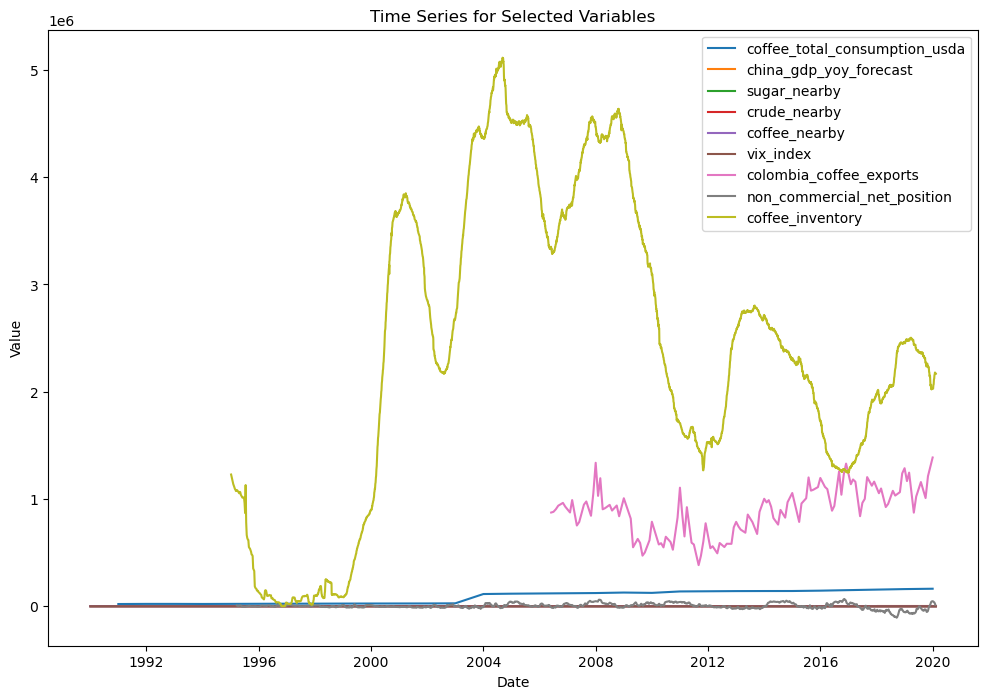

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot time series for each variable
plt.figure(figsize=(12, 8))
for variable in variables_of_interest:
    subset = selected_data[selected_data['variable'] == variable]
    plt.plot(subset['date'], subset['value'], label=variable)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series for Selected Variables')
plt.legend()
plt.show()


In [20]:
# Calculate statistics for the selected variables
statistics = selected_data.groupby('variable')['value'].describe()
print("Basic Statistics:\n", statistics)


Basic Statistics:
                                 count          mean           std        min  \
variable                                                                       
china_gdp_yoy_forecast          536.0  6.024590e+00  9.934844e-02       5.80   
coffee_inventory               5733.0  2.537475e+06  1.332244e+06     321.00   
coffee_nearby                  7549.0  1.193808e+02  5.052276e+01      41.50   
coffee_total_consumption_usda    22.0  8.554714e+04  5.861004e+04   20995.00   
colombia_coffee_exports         117.0  8.956660e+05  2.282287e+05  383618.00   
crude_nearby                   7566.0  4.788051e+01  2.926543e+01      10.72   
non_commercial_net_position    1297.0  2.471234e+03  2.463130e+04 -106651.00   
sugar_nearby                   7551.0  1.271651e+01  5.353356e+00       4.50   
vix_index                      7583.0  1.912779e+01  7.718066e+00       9.14   

                                       25%         50%           75%  \
variable                    

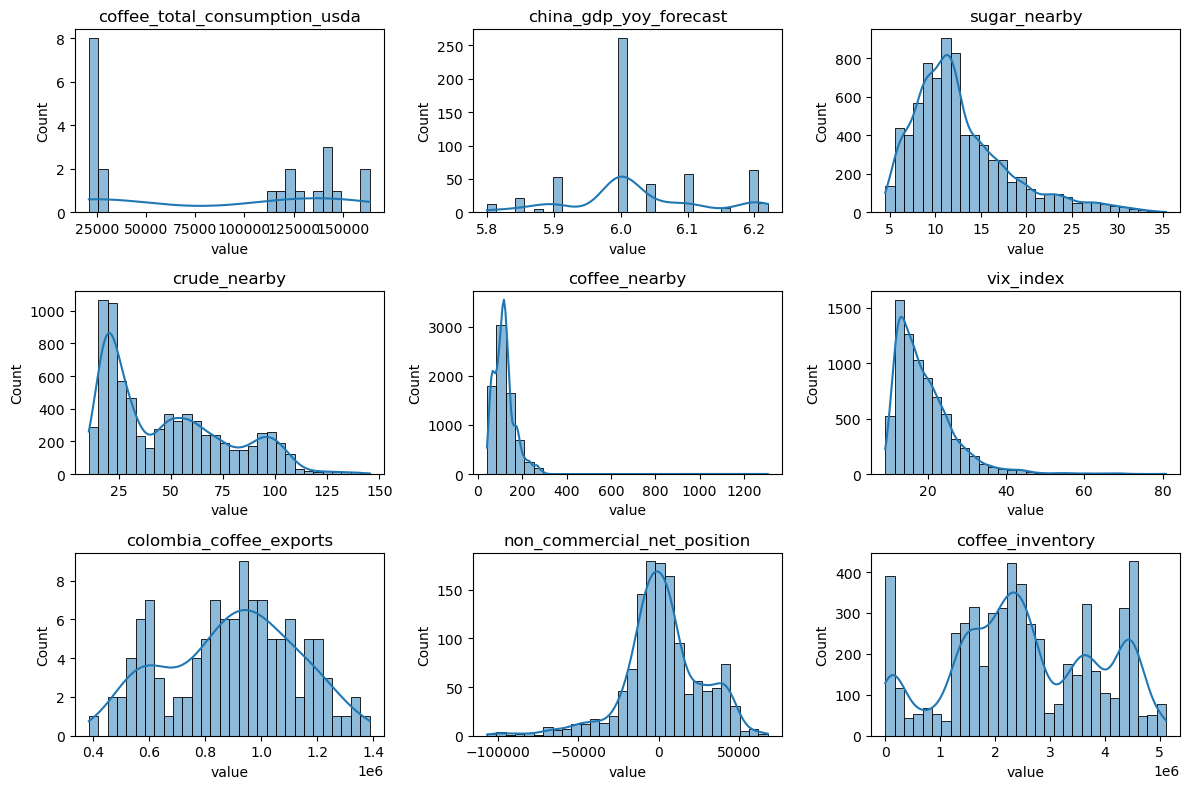

In [21]:
# Plot histograms for each variable
plt.figure(figsize=(12, 8))
for i, variable in enumerate(variables_of_interest, 1):
    plt.subplot(3, 3, i)
    subset = selected_data[selected_data['variable'] == variable]
    sns.histplot(subset['value'], bins=30, kde=True)
    plt.title(variable)

plt.tight_layout()
plt.show()


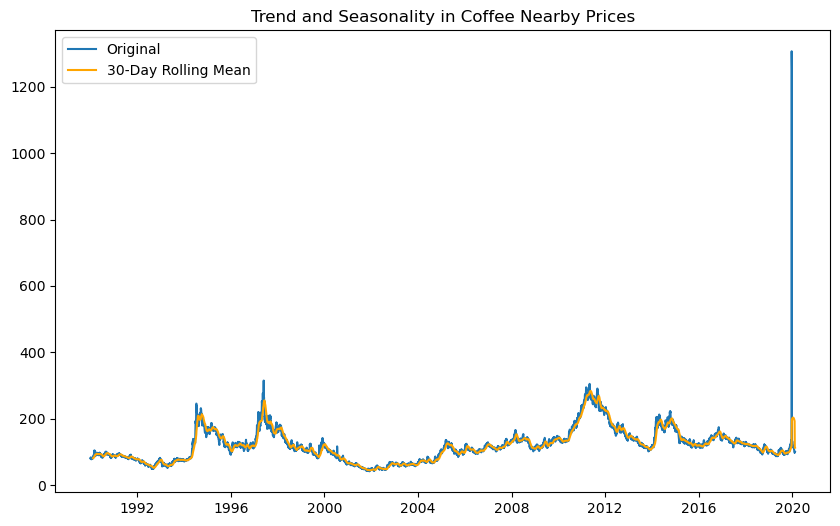

In [22]:
# Example: Calculate and plot rolling mean for coffee_nearby
coffee_subset = selected_data[selected_data['variable'] == 'coffee_nearby']
coffee_subset = coffee_subset.sort_values('date')  # Ensure data is sorted by date
coffee_subset['rolling_mean'] = coffee_subset['value'].rolling(window=30).mean()

plt.figure(figsize=(10, 6))
plt.plot(coffee_subset['date'], coffee_subset['value'], label='Original')
plt.plot(coffee_subset['date'], coffee_subset['rolling_mean'], label='30-Day Rolling Mean', color='orange')
plt.title('Trend and Seasonality in Coffee Nearby Prices')
plt.legend()
plt.show()


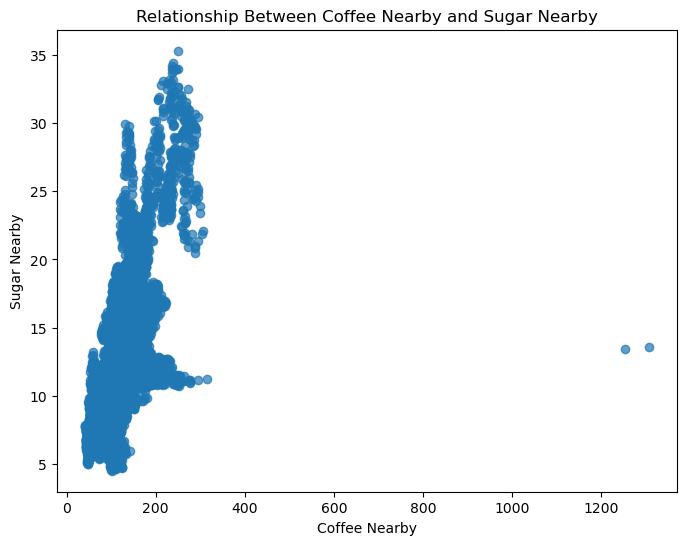

In [23]:
# Scatter plot example: coffee_nearby vs sugar_nearby
coffee_nearby = selected_data[selected_data['variable'] == 'coffee_nearby']
sugar_nearby = selected_data[selected_data['variable'] == 'sugar_nearby']

# Merge for scatter plot
scatter_data = pd.merge(
    coffee_nearby[['date', 'value']].rename(columns={'value': 'coffee_nearby'}),
    sugar_nearby[['date', 'value']].rename(columns={'value': 'sugar_nearby'}),
    on='date'
)

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(scatter_data['coffee_nearby'], scatter_data['sugar_nearby'], alpha=0.7)
plt.xlabel('Coffee Nearby')
plt.ylabel('Sugar Nearby')
plt.title('Relationship Between Coffee Nearby and Sugar Nearby')
plt.show()


Correlation Matrix:
 variable                       china_gdp_yoy_forecast  coffee_inventory  \
variable                                                                  
china_gdp_yoy_forecast                       1.000000         -0.348577   
coffee_inventory                            -0.348577          1.000000   
coffee_nearby                               -0.042585         -0.348923   
coffee_total_consumption_usda               -1.000000          0.690671   
colombia_coffee_exports                     -0.621187         -0.098297   
crude_nearby                                 0.600406          0.268929   
non_commercial_net_position                 -0.537032          0.127909   
sugar_nearby                                -0.354621         -0.186672   
vix_index                                    0.060901          0.002674   

variable                       coffee_nearby  coffee_total_consumption_usda  \
variable                                                                  

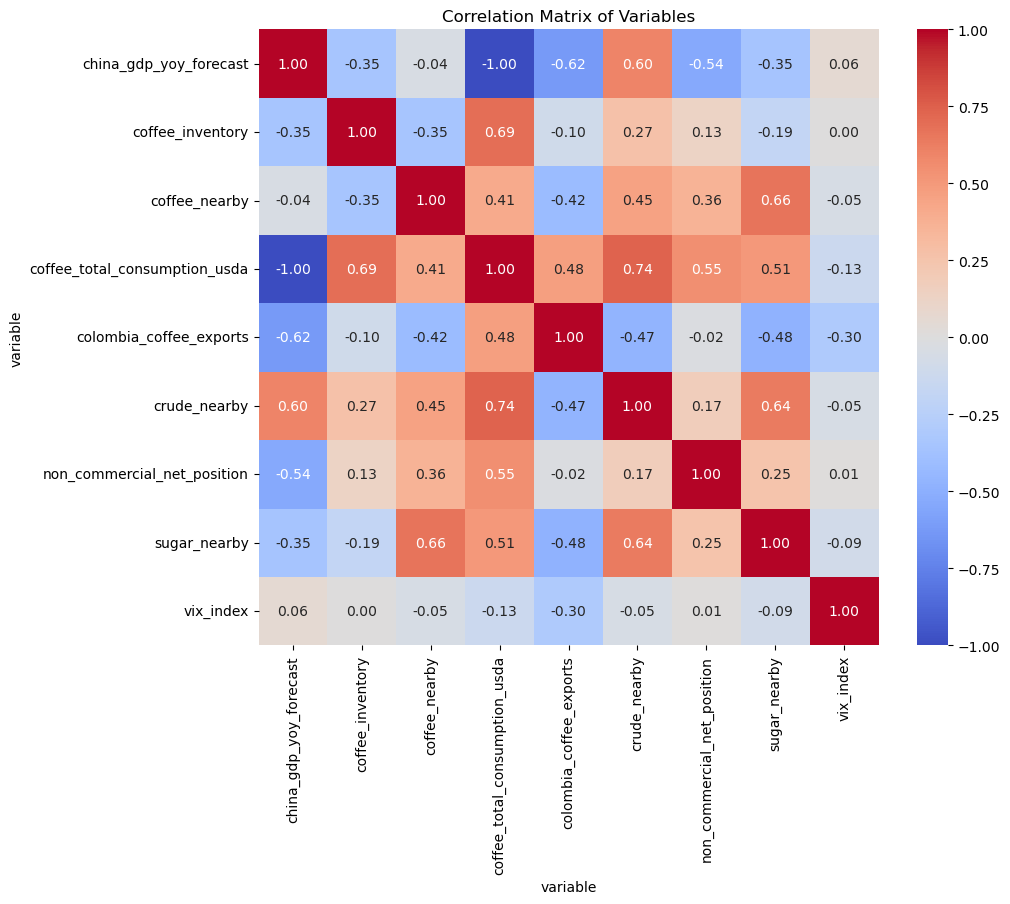

In [24]:
# Pivot the data to create a wide format suitable for correlation analysis
correlation_data = selected_data.pivot(index='date', columns='variable', values='value')

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Variables')
plt.show()


In [25]:
# Pivot the data to have variables as columns
pivoted_data = merged_df.pivot(index='date', columns='variable', values='value')

# Add the 'dxy_value' column
pivoted_data['dxy_value'] = merged_df.drop_duplicates(subset='date').set_index('date')['dxy_value']

# Inspect the resulting DataFrame
print("Pivoted Data Head:\n", pivoted_data.head())
print("Pivoted Data Info:\n", pivoted_data.info())


Pivoted Data Head:
 variable    china_gdp_yoy_forecast  coffee_inventory  coffee_nearby  \
date                                                                  
1990-01-02                     NaN               NaN          80.56   
1990-01-03                     NaN               NaN          81.75   
1990-01-04                     NaN               NaN          82.48   
1990-01-05                     NaN               NaN          81.16   
1990-01-08                     NaN               NaN          81.38   

variable    coffee_total_consumption_usda  colombia_coffee_exports  \
date                                                                 
1990-01-02                            NaN                      NaN   
1990-01-03                            NaN                      NaN   
1990-01-04                            NaN                      NaN   
1990-01-05                            NaN                      NaN   
1990-01-08                            NaN                     

Correlation Coefficients of Variables with dxy_value:
variable
dxy_value                        1.000000
colombia_coffee_exports          0.617819
vix_index                        0.121063
coffee_inventory                -0.226288
non_commercial_net_position     -0.316572
coffee_total_consumption_usda   -0.425835
coffee_nearby                   -0.454492
sugar_nearby                    -0.514263
crude_nearby                    -0.600893
china_gdp_yoy_forecast          -0.636626
Name: dxy_value, dtype: float64


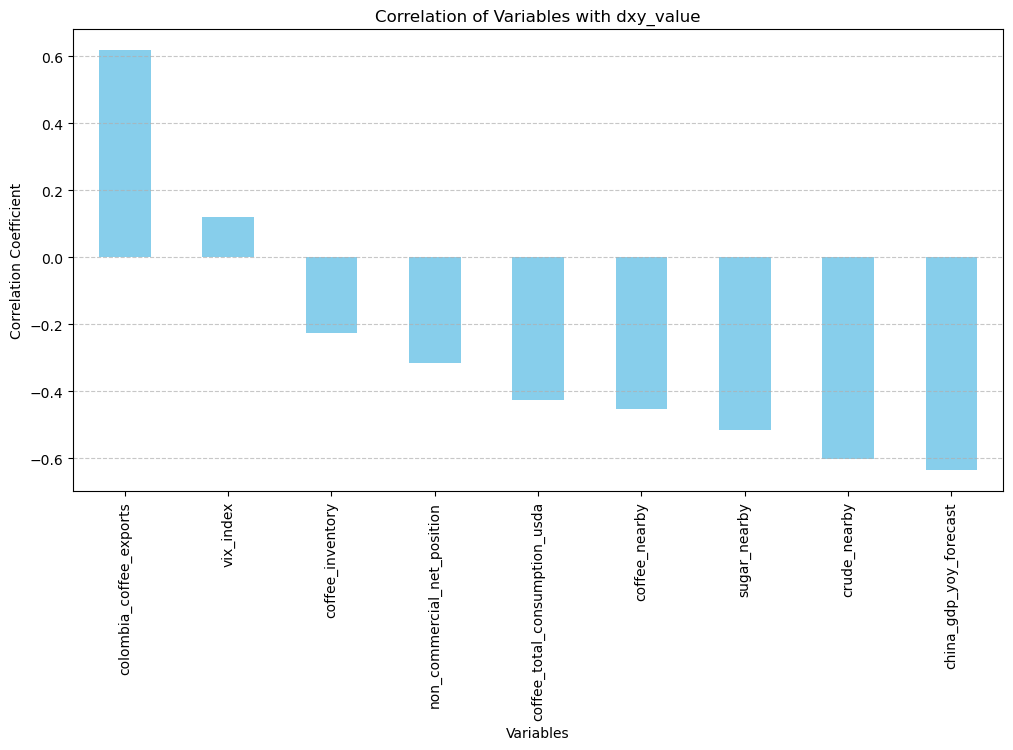

In [26]:
# Calculate Pearson correlation between 'dxy_value' and each explanatory variable
correlation_with_dxy = pivoted_data.corr()['dxy_value'].sort_values(ascending=False)

# Display the correlations
print("Correlation Coefficients of Variables with dxy_value:")
print(correlation_with_dxy)

# Visualize correlations as a bar chart
import matplotlib.pyplot as plt

correlation_with_dxy.drop('dxy_value').plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title("Correlation of Variables with dxy_value")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Variables")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [27]:
# Pivot the data to have variables as columns
pivoted_data = merged_df.pivot(index='date', columns='variable', values='value')

# Add the 'dxy_value' column
pivoted_data['dxy_value'] = merged_df.drop_duplicates(subset='date').set_index('date')['dxy_value']

# Inspect the resulting DataFrame
print("Pivoted Data Head:\n", pivoted_data.head())
print("Pivoted Data Info:\n", pivoted_data.info())



Pivoted Data Head:
 variable    china_gdp_yoy_forecast  coffee_inventory  coffee_nearby  \
date                                                                  
1990-01-02                     NaN               NaN          80.56   
1990-01-03                     NaN               NaN          81.75   
1990-01-04                     NaN               NaN          82.48   
1990-01-05                     NaN               NaN          81.16   
1990-01-08                     NaN               NaN          81.38   

variable    coffee_total_consumption_usda  colombia_coffee_exports  \
date                                                                 
1990-01-02                            NaN                      NaN   
1990-01-03                            NaN                      NaN   
1990-01-04                            NaN                      NaN   
1990-01-05                            NaN                      NaN   
1990-01-08                            NaN                     

In [28]:
pivoted_data.to_excel("output.xlsx")

### 2. **Exploratory Data Analysis (EDA)**

We conducted a comprehensive Exploratory Data Analysis (EDA) to gain insights into the data and identify patterns, trends, and potential relationships between variables. Key steps included:

#### **Descriptive Statistics:**
- Examined summary statistics (mean, median, standard deviation) for all variables to understand their distributions.
- Identified outliers and anomalies that could impact model performance.

#### **Time Series Visualization:**
- Plotted trends for coffee prices (`coffee_nearby`) over time to detect seasonality and long-term patterns.
- Compared other variables, such as coffee inventory, crude oil prices, and non-commercial net positions, against time to uncover correlations.

#### **Correlation Analysis:**
- Calculated Pearson correlation coefficients to assess relationships between the target variable (`coffee_nearby`) and explanatory variables.
- Identified strong positive correlations (e.g., crude oil prices, sugar prices) and negative correlations (e.g., DXY value).

#### **Feature Relationships:**
- Visualized relationships between key features and the target variable using scatter plots and trend lines.
- Highlighted the interplay between supply (coffee inventory) and demand (consumption) factors on coffee prices.

This exploratory phase provided crucial insights that guided feature selection, model design, and refinement.


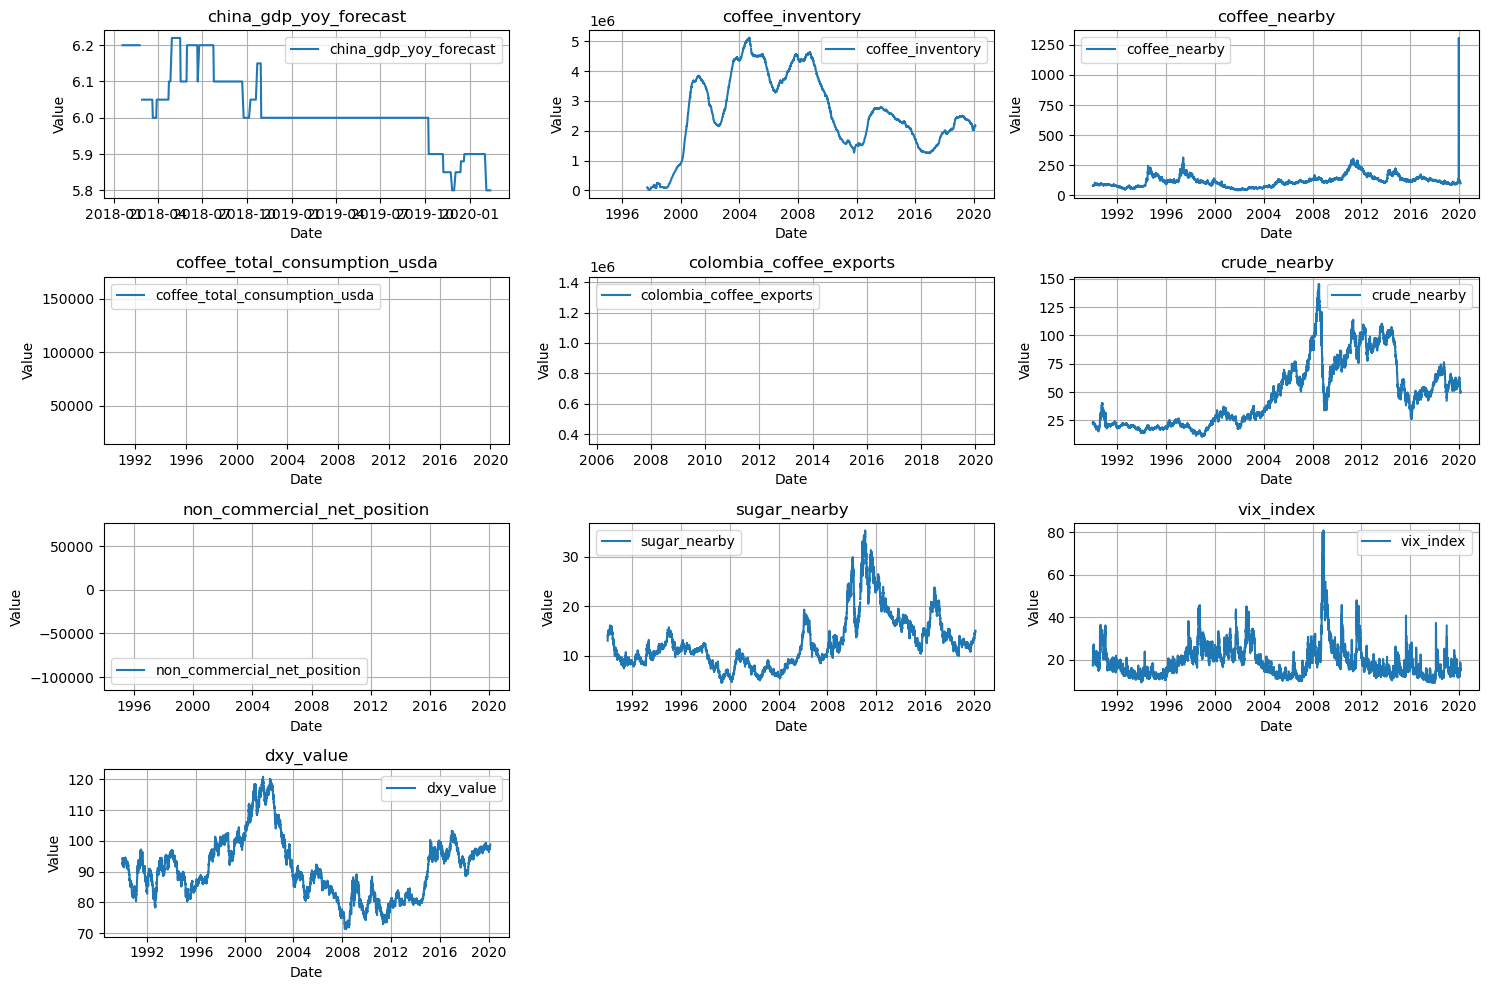

In [30]:
# Loop through each variable in pivoted_data and plot a line chart
plt.figure(figsize=(15, 10))

for i, column in enumerate(pivoted_data.columns, 1):
    plt.subplot(len(pivoted_data.columns)//3 + 1, 3, i)  # Adjusting the layout to fit all plots
    plt.plot(pivoted_data.index, pivoted_data[column], label=column)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(column)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


**Removing the outliers**

In [32]:
# Filter out coffee_nearby values greater than 1200 in pivoted_data
pivoted_data_filtered = pivoted_data[pivoted_data['coffee_nearby'] <= 1200]

# Inspect the filtered data
print(pivoted_data_filtered.head())


variable    china_gdp_yoy_forecast  coffee_inventory  coffee_nearby  \
date                                                                  
1990-01-02                     NaN               NaN          80.56   
1990-01-03                     NaN               NaN          81.75   
1990-01-04                     NaN               NaN          82.48   
1990-01-05                     NaN               NaN          81.16   
1990-01-08                     NaN               NaN          81.38   

variable    coffee_total_consumption_usda  colombia_coffee_exports  \
date                                                                 
1990-01-02                            NaN                      NaN   
1990-01-03                            NaN                      NaN   
1990-01-04                            NaN                      NaN   
1990-01-05                            NaN                      NaN   
1990-01-08                            NaN                      NaN   

variable   

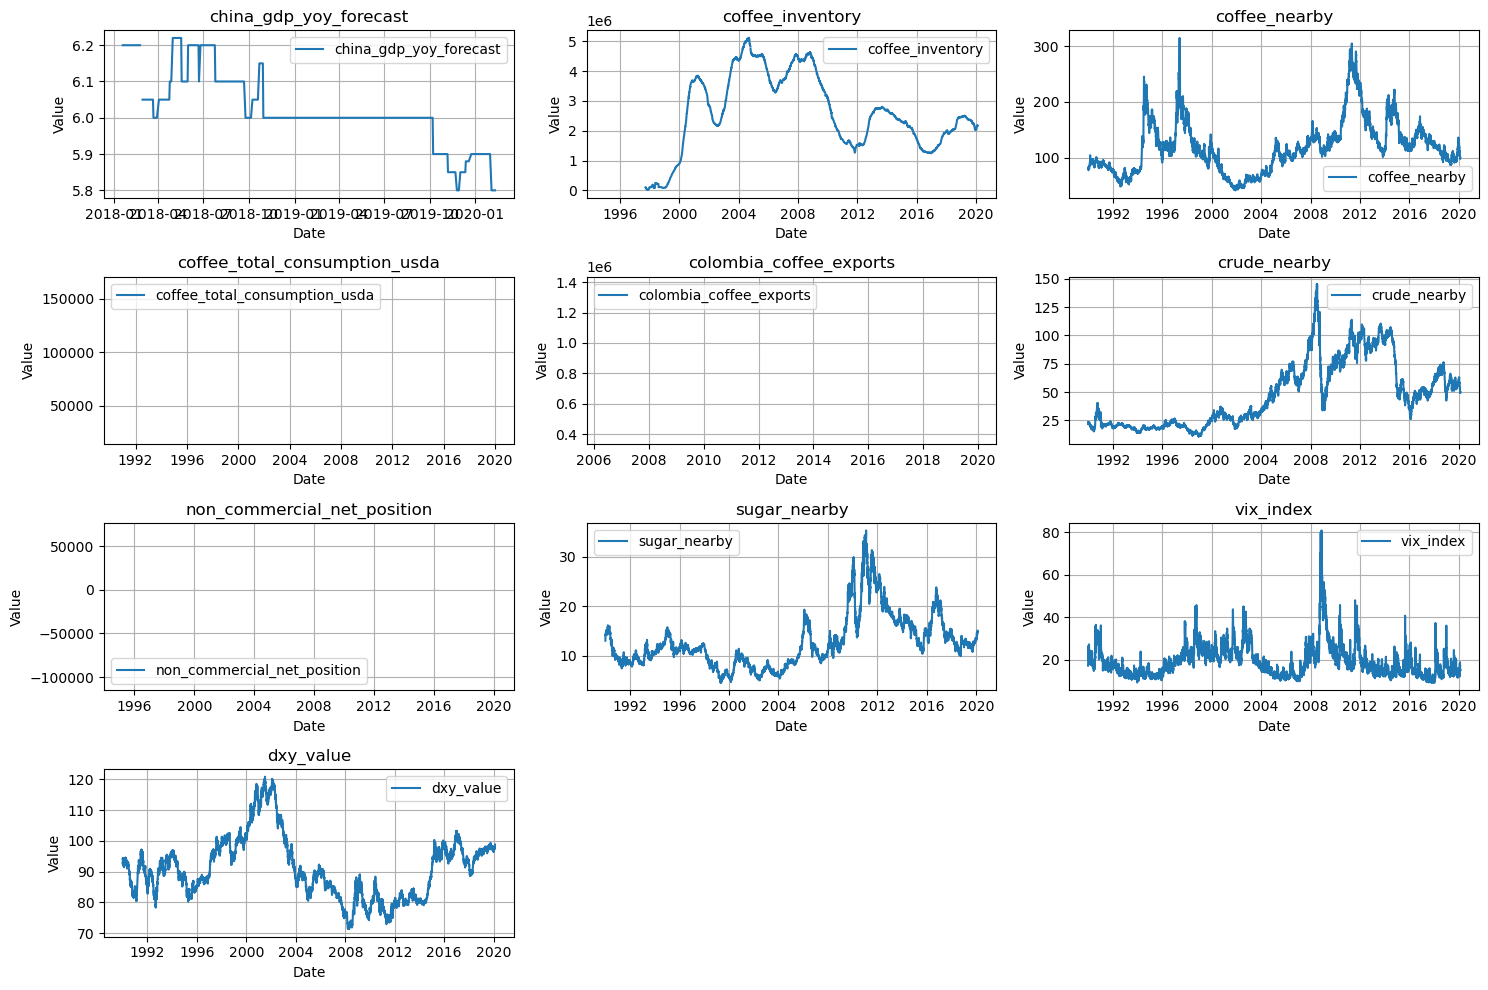

In [33]:
# Filter out coffee_nearby values greater than 1200
pivoted_data_filtered = pivoted_data[pivoted_data['coffee_nearby'] <= 1200]

# Loop through each variable in pivoted_data_filtered and plot a line chart
plt.figure(figsize=(15, 10))

for i, column in enumerate(pivoted_data_filtered.columns, 1):
    plt.subplot(len(pivoted_data_filtered.columns)//3 + 1, 3, i)  # Adjust layout for multiple plots
    plt.plot(pivoted_data_filtered.index, pivoted_data_filtered[column], label=column)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(column)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()



In [34]:
# Fill NaN values backward (use the next available value)
pivoted_data_filtered_bfilled = pivoted_data_filtered.bfill()

# Inspect the resulting DataFrame
print(pivoted_data_filtered_bfilled.head())


variable    china_gdp_yoy_forecast  coffee_inventory  coffee_nearby  \
date                                                                  
1990-01-02                     6.2         1228136.0          80.56   
1990-01-03                     6.2         1228136.0          81.75   
1990-01-04                     6.2         1228136.0          82.48   
1990-01-05                     6.2         1228136.0          81.16   
1990-01-08                     6.2         1228136.0          81.38   

variable    coffee_total_consumption_usda  colombia_coffee_exports  \
date                                                                 
1990-01-02                        20995.0                 873916.0   
1990-01-03                        20995.0                 873916.0   
1990-01-04                        20995.0                 873916.0   
1990-01-05                        20995.0                 873916.0   
1990-01-08                        20995.0                 873916.0   

variable   

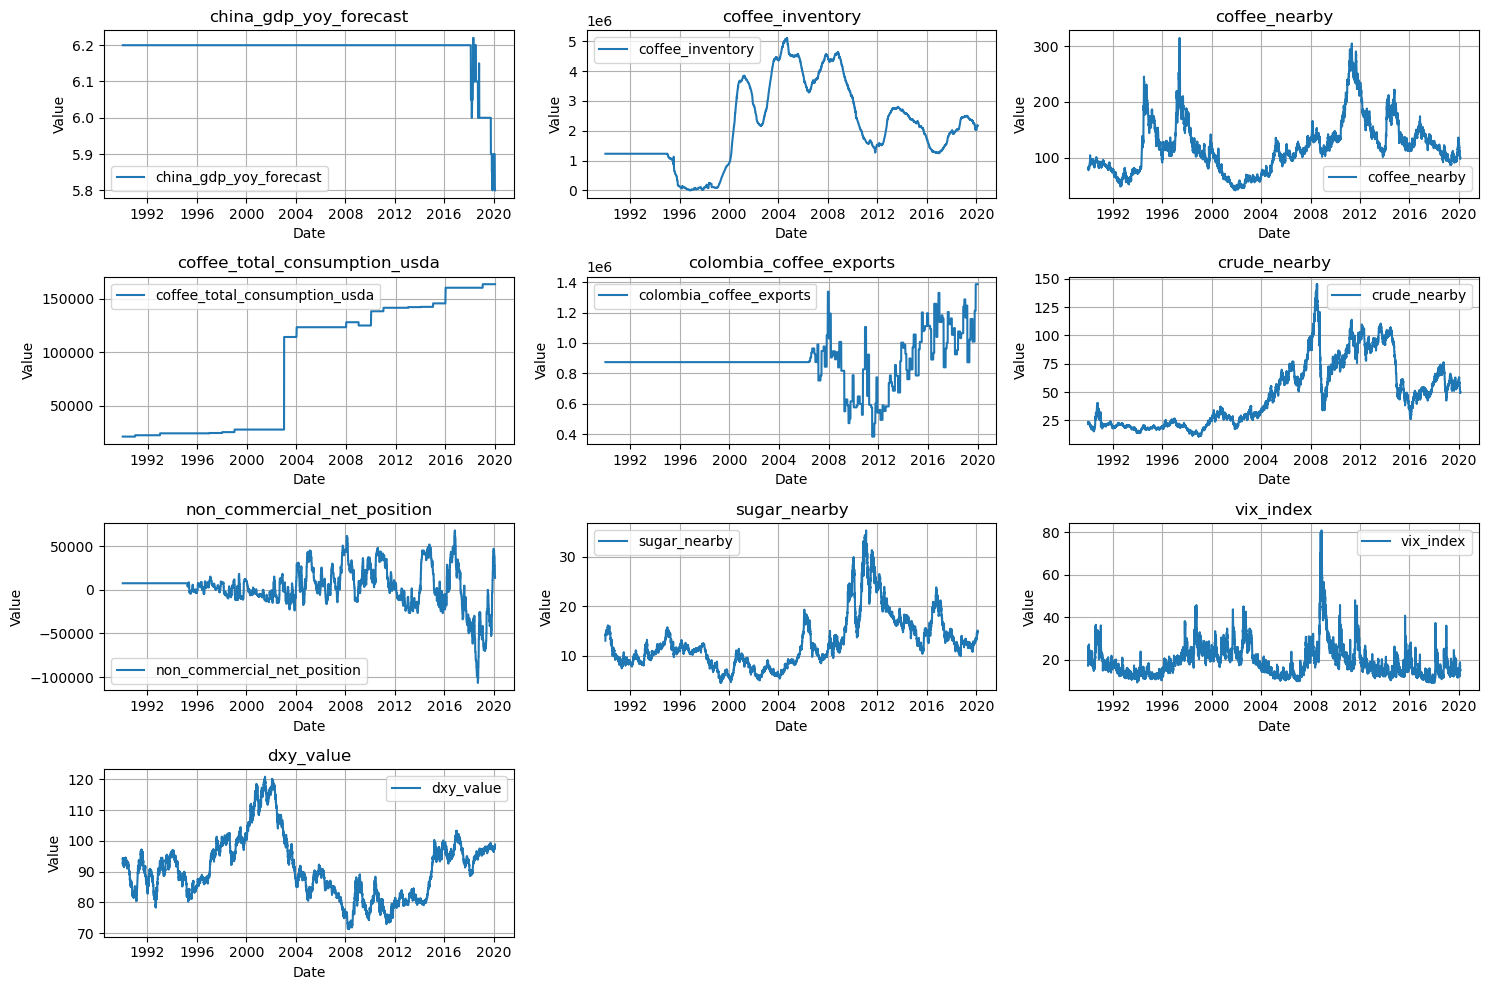

In [35]:
# Loop through each variable in pivoted_data_filtered_bfilled and plot a line chart
plt.figure(figsize=(15, 10))

for i, column in enumerate(pivoted_data_filtered_bfilled.columns, 1):
    plt.subplot(len(pivoted_data_filtered_bfilled.columns)//3 + 1, 3, i)  # Adjusting the layout
    plt.plot(pivoted_data_filtered_bfilled.index, pivoted_data_filtered_bfilled[column], label=column)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(column)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


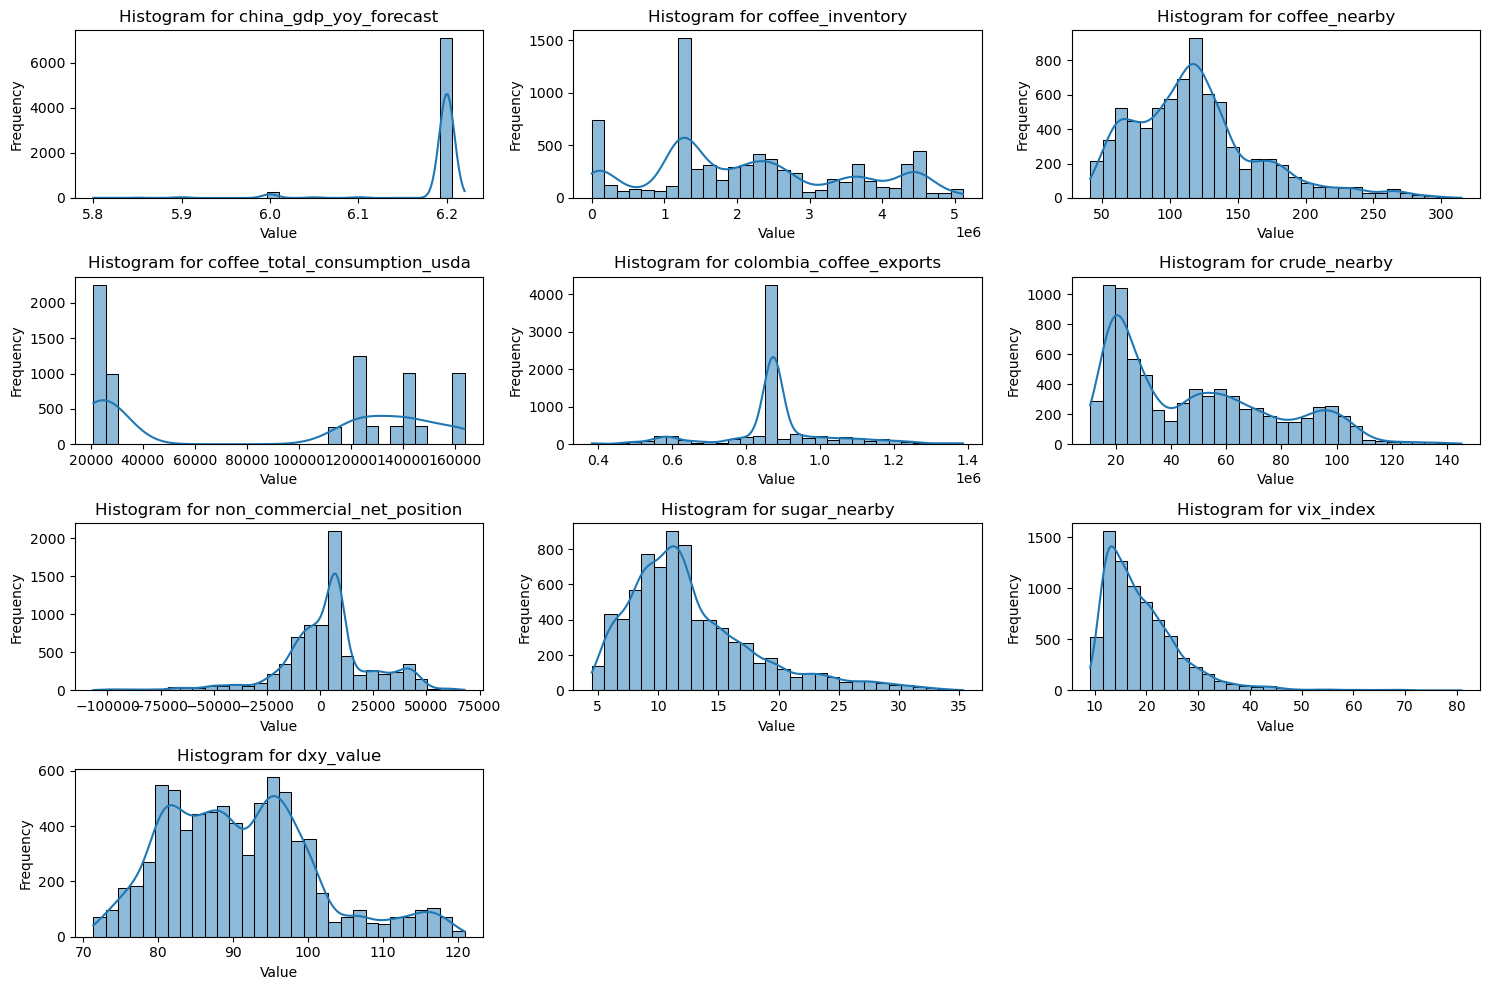

In [36]:
# Plot histograms for each variable in pivoted_data_filtered_bfilled
plt.figure(figsize=(15, 10))

for i, column in enumerate(pivoted_data_filtered_bfilled.columns, 1):
    plt.subplot(len(pivoted_data_filtered_bfilled.columns)//3 + 1, 3, i)  # Adjusting the layout
    sns.histplot(pivoted_data_filtered_bfilled[column], bins=30, kde=True)  # KDE for density curve
    plt.title(f'Histogram for {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


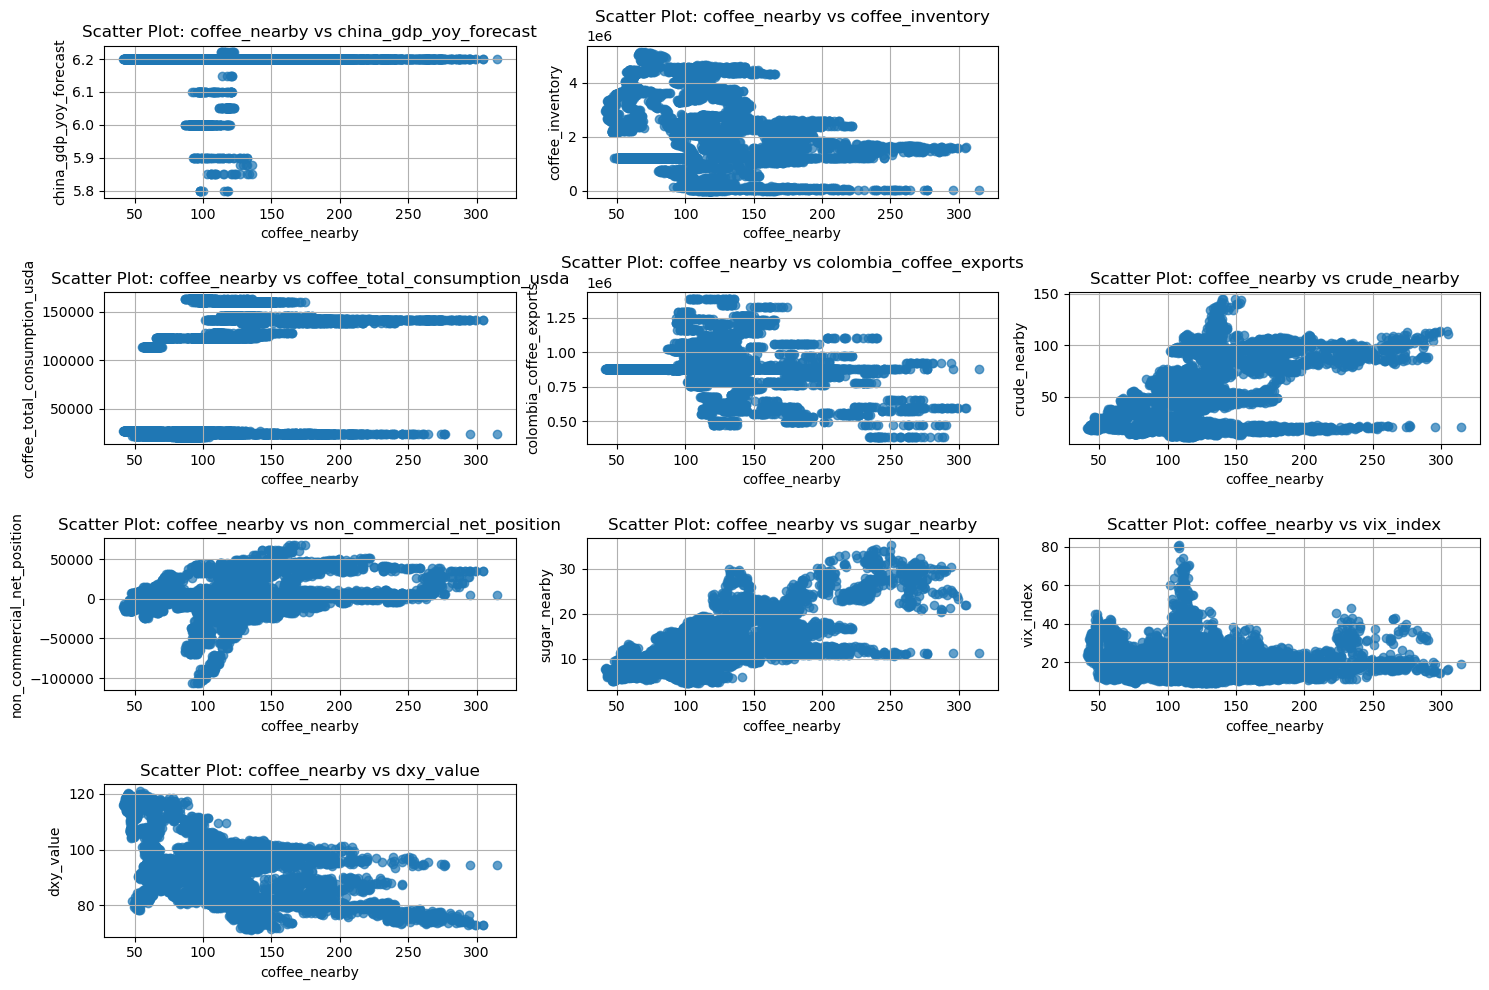

In [37]:
# Plot scatter plots for coffee_nearby against each variable
plt.figure(figsize=(15, 10))

for i, column in enumerate(pivoted_data_filtered_bfilled.columns, 1):
    if column != 'coffee_nearby':  # Skip plotting coffee_nearby against itself
        plt.subplot(len(pivoted_data_filtered_bfilled.columns)//3 + 1, 3, i)  # Adjust layout
        plt.scatter(pivoted_data_filtered_bfilled['coffee_nearby'], pivoted_data_filtered_bfilled[column], alpha=0.7)
        plt.title(f'Scatter Plot: coffee_nearby vs {column}')
        plt.xlabel('coffee_nearby')
        plt.ylabel(column)
        plt.grid(True)

plt.tight_layout()
plt.show()


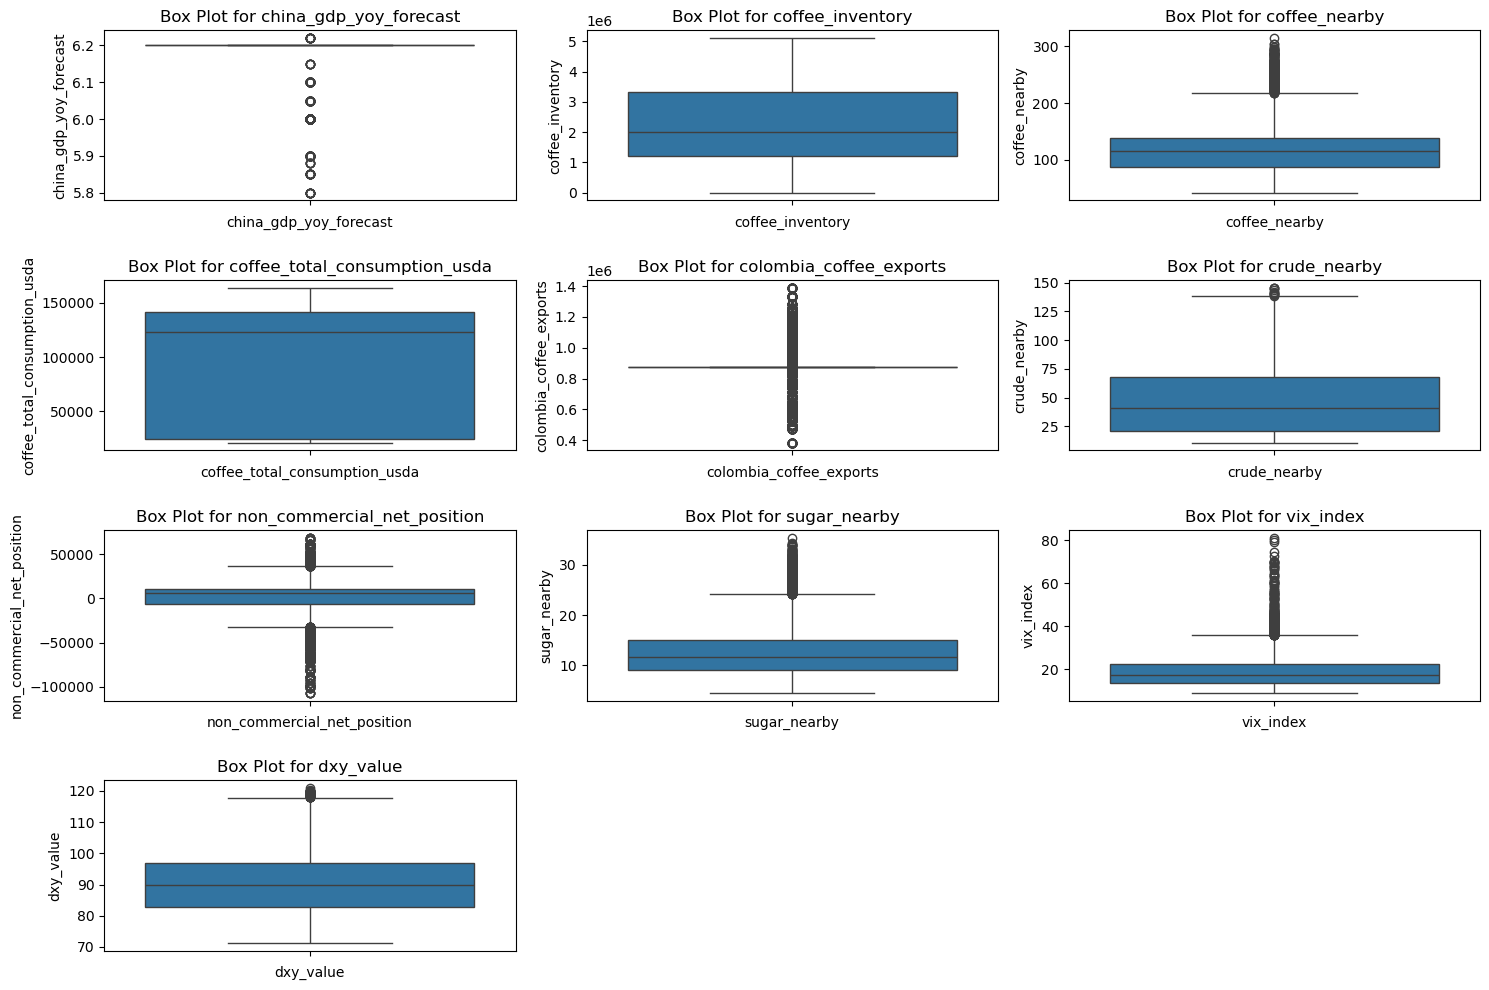

In [38]:
# Create box plots for each variable in pivoted_data_filtered_bfilled
plt.figure(figsize=(15, 10))

for i, column in enumerate(pivoted_data_filtered_bfilled.columns, 1):
    plt.subplot(len(pivoted_data_filtered_bfilled.columns)//3 + 1, 3, i)  # Adjust layout
    sns.boxplot(data=pivoted_data_filtered_bfilled[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


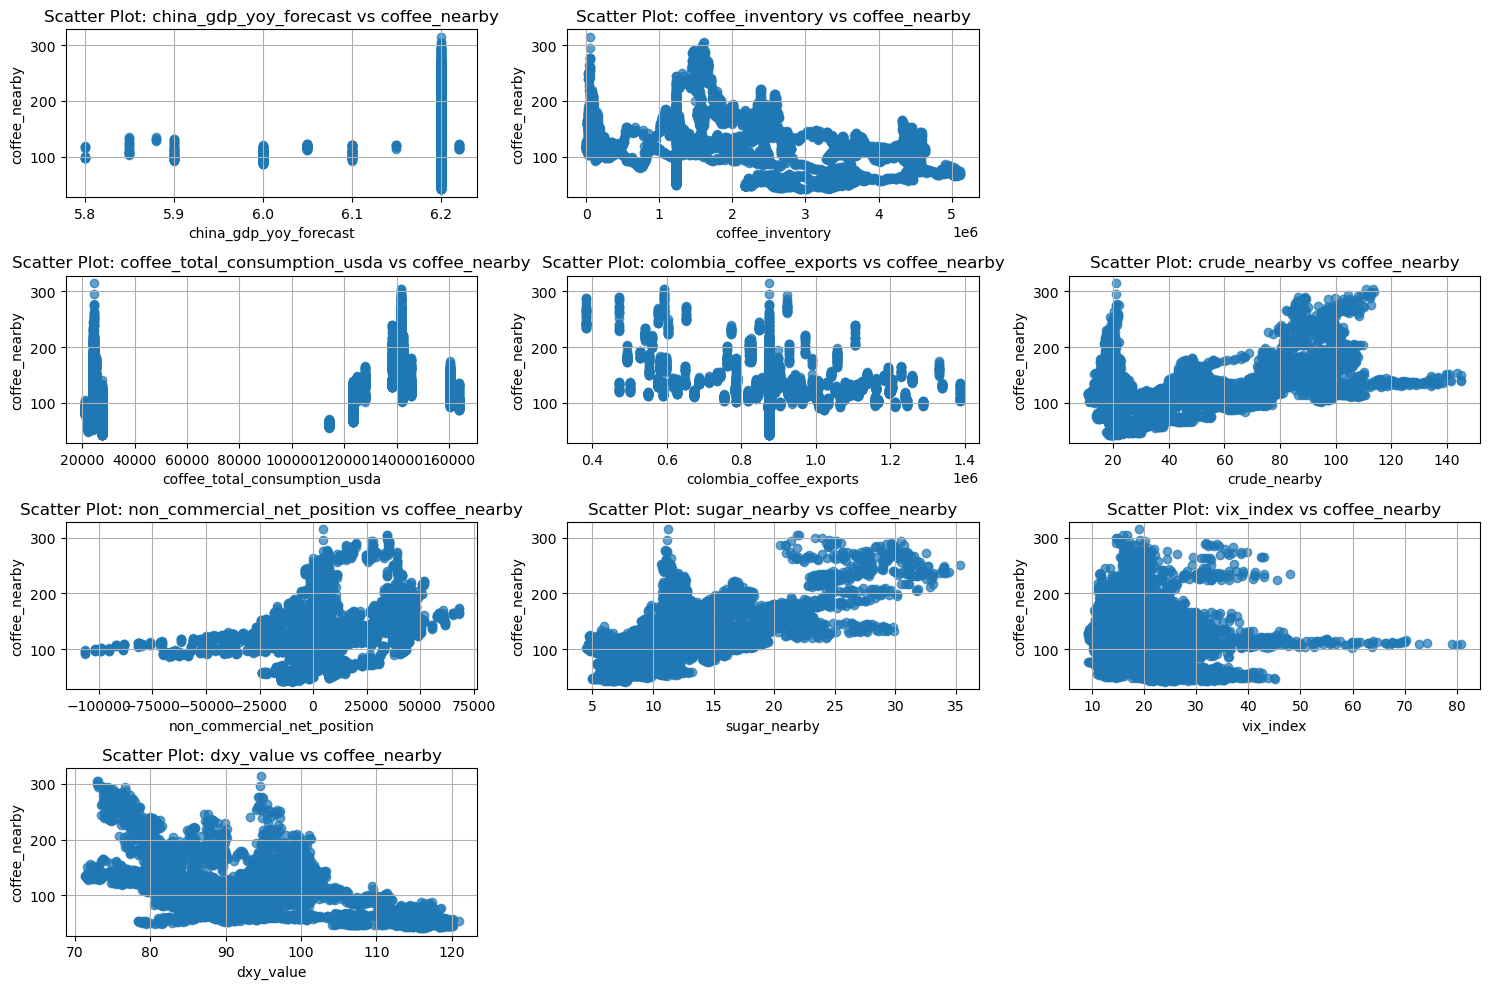

In [39]:
# Plot scatter plots with coffee_nearby on the y-axis and each variable on the x-axis
plt.figure(figsize=(15, 10))

for i, column in enumerate(pivoted_data_filtered_bfilled.columns, 1):
    if column != 'coffee_nearby':  # Skip plotting coffee_nearby against itself
        plt.subplot(len(pivoted_data_filtered_bfilled.columns)//3 + 1, 3, i)  # Adjust layout
        plt.scatter(pivoted_data_filtered_bfilled[column], pivoted_data_filtered_bfilled['coffee_nearby'], alpha=0.7)
        plt.title(f'Scatter Plot: {column} vs coffee_nearby')
        plt.xlabel(column)
        plt.ylabel('coffee_nearby')
        plt.grid(True)

plt.tight_layout()
plt.show()


C:\Users\pc\anaconda3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


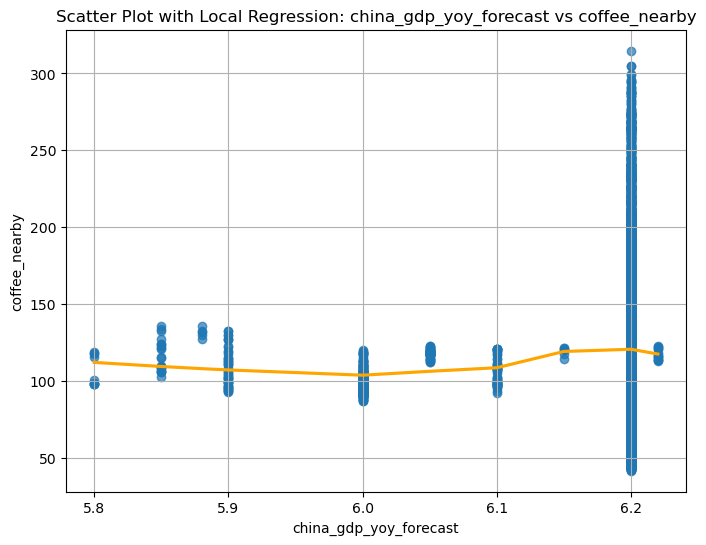

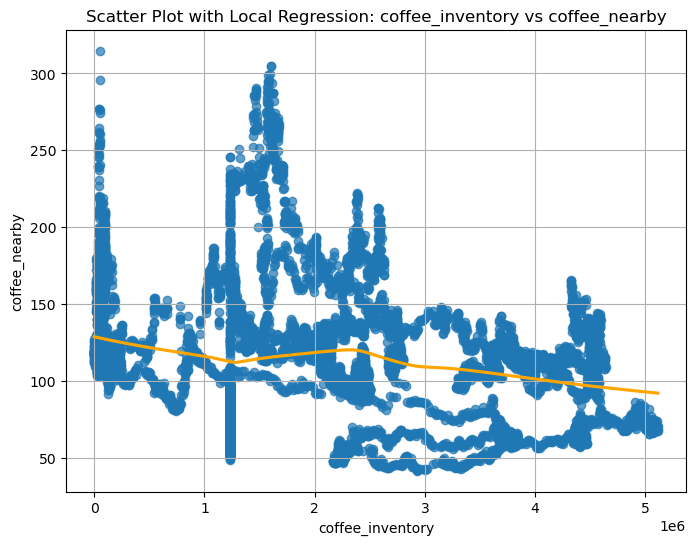

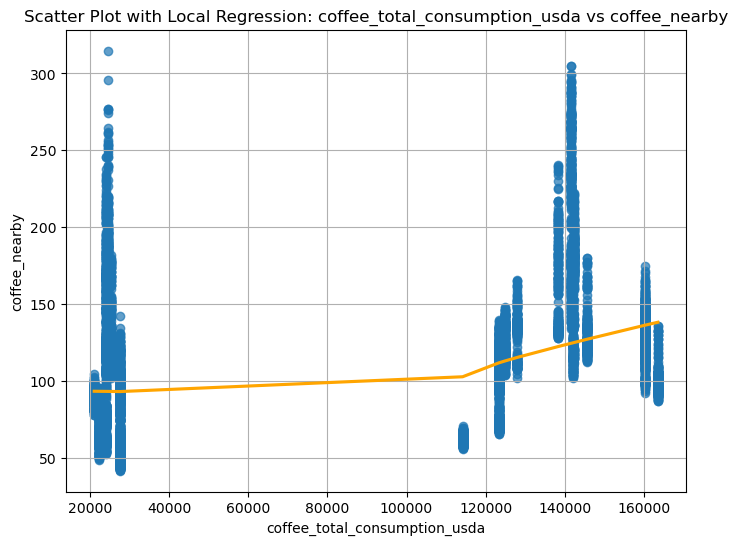

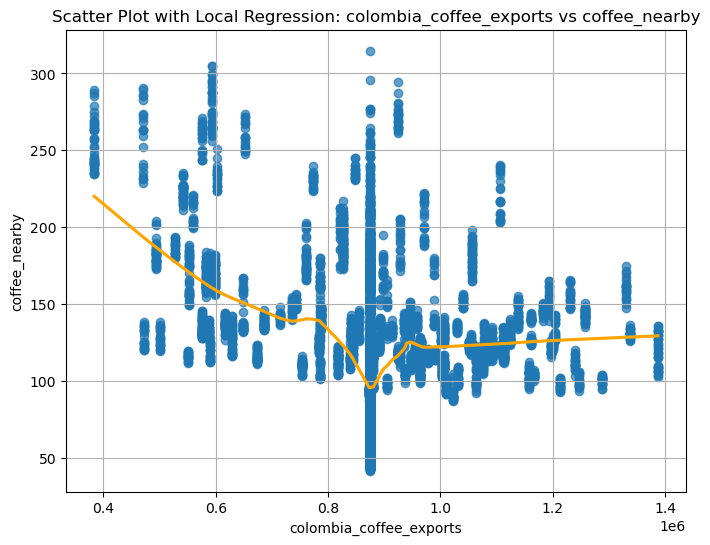

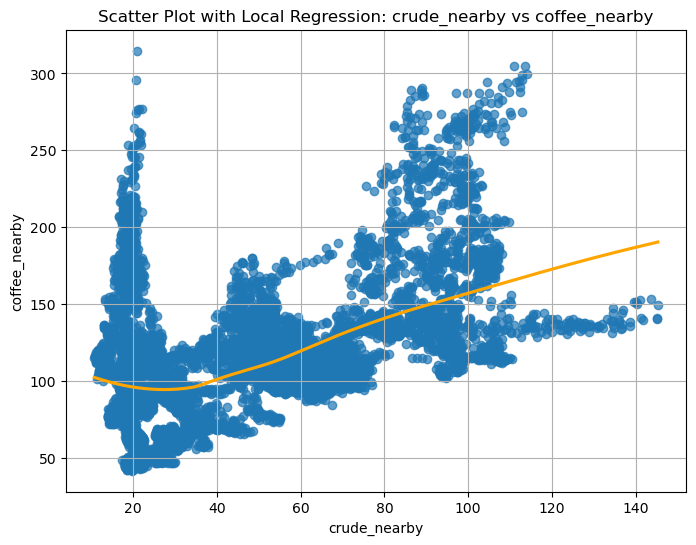

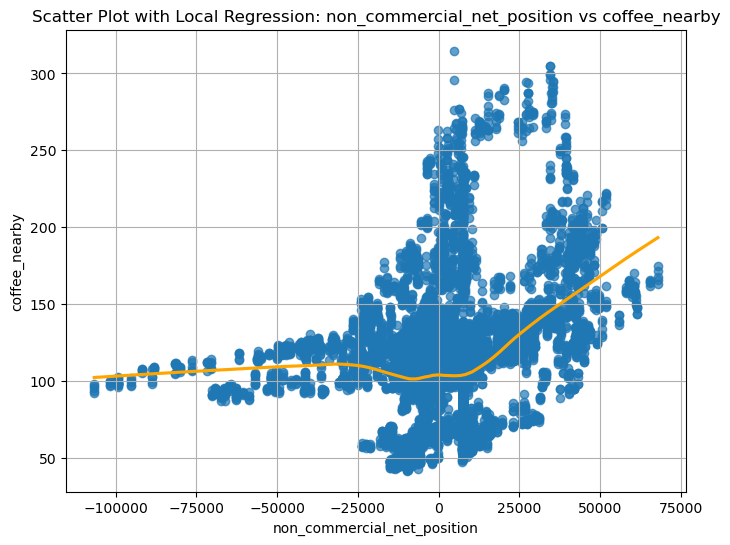

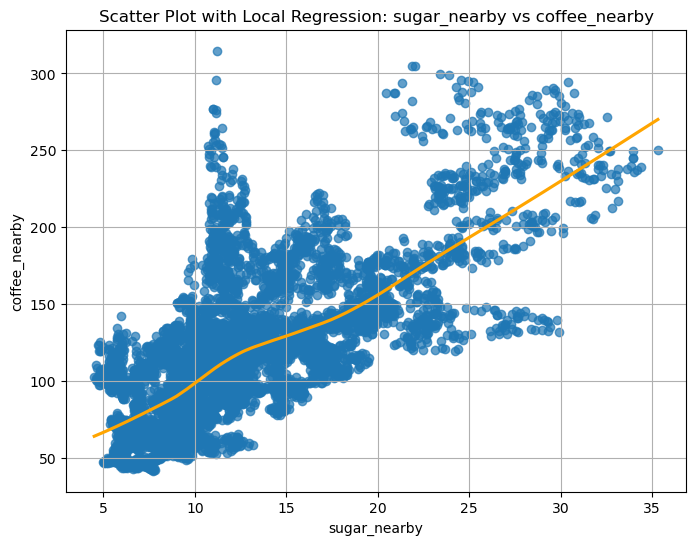

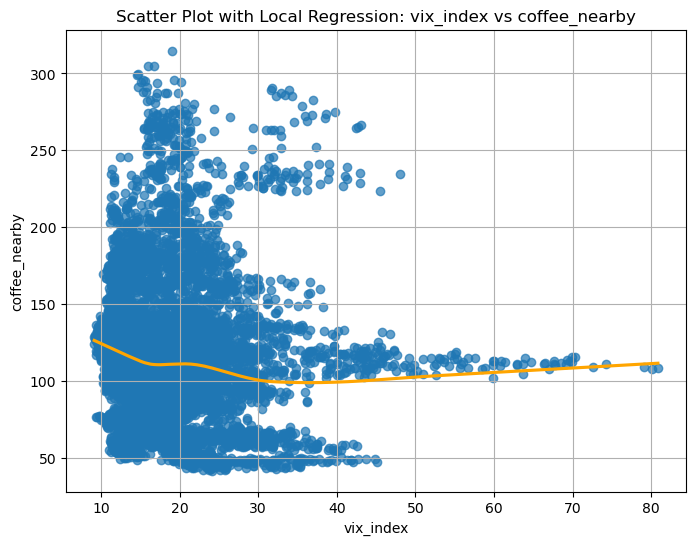

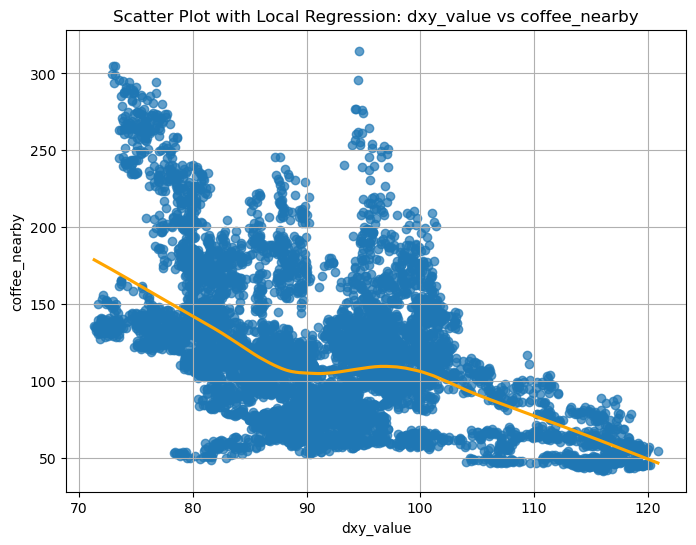

In [40]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plot scatter plots with coffee_nearby on the y-axis and each variable on the x-axis, with local regression
for column in pivoted_data_filtered_bfilled.columns:
    if column != 'coffee_nearby':  # Skip plotting coffee_nearby against itself
        plt.figure(figsize=(8, 6))  # Create a new figure for each scatter plot
        sns.regplot(x=pivoted_data_filtered_bfilled[column], 
                    y=pivoted_data_filtered_bfilled['coffee_nearby'], 
                    scatter_kws={'alpha': 0.7},  # Scatter plot points
                    line_kws={'color': 'orange'},  # Color of the regression line
                    lowess=True)  # Perform local regression (LOESS)
        plt.title(f'Scatter Plot with Local Regression: {column} vs coffee_nearby')
        plt.xlabel(column)
        plt.ylabel('coffee_nearby')
        plt.grid(True)
        plt.show()  # Show each plot individually


In [41]:
pivoted_data_filtered_bfilled.to_excel('output.xlsx')

### 3. **Correlation Analysis**

In the correlation analysis phase, we examined the strength and direction of relationships between the target variable (`coffee_nearby`) and the explanatory variables. The main steps were:

#### **Correlation Coefficients:**
- Computed Pearson correlation coefficients for all variables.
- Highlighted variables with significant positive or negative correlations with coffee prices, such as:
  - **Positive correlations**: Crude oil prices (`crude_nearby`), sugar prices (`sugar_nearby`), and non-commercial net positions (`non_commercial_net_position`).
  - **Negative correlations**: Coffee inventory (`coffee_inventory`) and DXY value (`dxy_value`).

#### **Heatmap Visualization:**
- Created a heatmap to visually assess the correlation matrix, making it easier to identify strong relationships.

#### **Insights for Modeling:**
- Identified multicollinearity risks (e.g., variables with high correlations with each other).
- Used the correlation analysis results to prioritize features that have the strongest direct or inverse relationship with coffee prices.

This analysis provided a solid foundation for feature selection and informed our modeling strategy.


In [43]:
# Calculate Pearson correlation coefficients between coffee_nearby and other variables
correlation_with_coffee = pivoted_data_filtered_bfilled.corr()['coffee_nearby'].sort_values(ascending=False)

# Display the correlation coefficients
print("Correlation Coefficients with coffee_nearby:")
print(correlation_with_coffee)


Correlation Coefficients with coffee_nearby:
variable
coffee_nearby                    1.000000
sugar_nearby                     0.715760
crude_nearby                     0.487249
coffee_total_consumption_usda    0.338589
non_commercial_net_position      0.297857
china_gdp_yoy_forecast           0.069878
vix_index                       -0.047670
coffee_inventory                -0.252382
colombia_coffee_exports         -0.255660
dxy_value                       -0.494477
Name: coffee_nearby, dtype: float64


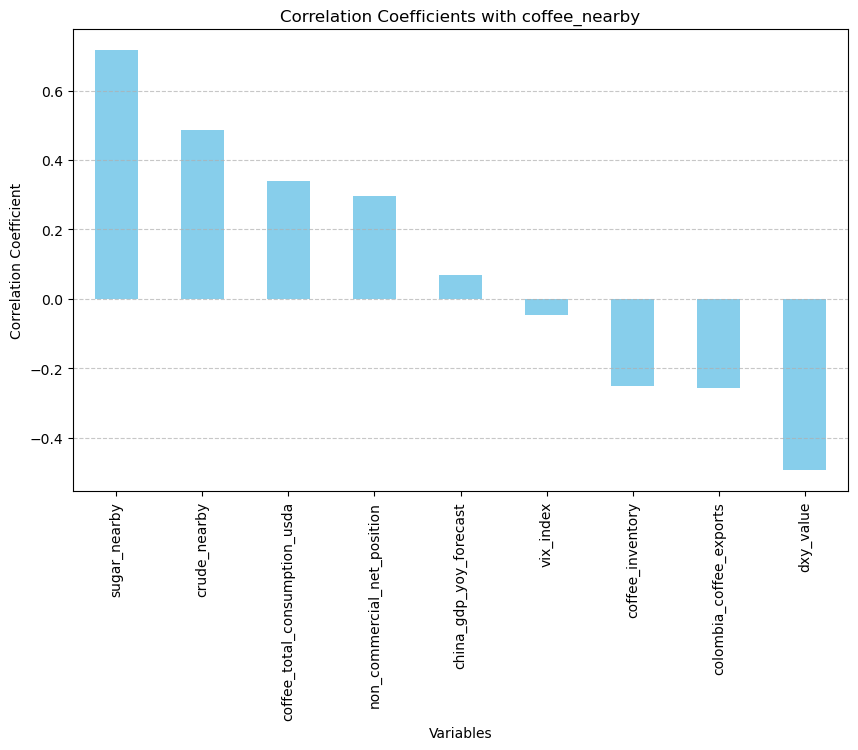

In [44]:
import matplotlib.pyplot as plt

# Calculate Pearson correlation coefficients between coffee_nearby and other variables
correlation_with_coffee = pivoted_data_filtered_bfilled.corr()['coffee_nearby'].sort_values(ascending=False)

# Plot the correlation coefficients as a bar chart
plt.figure(figsize=(10, 6))
correlation_with_coffee.drop('coffee_nearby').plot(kind='bar', color='skyblue')
plt.title('Correlation Coefficients with coffee_nearby')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Variables')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [45]:
# Calculate basic statistics (mean, standard deviation, min, max, quartiles) for each variable
statistics = pivoted_data_filtered_bfilled.describe()

# Display the statistics
print("Basic Statistics for Variables:\n", statistics)


Basic Statistics for Variables:
 variable  china_gdp_yoy_forecast  coffee_inventory  coffee_nearby  \
count                7547.000000      7.547000e+03    7547.000000   
mean                    6.188092      2.176939e+06     119.073184   
std                     0.050932      1.369489e+06      46.860625   
min                     5.800000      3.210000e+02      41.500000   
25%                     6.200000      1.228136e+06      86.260000   
50%                     6.200000      2.012962e+06     114.850000   
75%                     6.200000      3.325213e+06     138.775000   
max                     6.220000      5.112125e+06     314.800000   

variable  coffee_total_consumption_usda  colombia_coffee_exports  \
count                       7520.000000             7.520000e+03   
mean                       89391.388165             8.787214e+05   
std                        57612.449197             1.516685e+05   
min                        20995.000000             3.836180e+05   
25%  

<Figure size 1200x800 with 0 Axes>

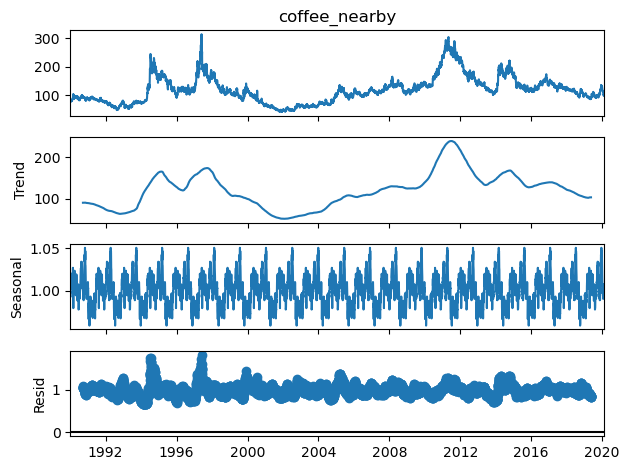

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Choose a variable, e.g., 'coffee_nearby' from the pivoted data
variable = 'coffee_nearby'

# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(pivoted_data_filtered_bfilled[variable], model='multiplicative', period=365)

# Plot the decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()


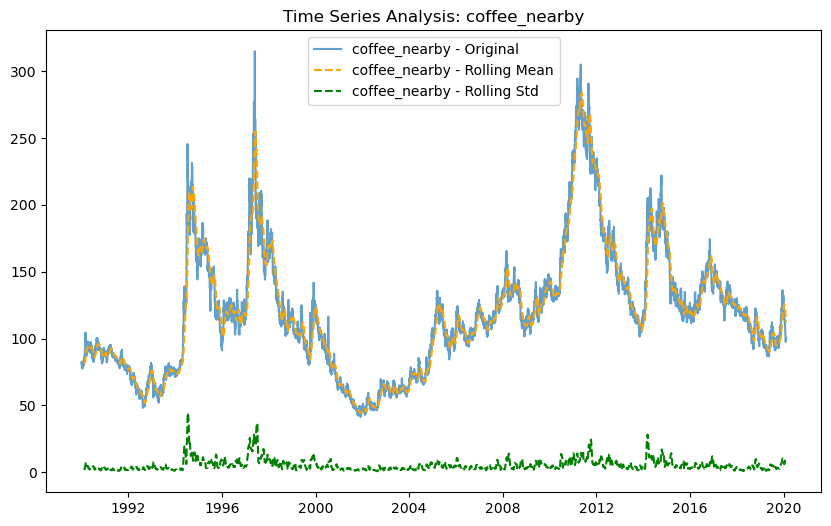

In [47]:
# Calculate rolling mean and standard deviation for the chosen variable
pivoted_data_filtered_bfilled['rolling_mean'] = pivoted_data_filtered_bfilled[variable].rolling(window=30).mean()
pivoted_data_filtered_bfilled['rolling_std'] = pivoted_data_filtered_bfilled[variable].rolling(window=30).std()

# Plot the original data along with rolling mean and standard deviation
plt.figure(figsize=(10, 6))
plt.plot(pivoted_data_filtered_bfilled[variable], label=f'{variable} - Original', alpha=0.7)
plt.plot(pivoted_data_filtered_bfilled['rolling_mean'], label=f'{variable} - Rolling Mean', color='orange', linestyle='--')
plt.plot(pivoted_data_filtered_bfilled['rolling_std'], label=f'{variable} - Rolling Std', color='green', linestyle='--')
plt.title(f'Time Series Analysis: {variable}')
plt.legend()
plt.show()


<Figure size 1000x600 with 0 Axes>

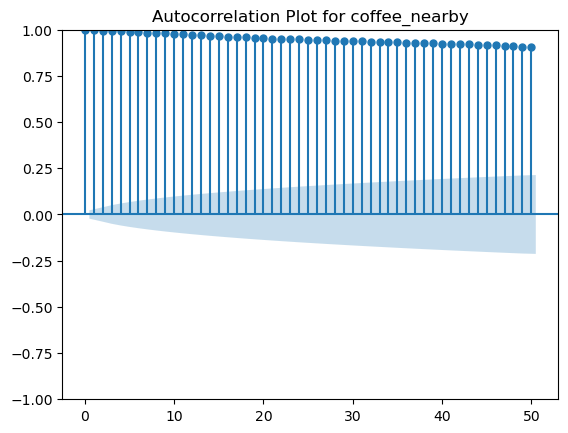

In [48]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation of the chosen variable
plt.figure(figsize=(10, 6))
plot_acf(pivoted_data_filtered_bfilled[variable].dropna(), lags=50)
plt.title(f'Autocorrelation Plot for {variable}')
plt.show()


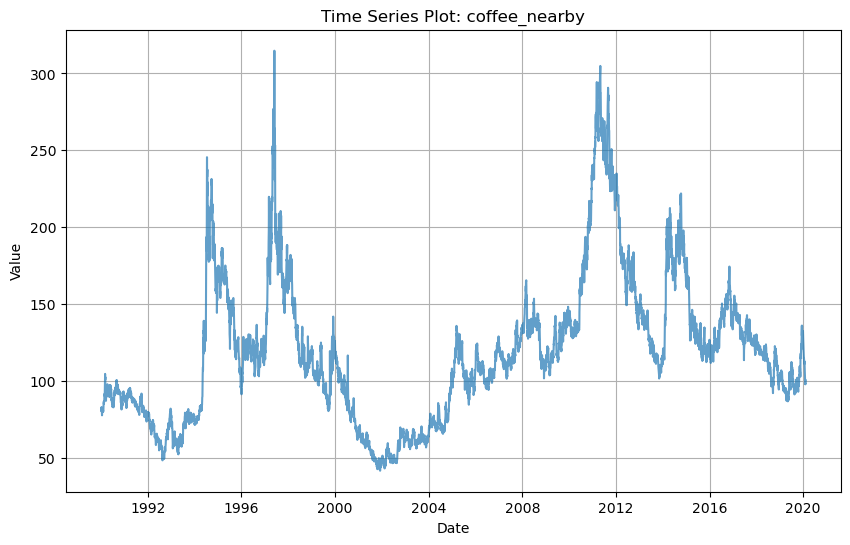

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(pivoted_data_filtered_bfilled[variable], label=variable, alpha=0.7)
plt.title(f'Time Series Plot: {variable}')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()


**Cross-correlation for each variable**

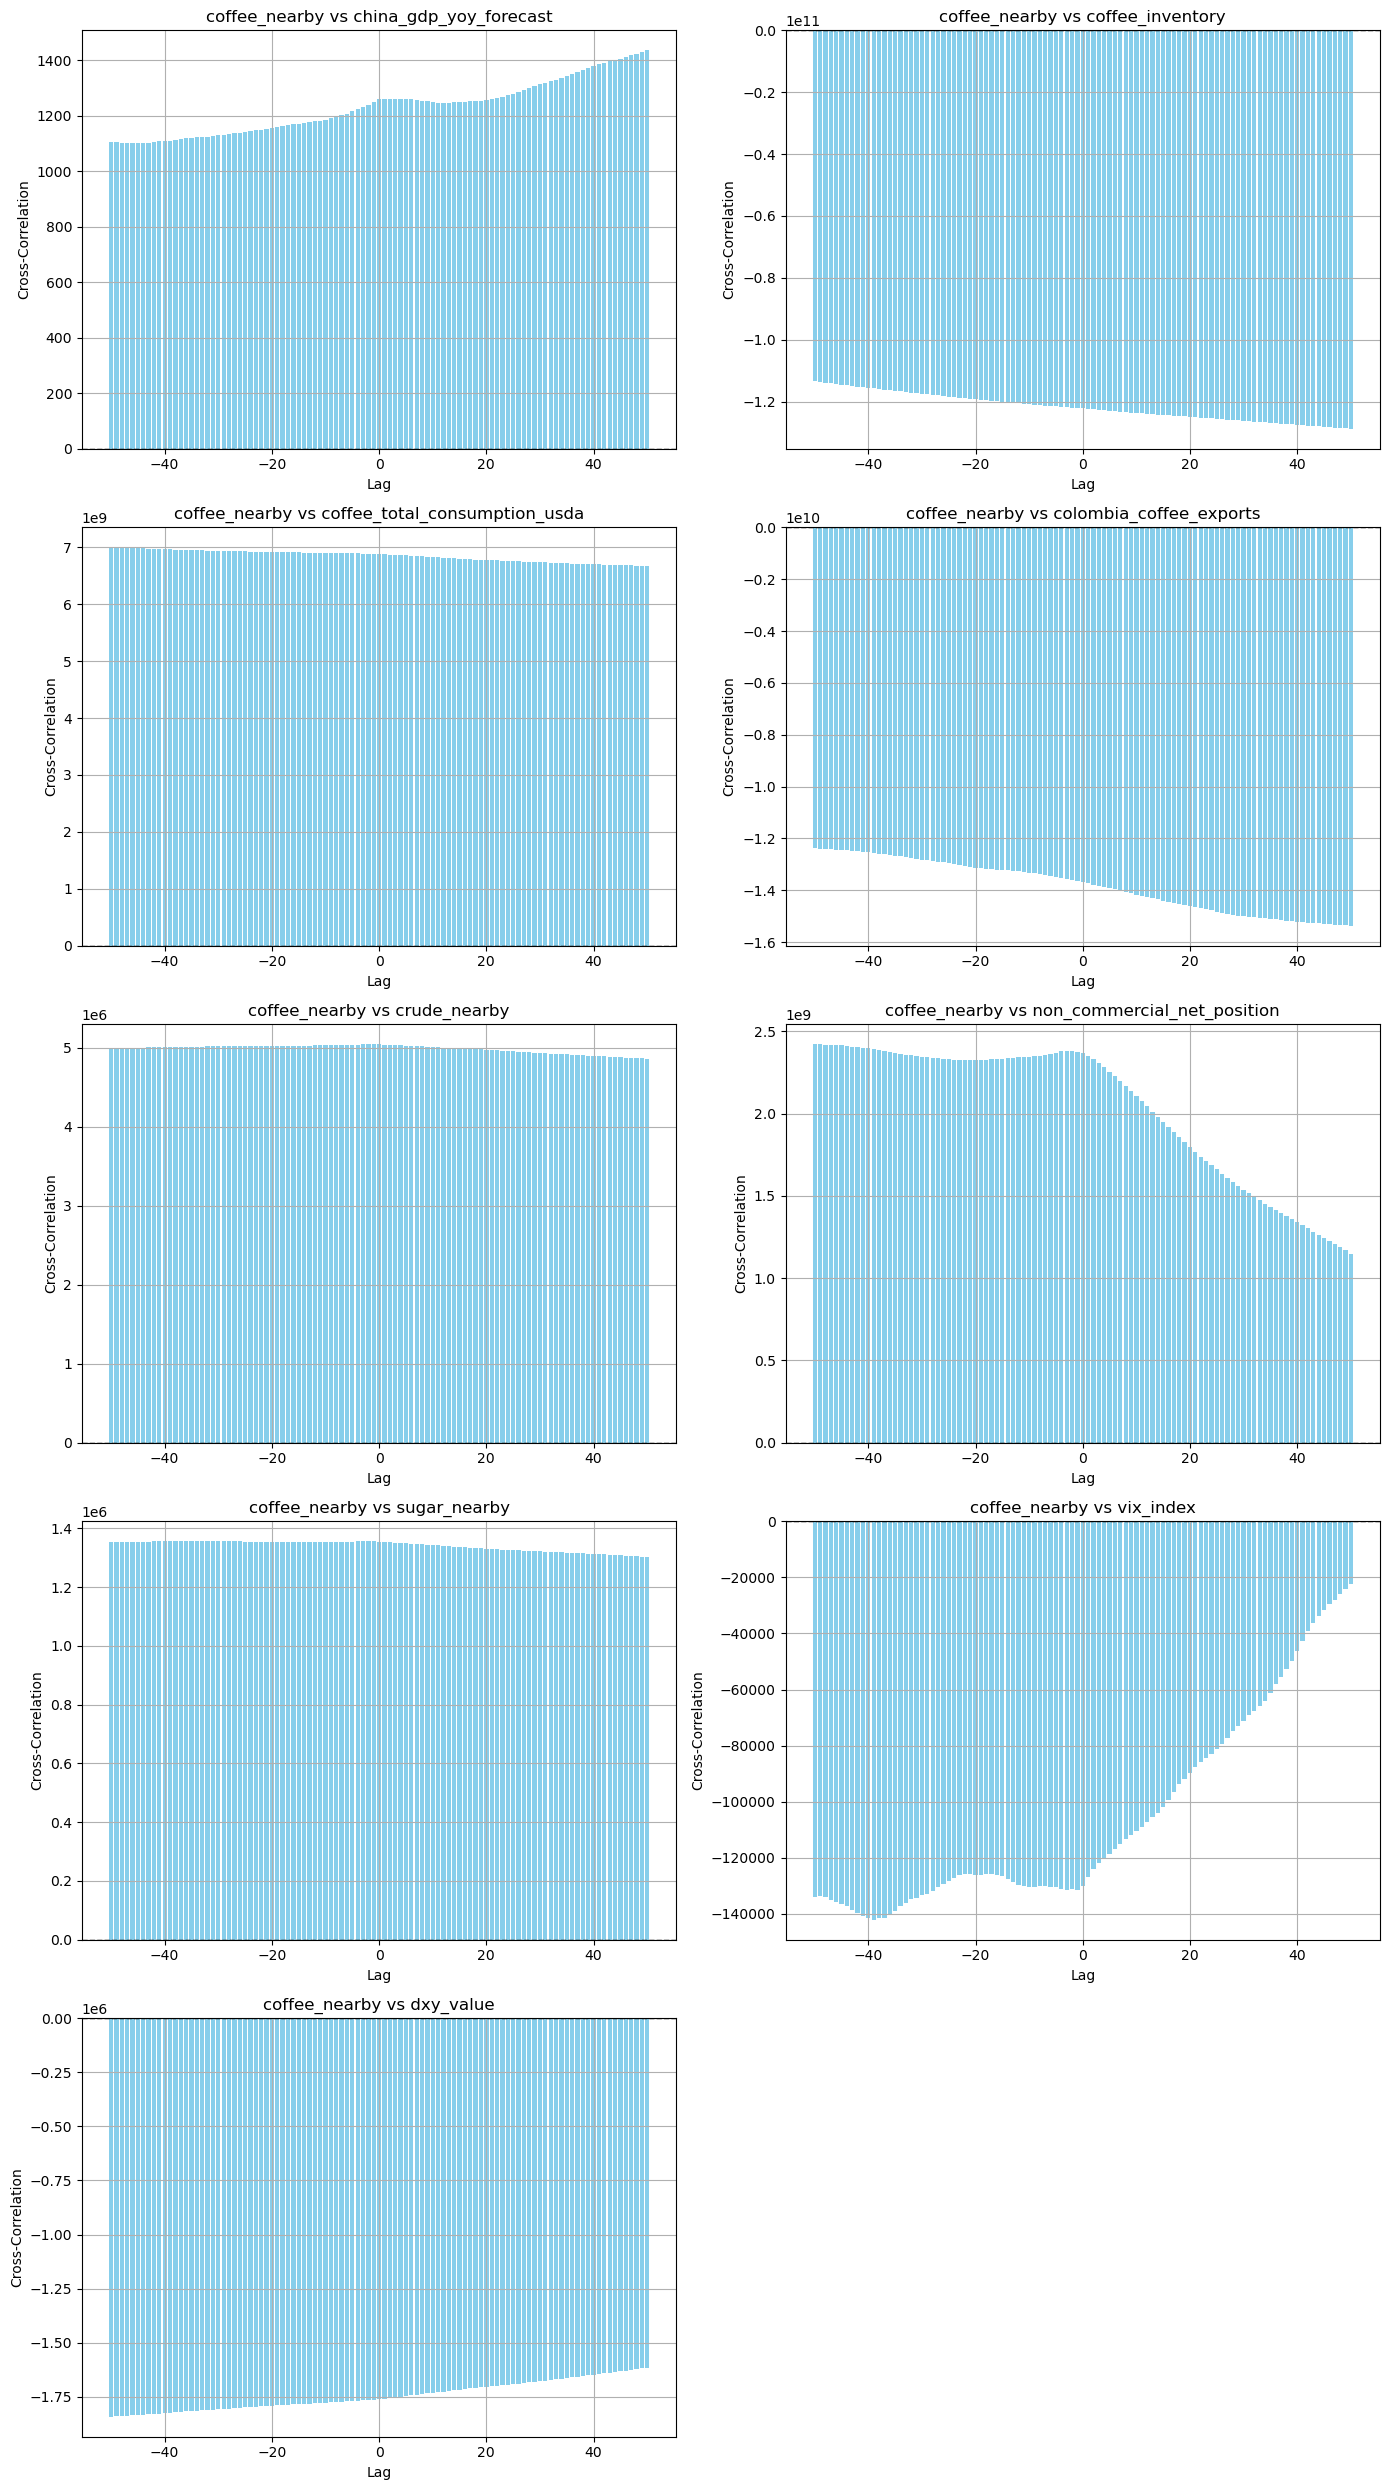

In [51]:
from scipy.signal import correlate
import numpy as np

# Function to compute and plot cross-correlation
def plot_cross_correlation(ax, variable_name_x, variable_name_y, lags=50):
    x = pivoted_data_filtered_bfilled[variable_name_x].dropna()
    y = pivoted_data_filtered_bfilled[variable_name_y].dropna()
    
    # Align the two series to ensure same length
    common_index = x.index.intersection(y.index)
    x = x.loc[common_index]
    y = y.loc[common_index]
    
    # Compute cross-correlation
    cross_corr = correlate(y - np.mean(y), x - np.mean(x), mode='full')
    lags_array = np.arange(-len(x) + 1, len(x))
    mid_point = len(cross_corr) // 2
    lags_array = lags_array[mid_point - lags : mid_point + lags + 1]
    cross_corr = cross_corr[mid_point - lags : mid_point + lags + 1]
    
    # Plot cross-correlation
    ax.bar(lags_array, cross_corr, color='skyblue')
    ax.axhline(0, color='black', linewidth=1, linestyle='--')
    ax.set_title(f'{variable_name_x} vs {variable_name_y}')
    ax.set_xlabel('Lag')
    ax.set_ylabel('Cross-Correlation')
    ax.grid(True)

# Variables to exclude
excluded_variables = ['rolling_mean', 'rolling_std']
variables_to_plot = [var for var in pivoted_data_filtered_bfilled.columns if var not in excluded_variables]

# Target variable
target_variable = 'coffee_nearby'

# Create subplots
num_plots = len(variables_to_plot) - 1  # Exclude the target variable itself
cols = 2
rows = (num_plots + cols - 1) // cols  # Compute number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 5))
axes = axes.flatten()

# Plot cross-correlation for each variable
plot_index = 0
for variable in variables_to_plot:
    if variable != target_variable:  # Skip the target variable itself
        plot_cross_correlation(axes[plot_index], target_variable, variable)
        plot_index += 1

# Hide any unused axes
for i in range(plot_index, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


**Correlation matrix**

Correlation Matrix (Excluding Rolling Metrics):
 variable                       china_gdp_yoy_forecast  coffee_inventory  \
variable                                                                  
china_gdp_yoy_forecast                       1.000000         -0.018663   
coffee_inventory                            -0.018663          1.000000   
coffee_nearby                                0.069878         -0.252382   
coffee_total_consumption_usda               -0.289232          0.492413   
colombia_coffee_exports                     -0.380503         -0.009676   
crude_nearby                                -0.083713          0.455067   
non_commercial_net_position                  0.360655          0.071544   
sugar_nearby                                 0.008011         -0.065734   
vix_index                                    0.096040          0.093989   
dxy_value                                   -0.131774         -0.145361   

variable                       coffee_nearby  coff

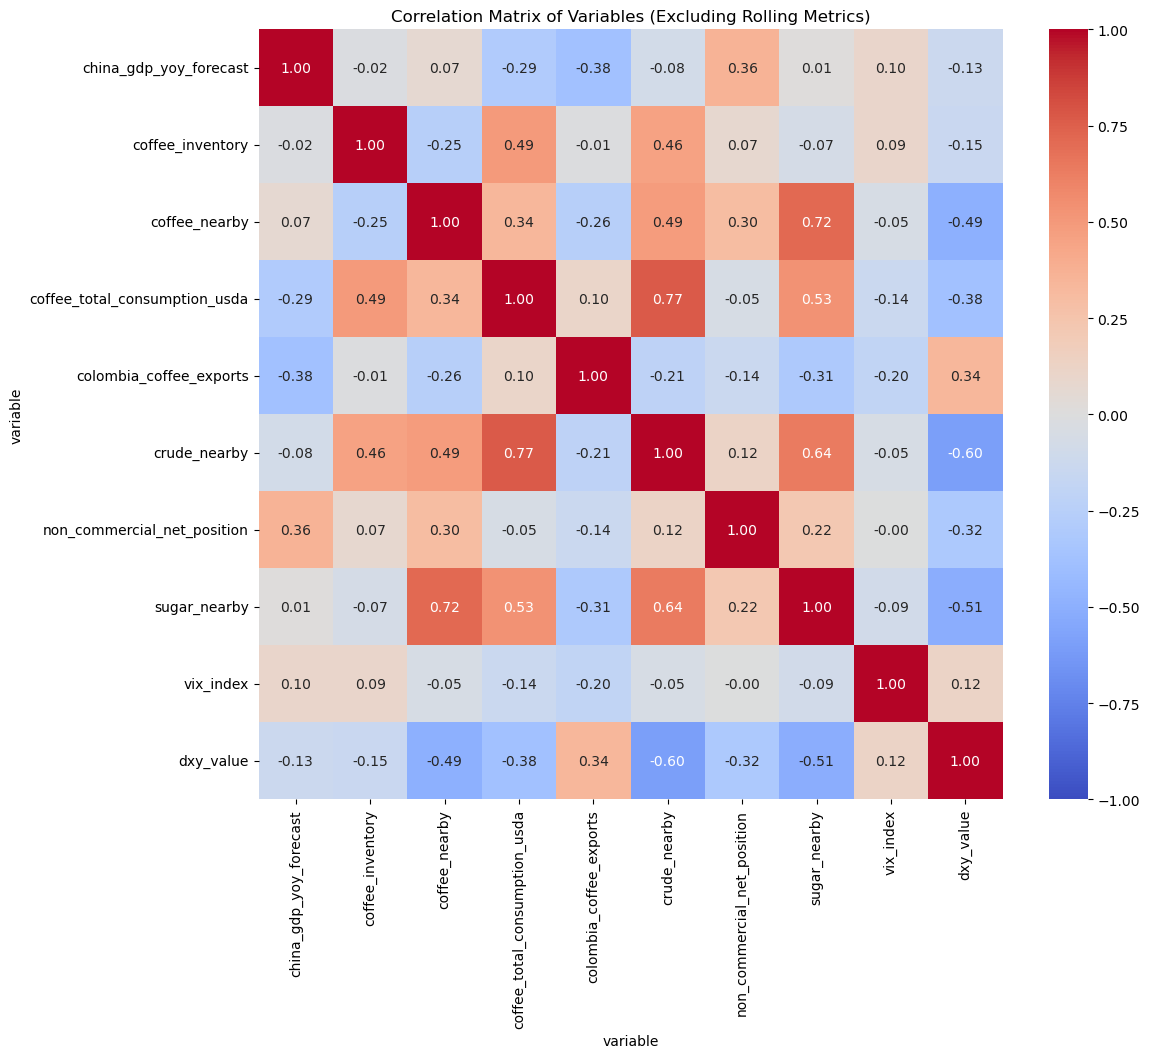

In [53]:
# Exclude rolling mean and rolling std columns from the analysis
variables = [var for var in pivoted_data_filtered_bfilled.columns if not any(keyword in var for keyword in ['rolling_mean', 'rolling_std'])]

# Filter the pivoted DataFrame to include only the selected variables
filtered_data = pivoted_data_filtered_bfilled[variables]

# Compute the correlation matrix
correlation_matrix = filtered_data.corr()

# Display the correlation matrix
print("Correlation Matrix (Excluding Rolling Metrics):\n", correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Variables (Excluding Rolling Metrics)')
plt.show()


**Autocorrelation**

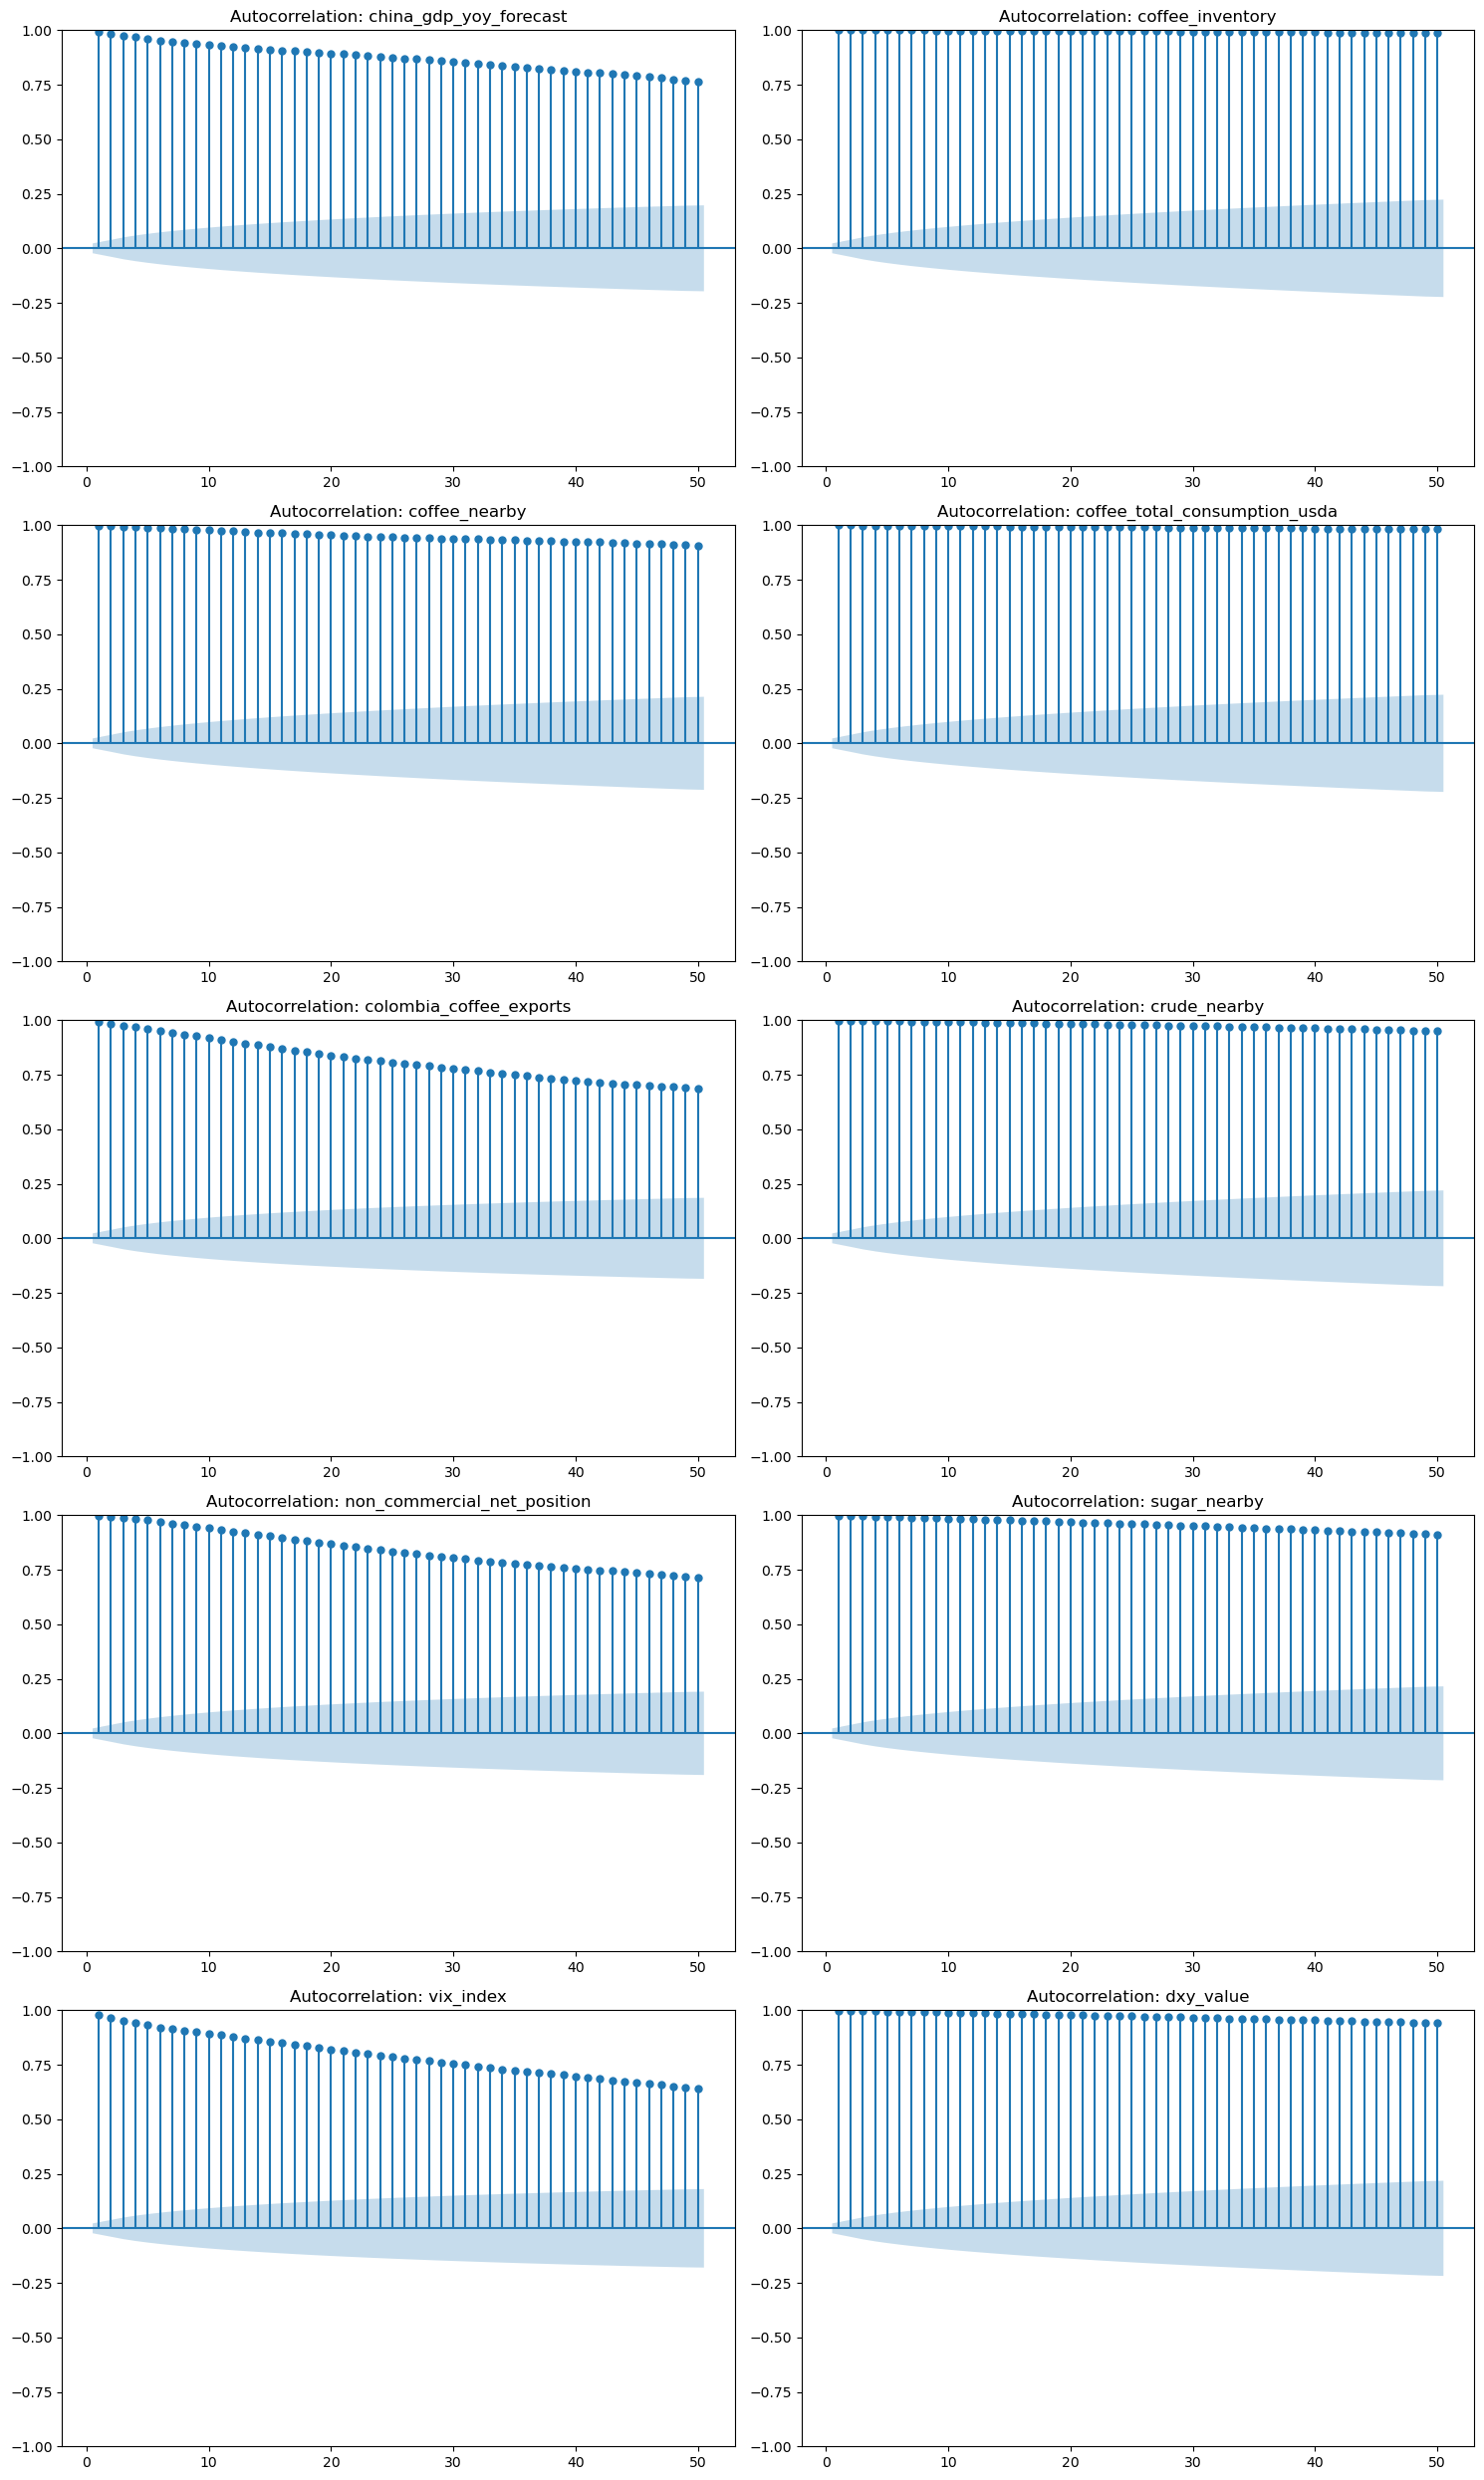

In [55]:
from statsmodels.graphics.tsaplots import plot_acf

# Filter out rolling mean and rolling std columns if they exist
variables = [var for var in pivoted_data_filtered_bfilled.columns if not any(keyword in var for keyword in ['rolling_mean', 'rolling_std'])]

# Prepare the layout for multiple plots
n_vars = len(variables)
n_rows = (n_vars + 1) // 2  # Two plots per row
fig, axes = plt.subplots(n_rows, 2, figsize=(15, n_rows * 5))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each variable to compute and plot autocorrelation
for i, variable in enumerate(variables):
    data = pivoted_data_filtered_bfilled[variable].dropna()  # Remove NaN values for autocorrelation
    
    # Use statsmodels to plot autocorrelation
    plot_acf(data, lags=50, ax=axes[i], title=f'Autocorrelation: {variable}', zero=False)

# Remove any empty subplots if the number of variables is odd
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### 4. **Time Lag Analysis**

In the time lag analysis phase, we explored the temporal dependencies between the target variable (`coffee_nearby`) and its explanatory variables. Key steps included:

#### **Lagged Features Creation:**
- Generated lagged versions of explanatory variables to capture their delayed effects on coffee prices. For example:
  - `coffee_inventory_lag_1` (1-day lag of coffee inventory).
  - `crude_nearby_lag_2` (2-day lag of crude oil prices).

#### **Feature Evaluation:**
- Assessed the impact of lagged features on the target variable by observing their correlations and significance in preliminary models.
- Verified that certain variables showed stronger predictive power with lags, particularly:
  - Coffee inventory and crude oil prices, which exhibited delayed effects on coffee prices.

#### **Model Integration:**
- Incorporated selected lagged features into the predictive models to improve accuracy and account for temporal dependencies.


Lagged Scatter Plots for china_gdp_yoy_forecast


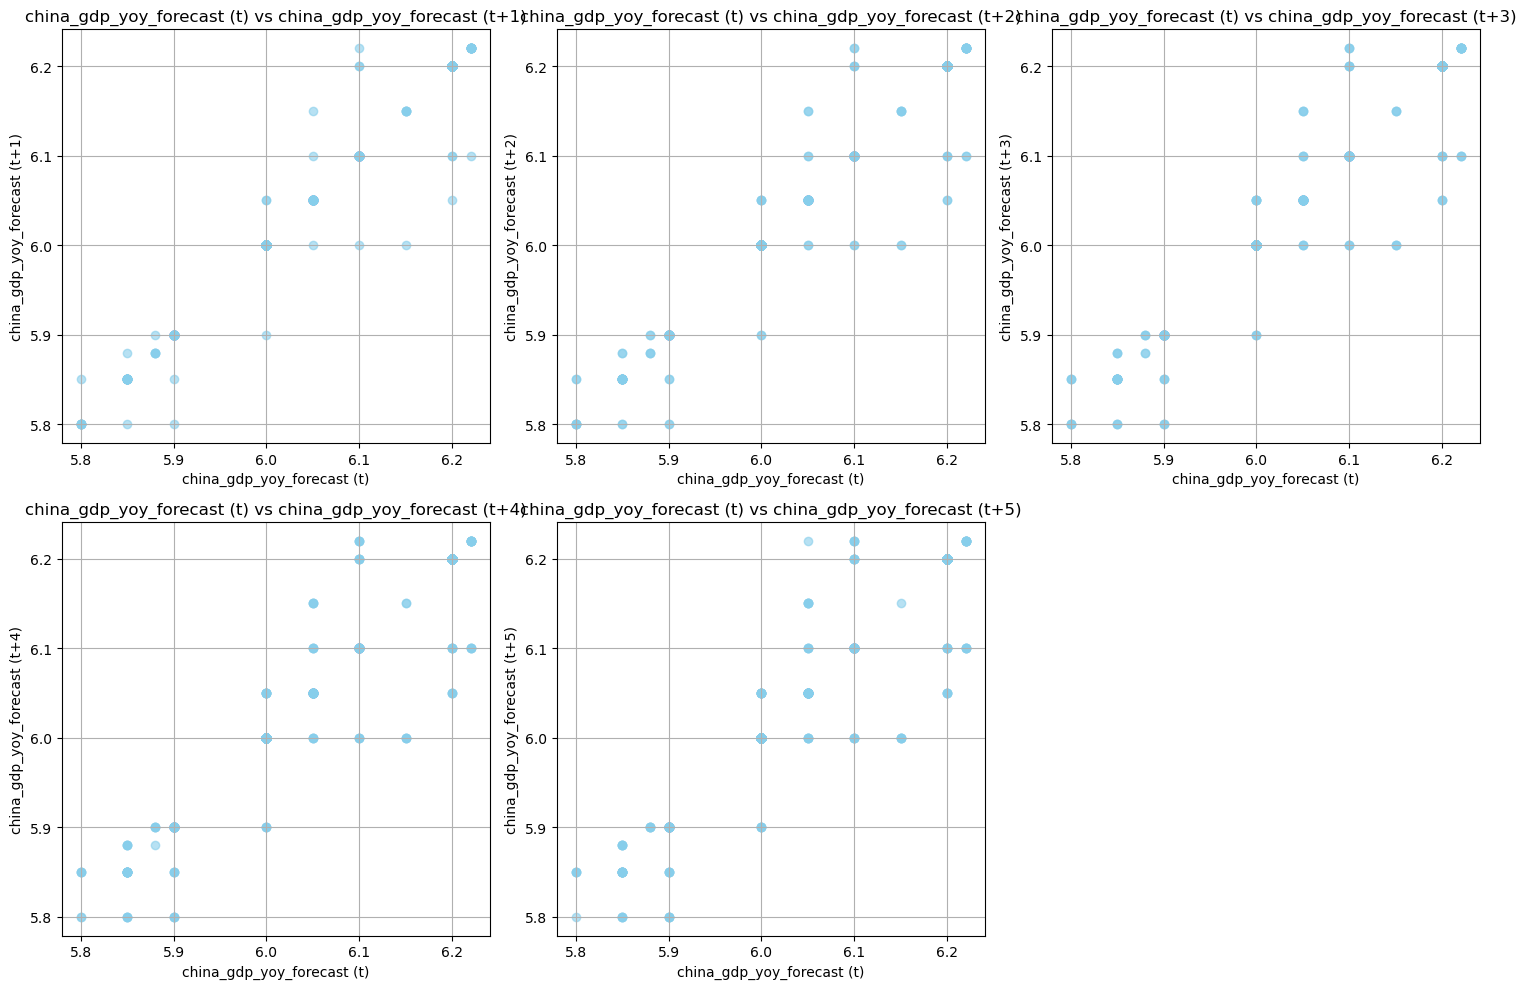

Lagged Scatter Plots for coffee_inventory


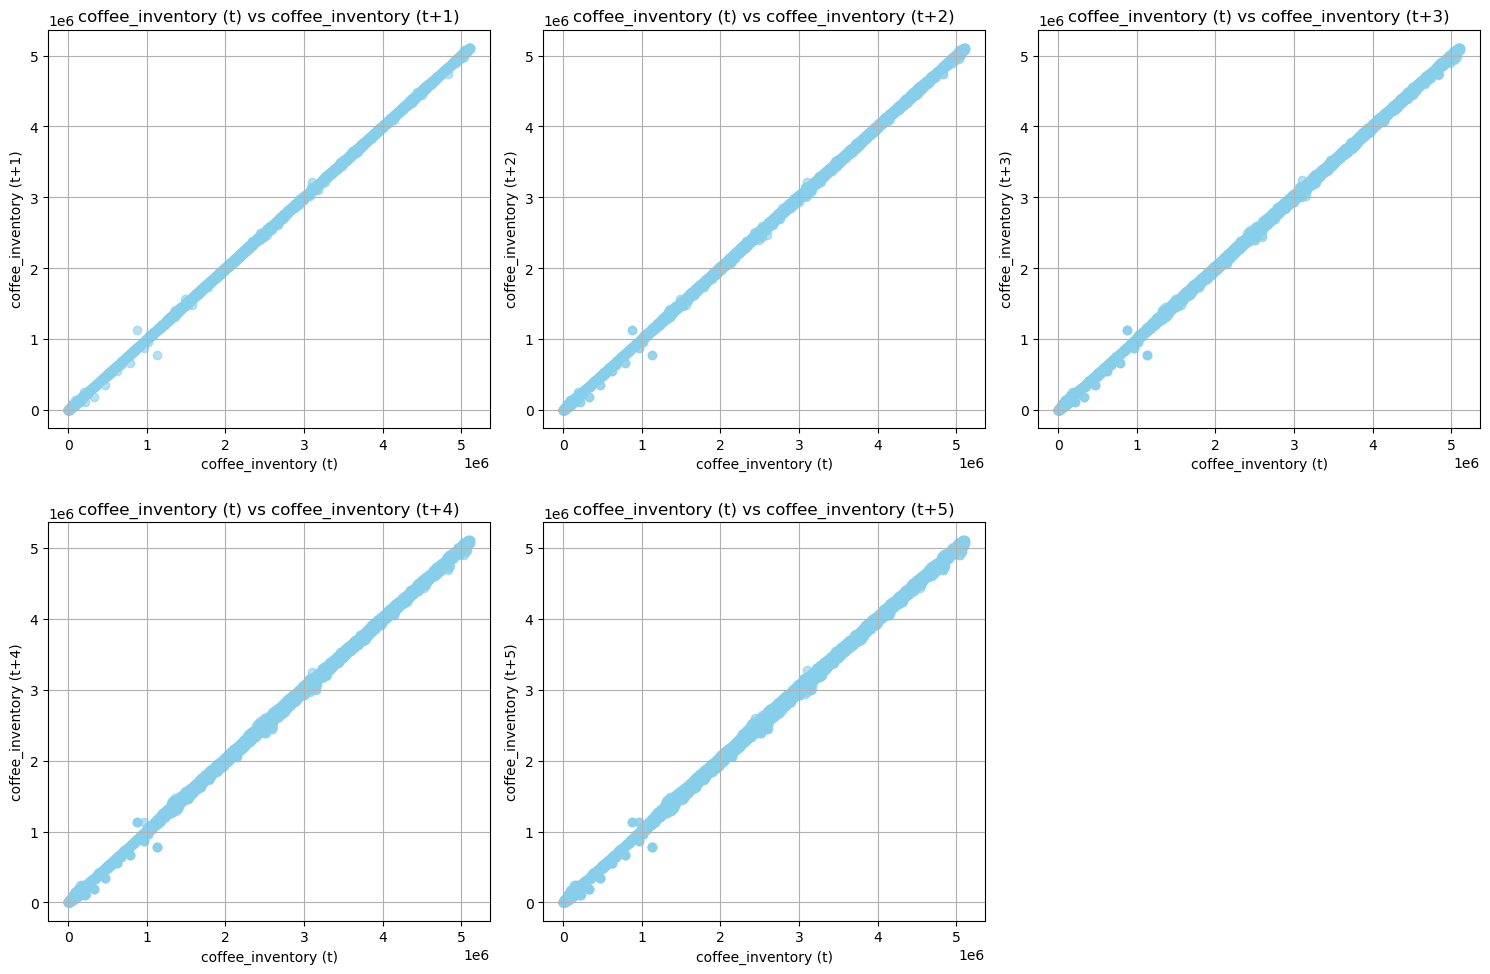

Lagged Scatter Plots for coffee_nearby


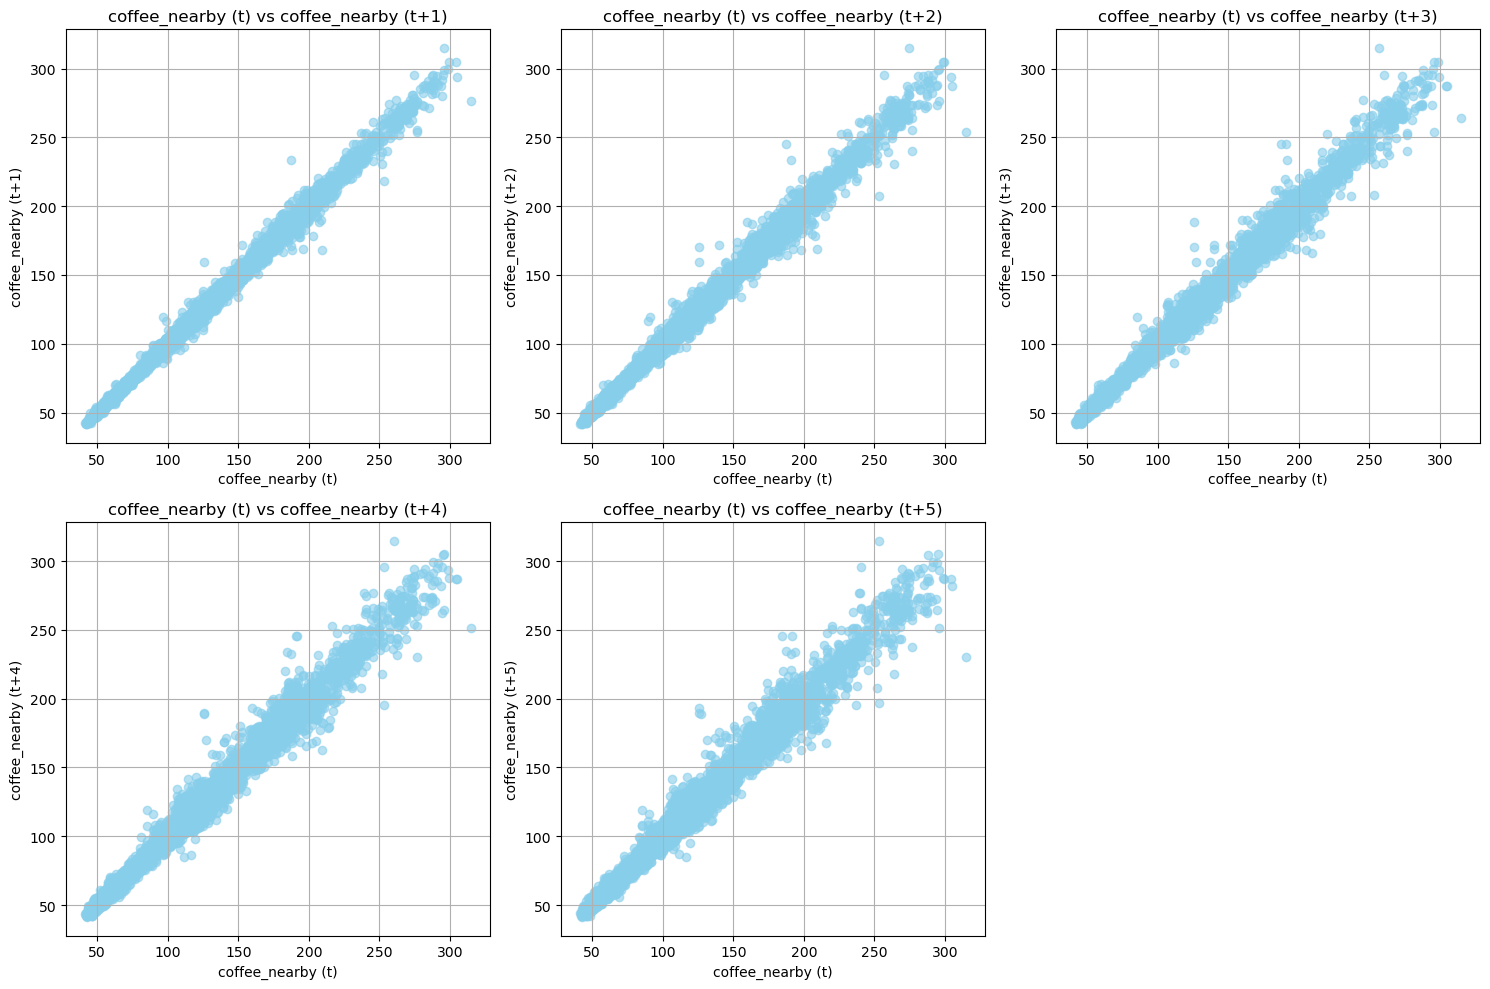

Lagged Scatter Plots for coffee_total_consumption_usda


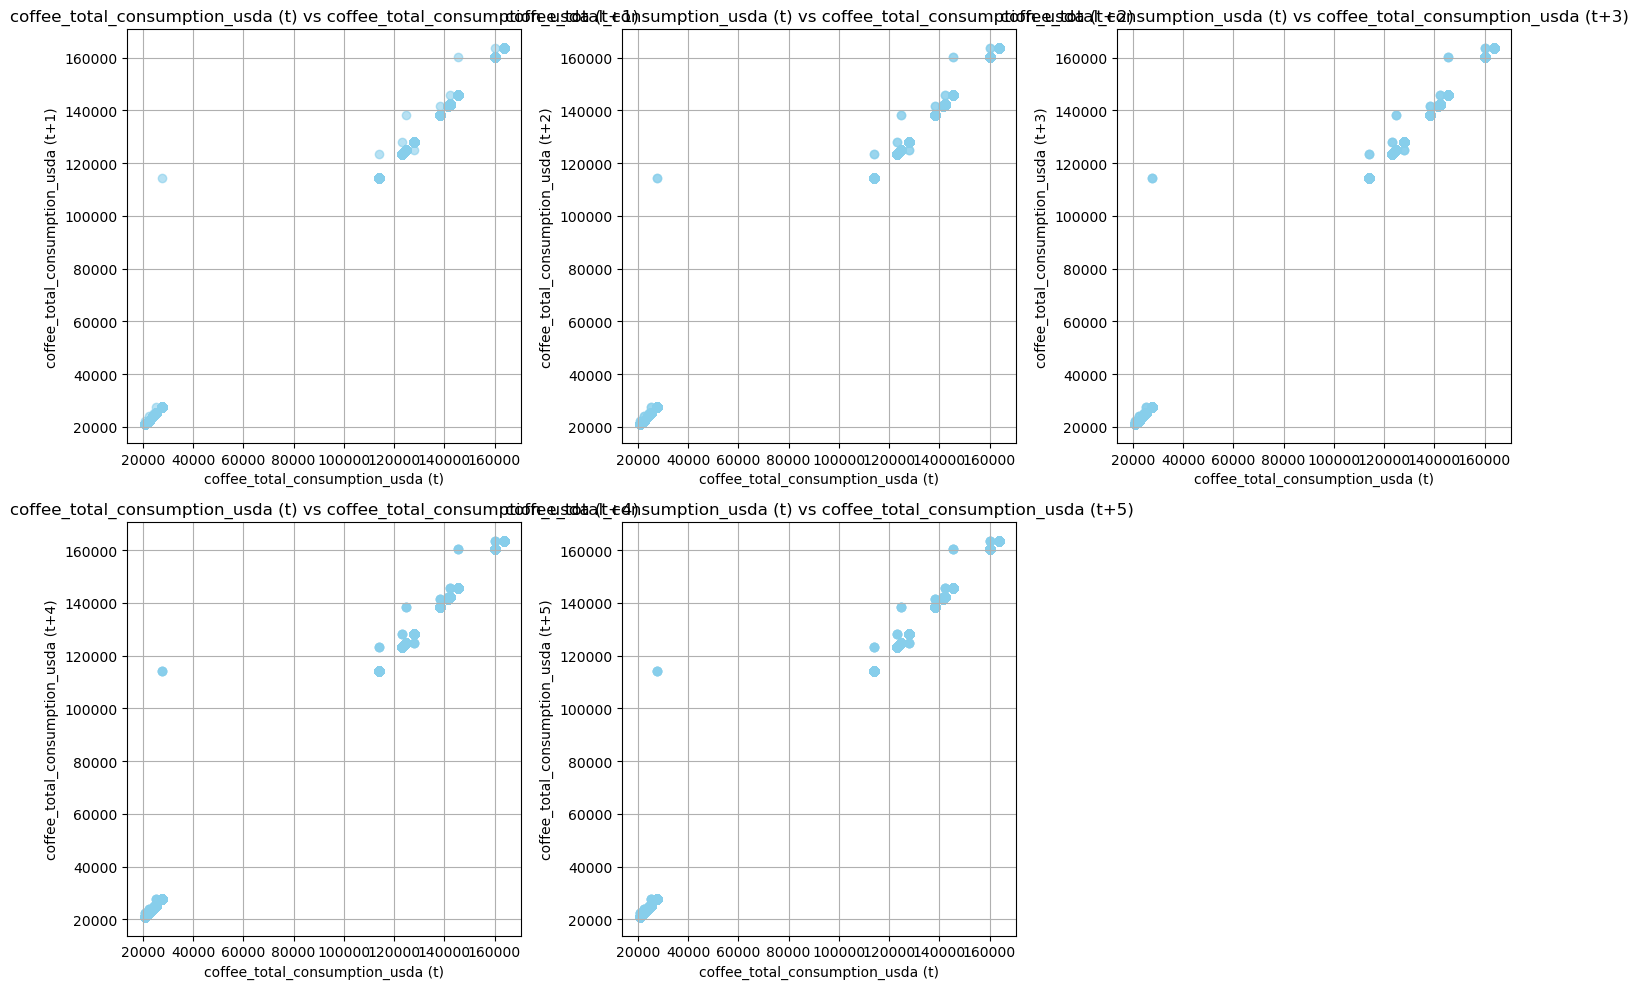

Lagged Scatter Plots for colombia_coffee_exports


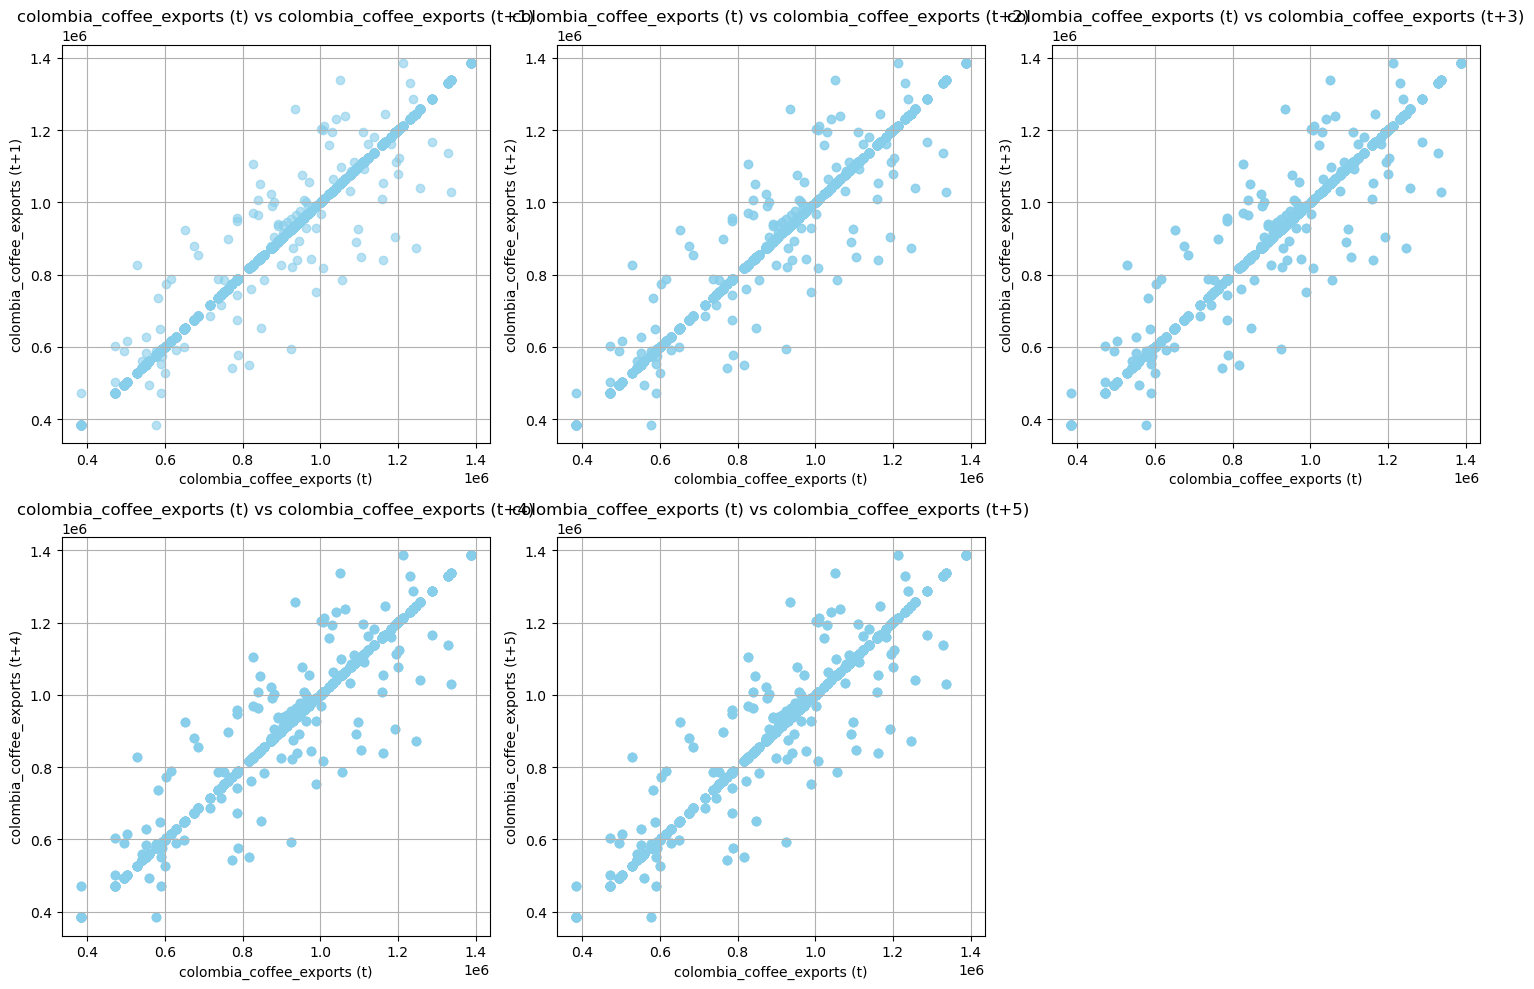

Lagged Scatter Plots for crude_nearby


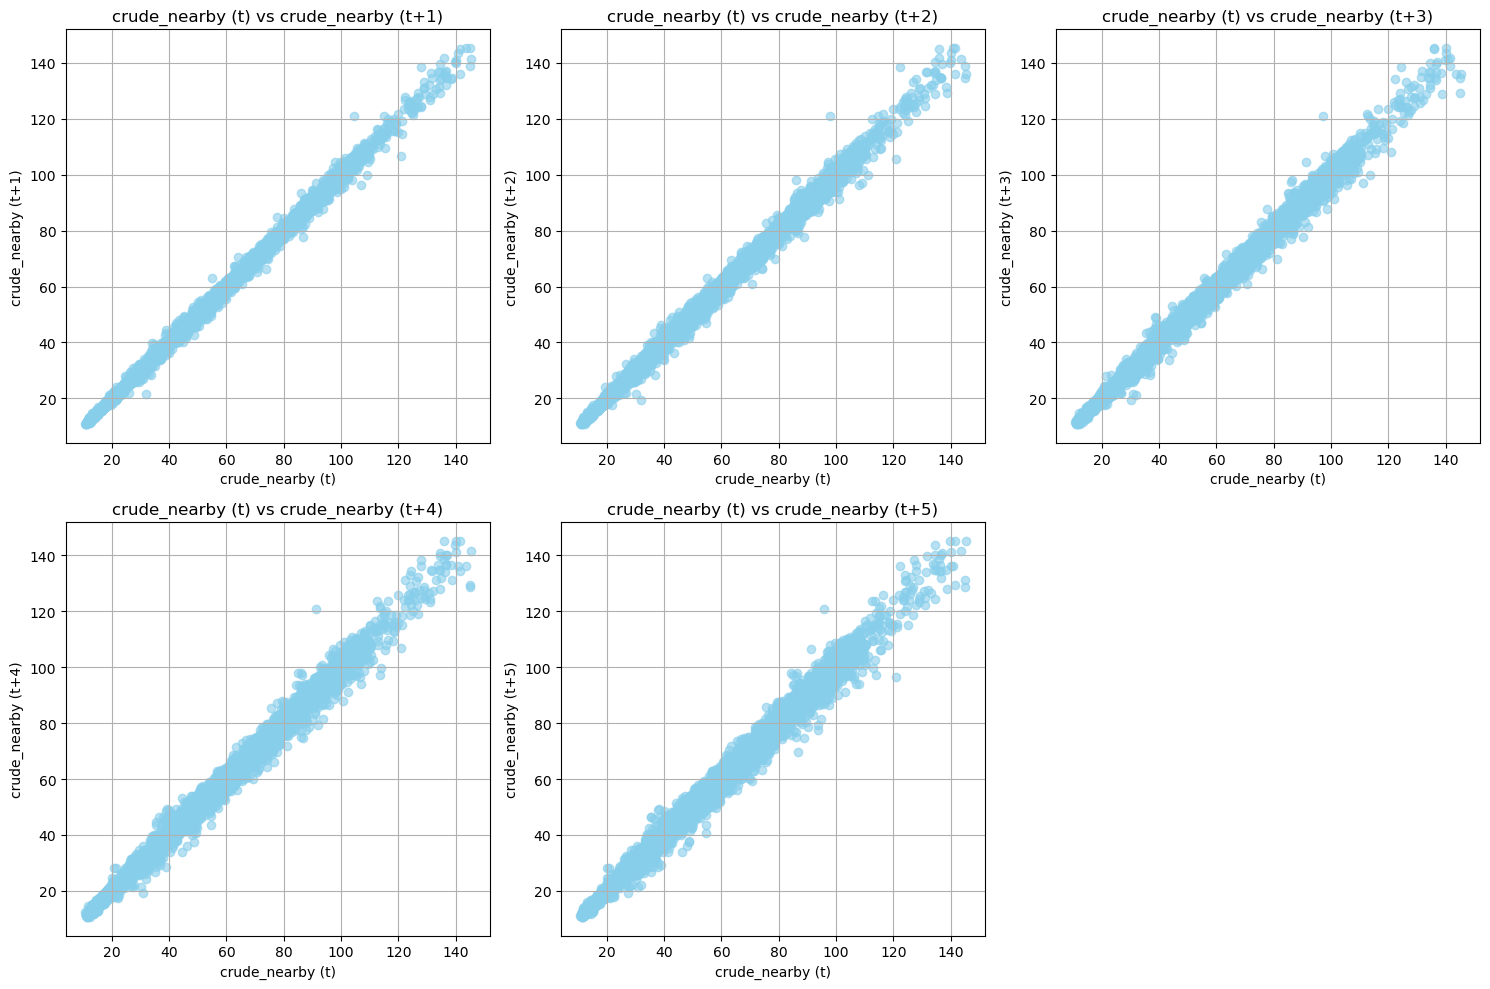

Lagged Scatter Plots for non_commercial_net_position


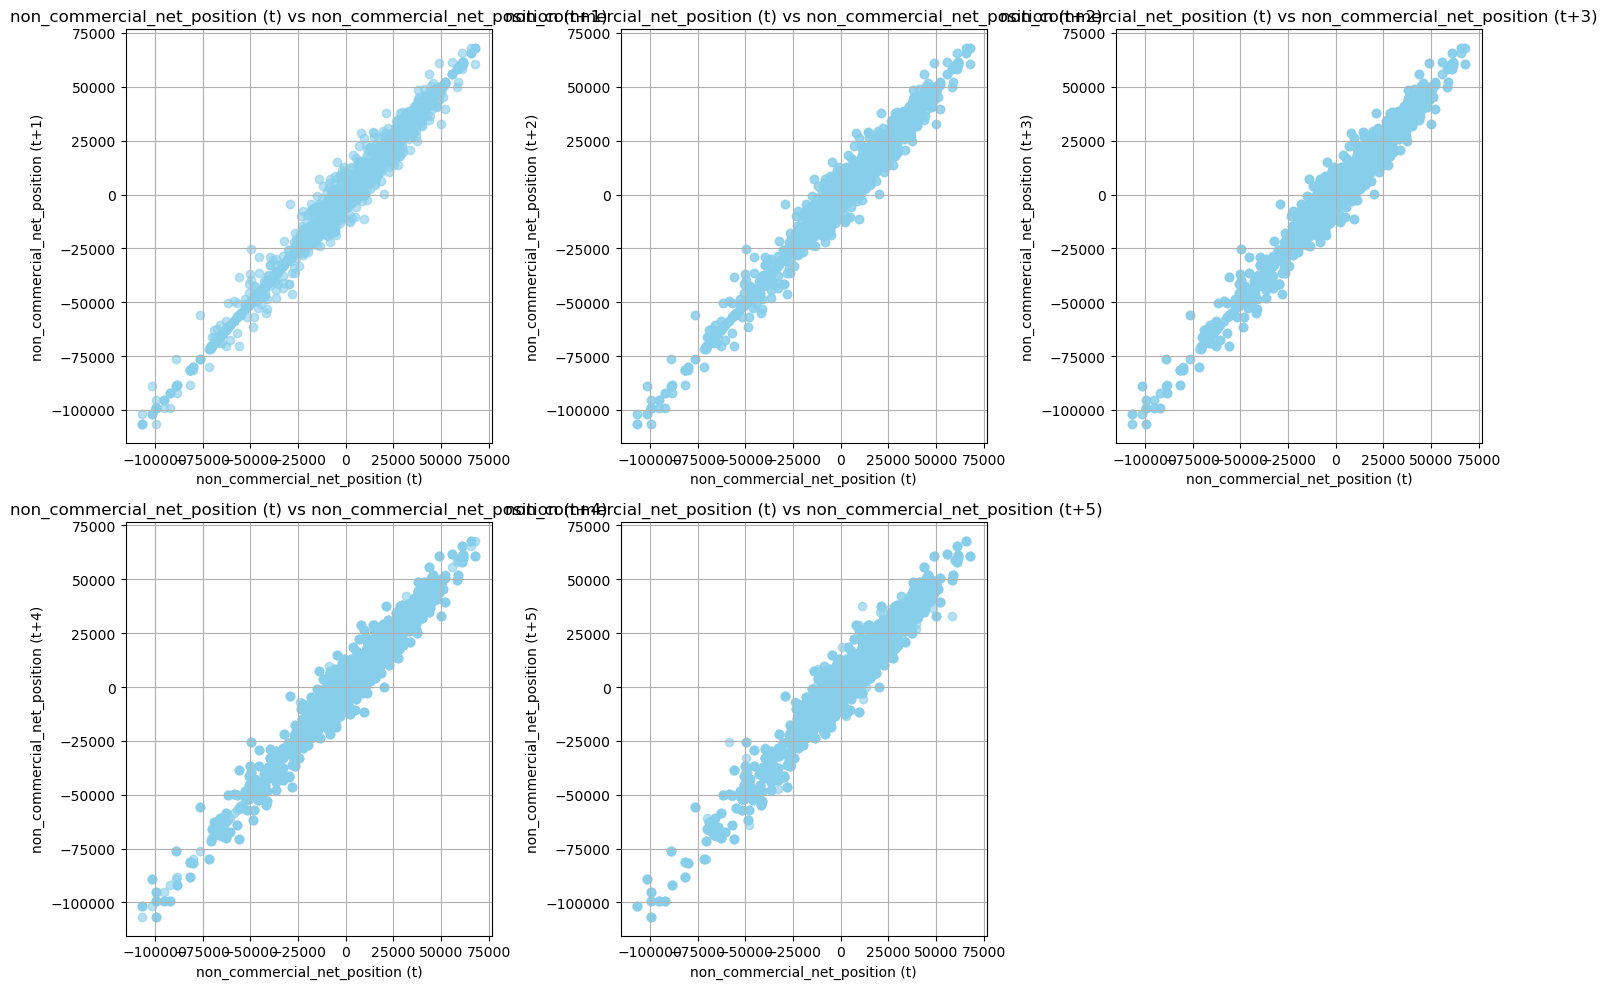

Lagged Scatter Plots for sugar_nearby


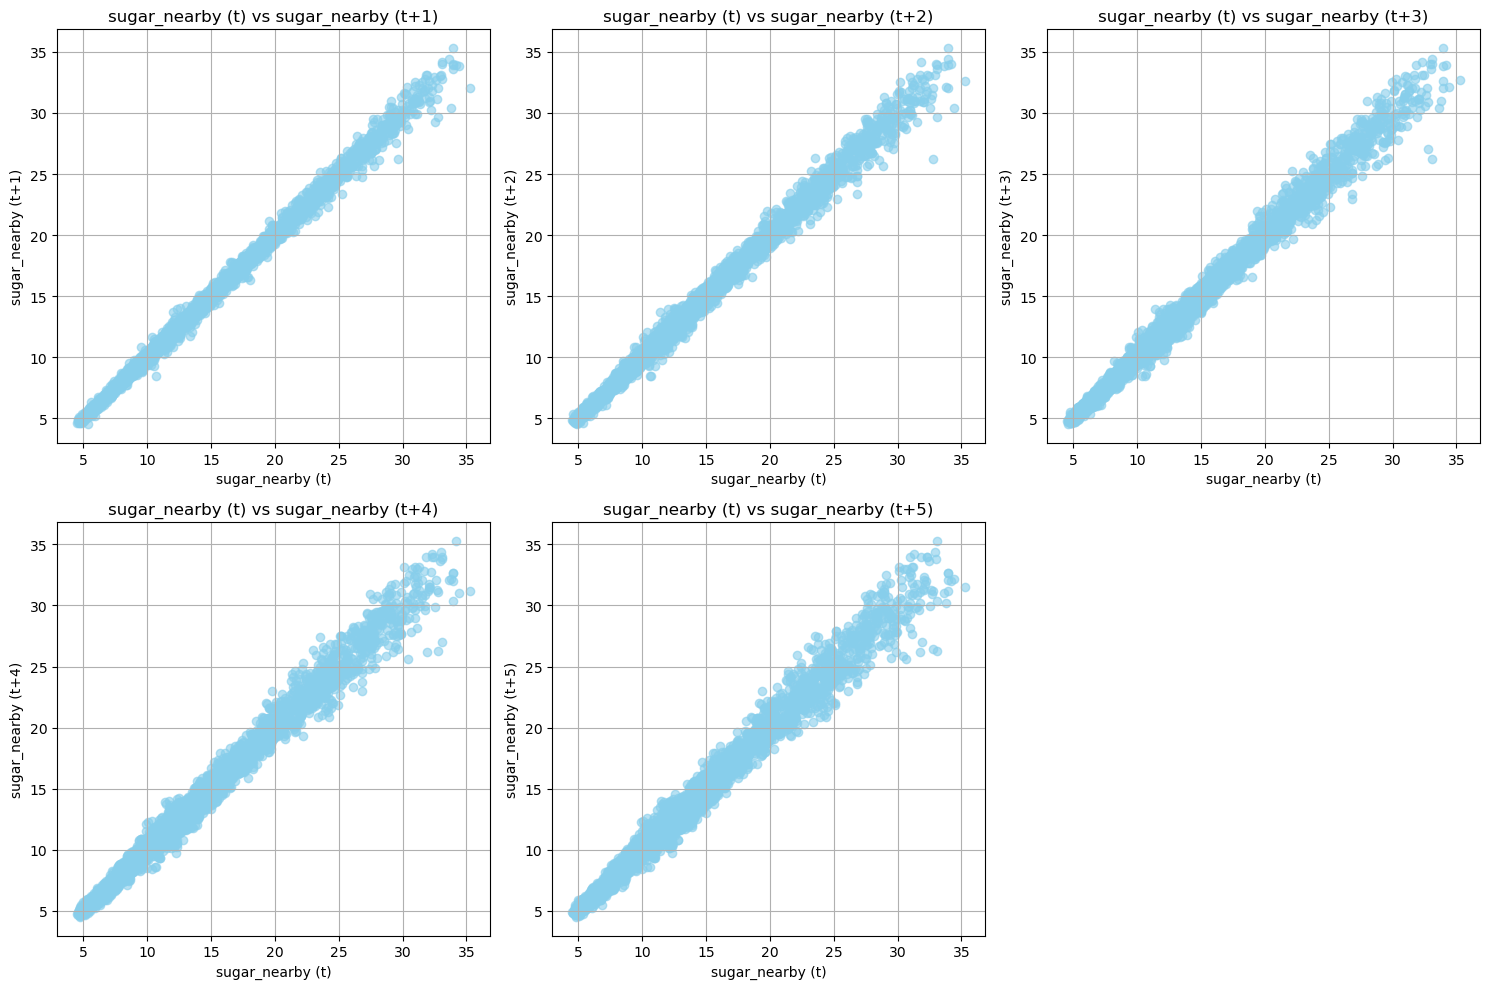

Lagged Scatter Plots for vix_index


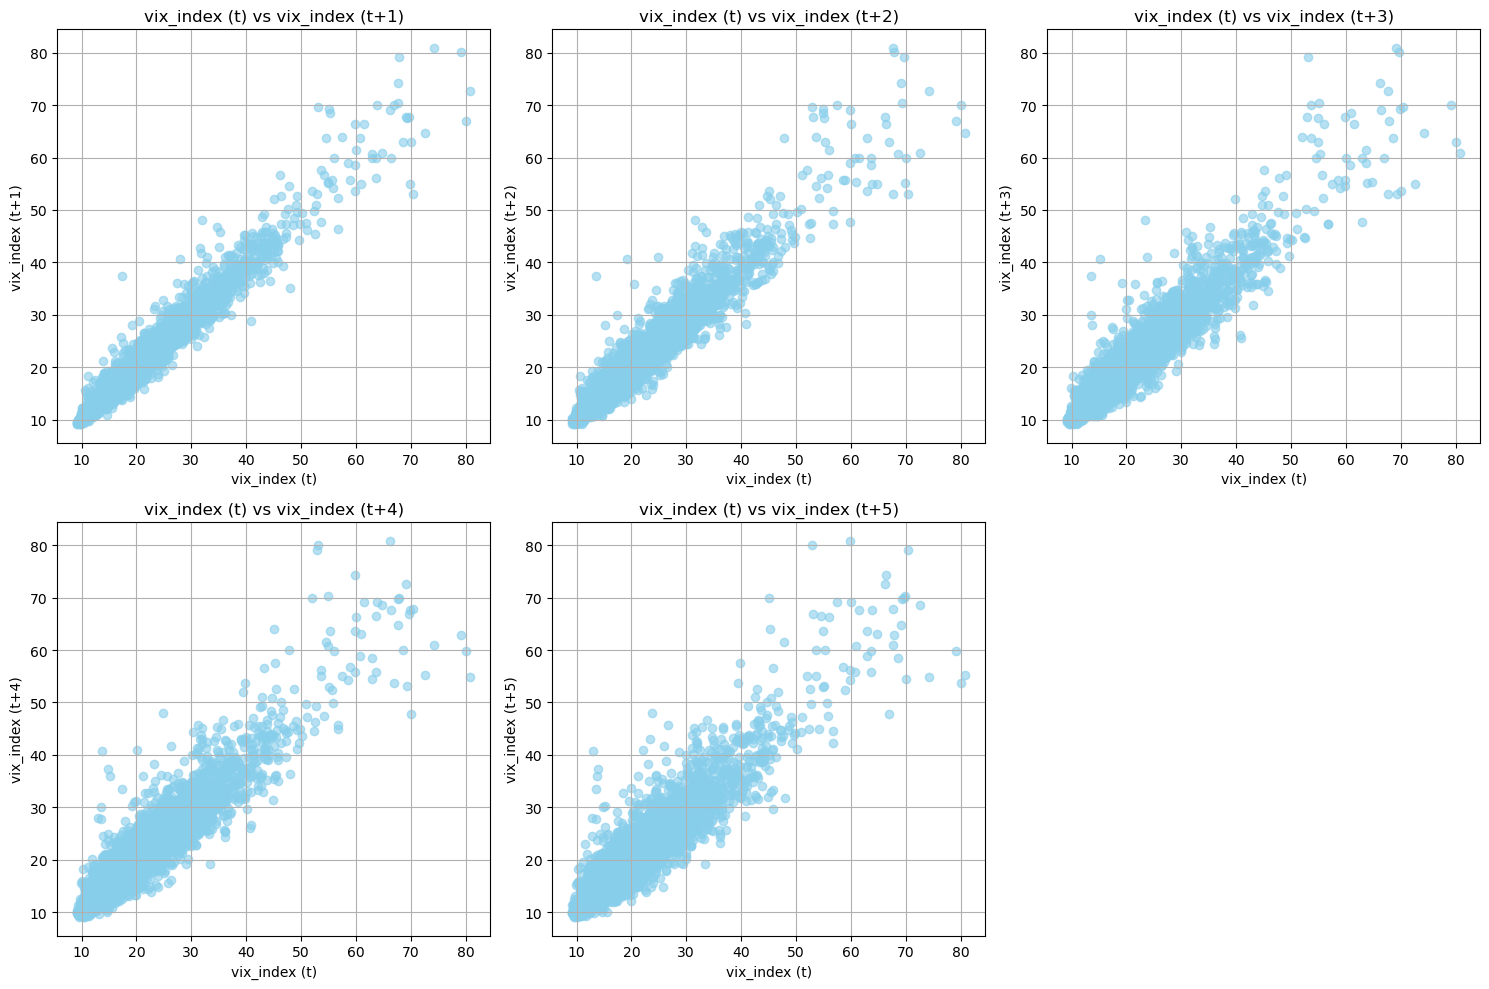

Lagged Scatter Plots for dxy_value


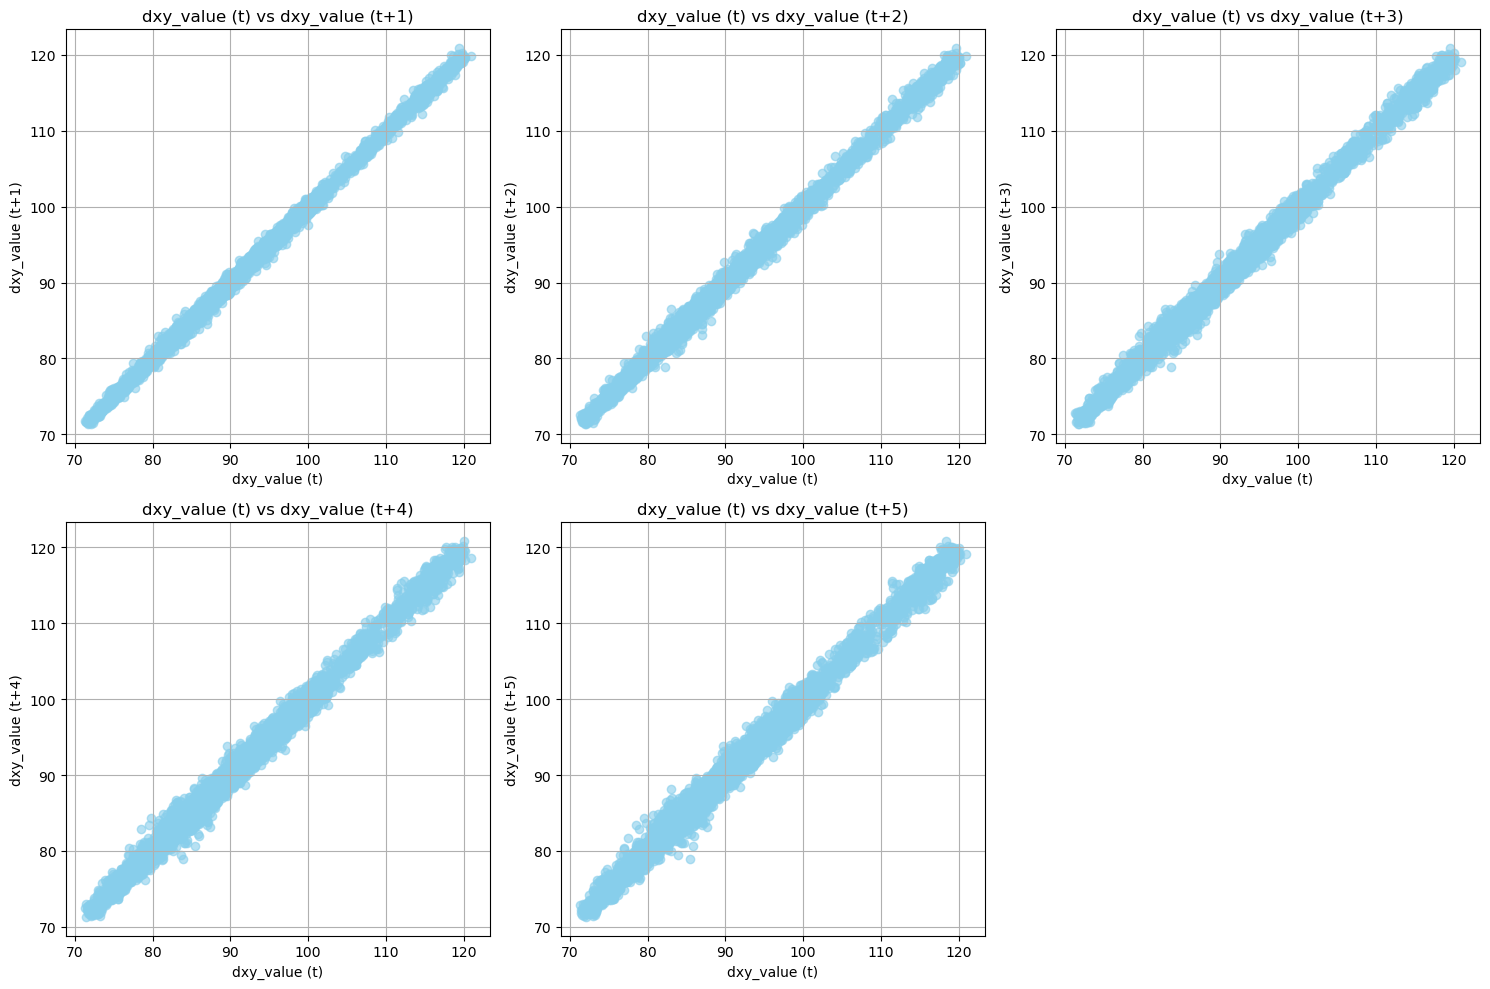

In [57]:
# Function to create lagged scatter plots
def plot_lagged_scatter(variable, lags=5):
    data = pivoted_data_filtered_bfilled[variable].dropna()
    plt.figure(figsize=(15, 10))
    
    for i in range(1, lags + 1):
        plt.subplot(2, (lags + 1) // 2, i)
        plt.scatter(data[:-i], data.shift(-i)[:-i], alpha=0.6, color='skyblue')
        plt.title(f'{variable} (t) vs {variable} (t+{i})')
        plt.xlabel(f'{variable} (t)')
        plt.ylabel(f'{variable} (t+{i})')
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Exclude rolling_mean and rolling_std
excluded_variables = ['rolling_mean', 'rolling_std']
variables_to_plot = [var for var in pivoted_data_filtered_bfilled.columns if var not in excluded_variables]

# Plot lagged scatter plots for each variable, excluding rolling_mean and rolling_std
lags = 5  # Specify the number of lags
for variable in variables_to_plot:
    print(f'Lagged Scatter Plots for {variable}')
    plot_lagged_scatter(variable, lags=lags)


### 5. **Causal Analysis**

In the causal analysis phase, we investigated the relationships between explanatory variables and the target variable (`coffee_nearby`) to assess if changes in the former could predict changes in the latter. Key steps included:

1. **Granger Causality Test**:  
   - Conducted Granger causality tests to determine whether past values of explanatory variables had a statistically significant effect on the future values of `coffee_nearby`.  
   - Identified variables such as `coffee_inventory` and `crude_nearby` as having strong causal relationships with coffee prices.

2. **Economic and Market Context**:  
   - Incorporated domain knowledge to interpret results, ensuring causality findings aligned with known market behaviors. For instance:
     - A rise in crude oil prices (logistical costs) tends to influence coffee production costs, indirectly affecting coffee prices.  
     - Inventory levels directly impact supply-side pressure on coffee prices.

3. **Variable Selection for Modeling**:  
   - Prioritized variables with demonstrated causal effects in the predictive models, ensuring these insights improved forecasting accuracy.

This phase helped refine the model by focusing on explanatory variables that not only correlate with but also causally influence coffee prices, thereby enhancing the predictive power of our approach.


In [59]:
# Exclude rolling mean and rolling std variables from the DataFrame
pivoted_data_filtered_bfilled = pivoted_data_filtered_bfilled.drop(columns=['rolling_mean', 'rolling_std'], errors='ignore')

# Perform Granger Causality Test excluding rolling mean and rolling std
from statsmodels.tsa.stattools import grangercausalitytests

# Function to perform Granger causality test
def perform_granger_causality(target_variable, explanatory_variable, max_lags=5):
    # Prepare data by excluding rolling mean and rolling std
    data = pivoted_data_filtered_bfilled[[target_variable, explanatory_variable]].dropna()

    # Perform the Granger causality test
    print(f'Granger Causality Test between {explanatory_variable} and {target_variable}:')
    test_result = grangercausalitytests(data, max_lags, verbose=True)
    
# Define the target variable (e.g., coffee_nearby)
target_variable = 'coffee_nearby'

# Perform the Granger causality test for each explanatory variable against the target variable
explanatory_variables = [var for var in pivoted_data_filtered_bfilled.columns if var != target_variable]

# Perform Granger causality test for each explanatory variable
for var in explanatory_variables:
    perform_granger_causality(target_variable, var, max_lags=5)


Granger Causality Test between china_gdp_yoy_forecast and coffee_nearby:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0031  , p=0.9556  , df_denom=7543, df_num=1
ssr based chi2 test:   chi2=0.0031  , p=0.9556  , df=1
likelihood ratio test: chi2=0.0031  , p=0.9556  , df=1
parameter F test:         F=0.0031  , p=0.9556  , df_denom=7543, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0721  , p=0.9304  , df_denom=7540, df_num=2
ssr based chi2 test:   chi2=0.1443  , p=0.9304  , df=2
likelihood ratio test: chi2=0.1443  , p=0.9304  , df=2
parameter F test:         F=0.0721  , p=0.9304  , df_denom=7540, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4168  , p=0.7410  , df_denom=7537, df_num=3
ssr based chi2 test:   chi2=1.2516  , p=0.7407  , df=3
likelihood ratio test: chi2=1.2514  , p=0.7407  , df=3
parameter F test:         F=0.4168  , p=0.7410  , df_denom=7537, df_num=3

Granger Causal

C:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print resul

ssr based F test:         F=51.9071 , p=0.0000  , df_denom=7536, df_num=2
ssr based chi2 test:   chi2=103.8830, p=0.0000  , df=2
likelihood ratio test: chi2=103.1740, p=0.0000  , df=2
parameter F test:         F=51.9071 , p=0.0000  , df_denom=7536, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=60.3532 , p=0.0000  , df_denom=7533, df_num=3
ssr based chi2 test:   chi2=181.2278, p=0.0000  , df=3
likelihood ratio test: chi2=179.0841, p=0.0000  , df=3
parameter F test:         F=60.3532 , p=0.0000  , df_denom=7533, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=66.8701 , p=0.0000  , df_denom=7530, df_num=4
ssr based chi2 test:   chi2=267.8003, p=0.0000  , df=4
likelihood ratio test: chi2=263.1536, p=0.0000  , df=4
parameter F test:         F=66.8701 , p=0.0000  , df_denom=7530, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=58.4483 , p=0.0000  , df_denom=7527, df_num=5
ssr based chi2

C:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


### 6. **Feature Engineering**

In the feature engineering phase, we focused on creating new variables to capture potential time dependencies and enhance the predictive power of our model. Key steps included:

#### **Lagged Variables:**
- Created lagged versions of explanatory variables to capture delayed effects on coffee prices, such as:
  - `coffee_inventory_lag_1` (1-day lag of coffee inventory).
  - `crude_nearby_lag_2` (2-day lag of crude oil prices).
  
#### **Moving Averages:**
- Calculated moving averages for certain variables (e.g., coffee consumption) to smooth out short-term fluctuations and highlight longer-term trends.

#### **Seasonality Indicators:**
- Included seasonality indicators, such as day-of-week or month-of-year, to capture patterns that repeat over time, helping to model seasonal effects on coffee prices.

#### **Trend Components:**
- Extracted trend components from variables that showed consistent upward or downward movements over time, improving the model's ability to understand long-term shifts.


In [61]:
import pandas as pd
import numpy as np
import calendar
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

# Optimized Feature Engineering Function
def optimized_feature_engineering(data, target_variable, lag_range=5, moving_avg_window=30):
    # Create lagged variables
    lagged_features = {
        f'{col}_lag_{lag}': data[col].shift(lag)
        for col in data.columns if col != target_variable
        for lag in range(1, lag_range + 1)
    }

    # Create moving averages
    moving_avg_features = {
        f'{col}_moving_avg_{moving_avg_window}': data[col].rolling(window=moving_avg_window).mean()
        for col in data.columns if col != target_variable
    }

    # Create trend and seasonality features
    trend_feature = {'trend': np.arange(len(data))}
    seasonality_features = {
        'month': data.index.month,
        'day_of_week': data.index.dayofweek,
        # Get holidays using the US Federal Holiday Calendar
        'is_holiday': data.index.isin(calendar().holidays(start=data.index.min(), end=data.index.max())).astype(int)
    }

    # Combine all new features into a single DataFrame
    new_features = pd.DataFrame({**lagged_features, **moving_avg_features, **trend_feature, **seasonality_features}, index=data.index)

    # Concatenate the new features with the original data
    engineered_data = pd.concat([data, new_features], axis=1)

    return engineered_data

# Apply the optimized feature engineering
engineered_data_optimized = optimized_feature_engineering(pivoted_data_filtered_bfilled, target_variable='coffee_nearby')

# Inspect the optimized engineered DataFrame
print("Optimized Engineered Data Head:\n", engineered_data_optimized.head())


Optimized Engineered Data Head:
             china_gdp_yoy_forecast  coffee_inventory  coffee_nearby  \
date                                                                  
1990-01-02                     6.2         1228136.0          80.56   
1990-01-03                     6.2         1228136.0          81.75   
1990-01-04                     6.2         1228136.0          82.48   
1990-01-05                     6.2         1228136.0          81.16   
1990-01-08                     6.2         1228136.0          81.38   

            coffee_total_consumption_usda  colombia_coffee_exports  \
date                                                                 
1990-01-02                        20995.0                 873916.0   
1990-01-03                        20995.0                 873916.0   
1990-01-04                        20995.0                 873916.0   
1990-01-05                        20995.0                 873916.0   
1990-01-08                        20995.0        

### 7. **Model Selection**
In the model selection phase, we explored both **Linear Regression** and **Random Forest Regression** models to leverage their respective strengths. However other models were compared based on their performance:

#### **Linear Regression:**
- Chose for its interpretability, allowing us to understand the linear relationships between the explanatory variables and coffee prices.
- The **OLS (Ordinary Least Squares)** regression model was preferred for its simplicity and effectiveness in deriving coefficients, which explain the contribution of each variable to the target variable.

#### **Random Forest Regression:**
- Used to capture complex, non-linear relationships and interactions within the dataset, which were difficult to model with linear approaches.
- Chosen to enhance predictive performance for more complex patterns in coffee prices.

#### **Lasso and Ridge Regression:**
- **Lasso (Least Absolute Shrinkage and Selection Operator)** was applied to perform variable selection and reduce overfitting by shrinking some coefficients to zero.
- **Ridge Regression** was considered for its ability to handle multicollinearity by penalizing the size of the coefficients, which helps improve model stability.

#### **Gradient Boosting Regressor:**
- A non-linear model that builds multiple decision trees sequentially, with each tree trying to correct errors made by the previous ones.
- Chosen for its ability to capture complex patterns and interactions in the data, providing powerful predictive accuracy.

By comparing these models, we aimed to balance interpretability, stability, and predictive performance to select the most suitable model for forecasting coffee prices.
fee prices.


**a. Linear regression model**

Mean Absolute Error (MAE): 20.352896994096813
Root Mean Squared Error (RMSE): 28.358973762537747
R-squared (R2): 0.6581792945364919
Feature Importance:
                          Feature  Coefficient
0         china_gdp_yoy_forecast    29.362101
6                   sugar_nearby     2.507135
4                   crude_nearby     0.461131
7                      vix_index     0.433568
5    non_commercial_net_position     0.000414
2  coffee_total_consumption_usda     0.000169
3        colombia_coffee_exports    -0.000014
1               coffee_inventory    -0.000017
8                      dxy_value    -0.415981


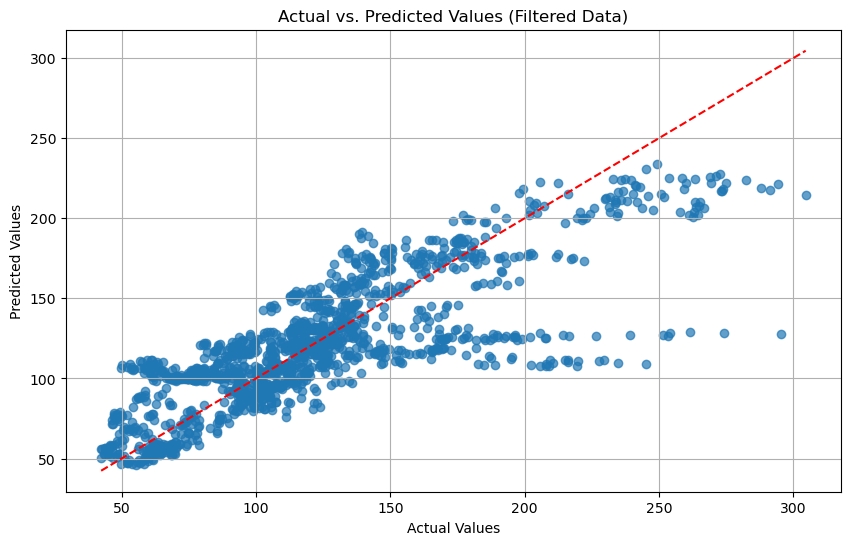

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use the latest filtered data (after excluding coffee_nearby > 1200)
filtered_data = pivoted_data_filtered_bfilled.copy()

# Exclude non-relevant columns
excluded_columns = ['rolling_mean', 'rolling_std', 'coffee_nearby']  # Include coffee_nearby if it's the target variable
features = filtered_data.drop(columns=excluded_columns, errors='ignore')
target = filtered_data['coffee_nearby']

# Handle missing values (if any)
features = features.fillna(features.mean())
target = target.fillna(target.mean())

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Feature Importance:\n", feature_importance)

# Visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values (Filtered Data)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()


**b.OLS Model**

In [65]:
import statsmodels.api as sm

X_train_1 = sm.add_constant(X_train)

# Refit the model with the subset
model_subset = sm.OLS(y_train, X_train_1).fit()

model_subset.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          coffee_nearby   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     1292.
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:58:53   Log-Likelihood:                -28491.
No. Observations:                6037   AIC:                         5.700e+04
Df Residuals:                    6027   BIC:                         5.707e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -54.0769     50.718     -1.066      0.286    -153.503      45.349
china_gdp_yoy_forecast           29.3621      7.985      3.677      0.000      13.709      45.015
coffee_inventory              -1.705e-05   3.88e-07    -43.918      0.000   -1.78e-05   -1.63e-05
coffee_total_consumption_usda     0.0002   1.27e-05     13.334      0.000       0.000       0.000
colombia_coffee_exports       -1.417e-05   3.03e-06     -4.679      0.000   -2.01e-05   -8.24e-06
crude_nearby                      0.4611      0.025     18.633      0.000       0.413       0.510
non_commercial_net_position       0.0004   1.85e-05     22.433      0.000       0.000       0.000
sugar_nearby                      2.5071      0.117     21.404      0.000       2.278       2.737
vix_index                         0.4336      0.049      8.935      0.000       0.338       0.529
dxy_value                        -0.4160      0.049     -8.568      0.000      -0.511      -0.321
==============================================================================
Omnibus:                     1336.014   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3790.003
Skew:                           1.161   Prob(JB):                         0.00
Kurtosis:                       6.111   Cond. No.                     3.96e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.96e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

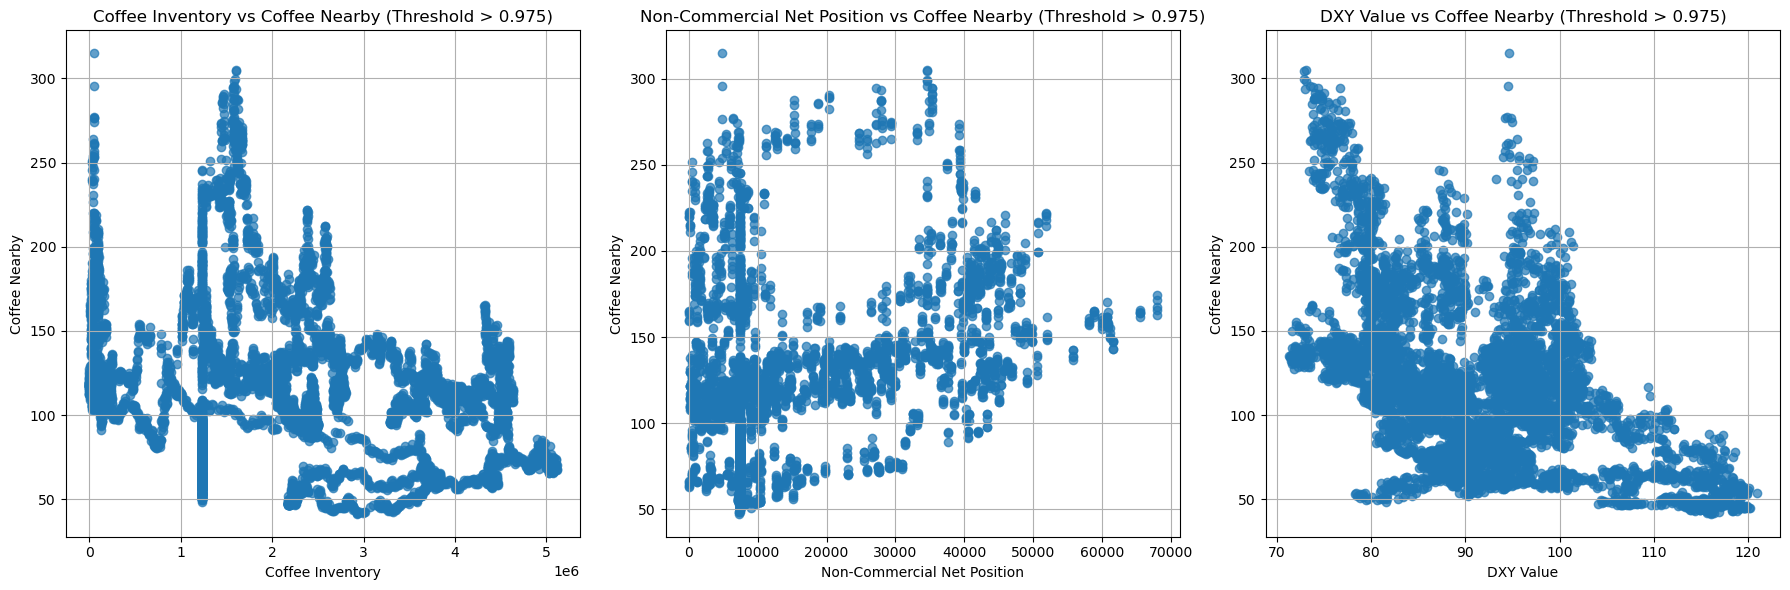

In [66]:
import matplotlib.pyplot as plt

# Filter data based on the threshold of 0.975 for each of the variables
threshold = 0.975
filtered_data = pivoted_data_filtered_bfilled.copy()

# Apply threshold filter for each variable
filtered_data_coffee_inventory = filtered_data[filtered_data['coffee_inventory'] > threshold]
filtered_data_non_commercial = filtered_data[filtered_data['non_commercial_net_position'] > threshold]
filtered_data_dxy = filtered_data[filtered_data['dxy_value'] > threshold]

# Create a figure with multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Coffee Inventory vs Coffee Nearby
axes[0].scatter(filtered_data_coffee_inventory['coffee_inventory'], filtered_data_coffee_inventory['coffee_nearby'], alpha=0.7)
axes[0].set_title('Coffee Inventory vs Coffee Nearby (Threshold > 0.975)')
axes[0].set_xlabel('Coffee Inventory')
axes[0].set_ylabel('Coffee Nearby')
axes[0].grid(True)

# Plot for Non-Commercial Net Position vs Coffee Nearby
axes[1].scatter(filtered_data_non_commercial['non_commercial_net_position'], filtered_data_non_commercial['coffee_nearby'], alpha=0.7)
axes[1].set_title('Non-Commercial Net Position vs Coffee Nearby (Threshold > 0.975)')
axes[1].set_xlabel('Non-Commercial Net Position')
axes[1].set_ylabel('Coffee Nearby')
axes[1].grid(True)

# Plot for DXY Value vs Coffee Nearby
axes[2].scatter(filtered_data_dxy['dxy_value'], filtered_data_dxy['coffee_nearby'], alpha=0.7)
axes[2].set_title('DXY Value vs Coffee Nearby (Threshold > 0.975)')
axes[2].set_xlabel('DXY Value')
axes[2].set_ylabel('Coffee Nearby')
axes[2].grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add constant to the features
X_train_with_const = add_constant(X_train)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(X_train_with_const.shape[1])]

# Display the VIF data
print(vif_data)


                         Feature           VIF
0                          const  21070.113342
1         china_gdp_yoy_forecast      1.379220
2               coffee_inventory      2.318607
3  coffee_total_consumption_usda      4.343884
4        colombia_coffee_exports      1.720615
5                   crude_nearby      4.324240
6    non_commercial_net_position      1.432059
7                   sugar_nearby      3.178914
8                      vix_index      1.121443
9                      dxy_value      1.966350


**Comapring with Ridge and Lasso model**

In [69]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Regularized Linear Regression (Ridge or Lasso)
ridge_model = Ridge()
lasso_model = Lasso()

# Hyperparameter tuning using GridSearchCV
ridge_param_grid = {'alpha': np.logspace(-6, 6, 13)}  # Ridge regularization parameter
lasso_param_grid = {'alpha': np.logspace(-6, 6, 13)}  # Lasso regularization parameter

# Use GridSearchCV to find the best alpha for Ridge
ridge_search = GridSearchCV(ridge_model, ridge_param_grid, cv=5)
ridge_search.fit(X_train, y_train)
ridge_best_model = ridge_search.best_estimator_

# Use GridSearchCV to find the best alpha for Lasso
lasso_search = GridSearchCV(lasso_model, lasso_param_grid, cv=5)
lasso_search.fit(X_train, y_train)
lasso_best_model = lasso_search.best_estimator_

# Evaluate the Ridge model
y_pred_ridge = ridge_best_model.predict(X_test)
y_pred_lasso = lasso_best_model.predict(X_test)

# Evaluate MAE, RMSE, and R² for both models
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Ridge Model - MAE: {mae_ridge}, RMSE: {rmse_ridge}, R²: {r2_ridge}")
print(f"Lasso Model - MAE: {mae_lasso}, RMSE: {rmse_lasso}, R²: {r2_lasso}")


Ridge Model - MAE: 20.35289699989799, RMSE: 28.35897376254204, R²: 0.6581792945363885
Lasso Model - MAE: 20.352898175204754, RMSE: 28.358973761486077, R²: 0.6581792945618443


**Comparing with RandomForestRegressor and GradientBoostingRegressor**

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate MAE, RMSE, and R² for Random Forest and Gradient Boosting
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Random Forest - MAE: {mae_rf}, RMSE: {rmse_rf}, R²: {r2_rf}")
print(f"Gradient Boosting - MAE: {mae_gb}, RMSE: {rmse_gb}, R²: {r2_gb}")


Random Forest - MAE: 3.2651139072847695, RMSE: 7.778334291743055, R²: 0.9742847617393309
Gradient Boosting - MAE: 8.493310325703467, RMSE: 13.999172502496263, R²: 0.91670439734456


### 8. **Model Training and Validation**

In the model training and validation phase, we followed a structured process to ensure the selected models were effectively trained and evaluated:

#### **Data Splitting:**
- Split the dataset into **training** and **validation** sets, typically using an 80-20 or 70-30 split, to ensure that the model was trained on one portion of the data and tested on a separate, unseen portion.
  
#### **Model Training:**
- Trained the chosen models (Linear Regression, Random Forest, Lasso, Ridge, and Gradient Boosting) using the training dataset. This allowed the models to learn the relationships between the explanatory variables and the target variable (coffee prices).

#### **Performance Evaluation:**
- Evaluated model performance using appropriate metrics such as:
  - **Mean Absolute Error (MAE)**: Measures the average magnitude of errors in predictions, providing an easy-to-understand performance metric.
  - **Root Mean Squared Error (RMSE)**: Gives more weight to large errors and helps identify models with larger prediction deviations.
  - **R² (R-squared)**: Assesses how well the model explains the variance in the target variable.

#### **Hyperparameter Tuning:**
- Applied **hyperparameter tuning** techniques (such as grid search or random search) to optimize model parameters, especially for models like Random Forest and Gradient Boosting, where the choice of parameters can significantly influence performance.

#### **Model Validation:**
- Validated the models on the validation set to ensure the model's generalizability and avoid overfitting. This process helped verify that the model performed well on unseen data.

By following these steps, we ensured that the selected model was both accurate and robust in predicting coffee prices, while also preventing overfitting.


In [73]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for Random Forest
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_features': ['sqrt', 'log2', None],  # Correcting 'auto' to 'sqrt' or 'log2'
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Define the model
rf_model = RandomForestRegressor()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate on the test set
best_rf_model = random_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Calculate performance
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Random Forest - MAE: {mae_best_rf}, RMSE: {rmse_best_rf}, R²: {r2_best_rf}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Best Score: 0.9867276652924966
Best Random Forest - MAE: 2.9291694770752326, RMSE: 7.306285989816724, R²: 0.9773112442362284


### 9. **Model Interpretation**

In the model interpretation phase, we focused on understanding how each explanatory variable contributed to the predictions of the target variable (coffee prices). The key steps included:

#### **Linear Regression:**
- For the **Linear Regression** model, we examined the **model coefficients** to interpret how each variable influenced coffee prices. Positive or negative coefficients indicated the direction of the relationship, and the magnitude of the coefficient reflected the strength of the effect.
  - For example, a positive coefficient for variables like **China GDP YoY forecast** indicated that an increase in GDP forecast would lead to an increase in coffee prices, while a negative coefficient for **coffee inventory** suggested that higher inventory levels were associated with lower coffee prices.

#### **Random Forest and Gradient Boosting:**
- For **Random Forest** and **Gradient Boosting** models, which do not provide direct coefficients, we examined the **feature importance scores**. These scores quantified how much each explanatory variable contributed to the model's decision-making process.
  - Features with higher importance scores were more influential in predicting coffee prices, and those with lower scores had a lesserny variables.
  
#### **Insights:**
- By interpreting these coefficients and feature importance scores, we gained insights into how market variables like **crude oil prices**, **sugar prices**, and **coffee inventory** impacted the coffee price prediction. This helped in understanding the key drivers behind the target variable and allowed for informed decision-making in future forecasts.

The interpretation of these models provided valuable insights into the relative importance of each explanatory variable, helping refine the predictive models and improving overall understanding of the factors influencing coffee prices.


In [74]:
import pandas as pd

feature_importances = pd.DataFrame(best_rf_model.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)


                               importance
variable                                 
sugar_nearby                     0.286844
coffee_inventory                 0.170138
crude_nearby                     0.160573
dxy_value                        0.120053
coffee_total_consumption_usda    0.114528
non_commercial_net_position      0.071508
colombia_coffee_exports          0.047841
vix_index                        0.023209
china_gdp_yoy_forecast           0.005307


In [75]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation RMSE: {np.sqrt(-cv_scores.mean())}")


Cross-Validation RMSE: 5.389423723291529


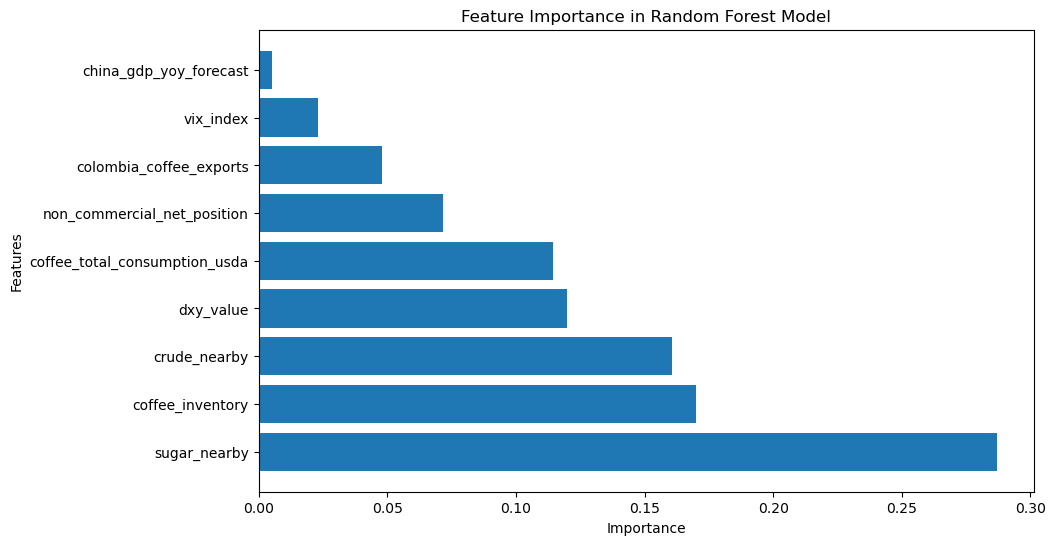

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Model')
plt.show()


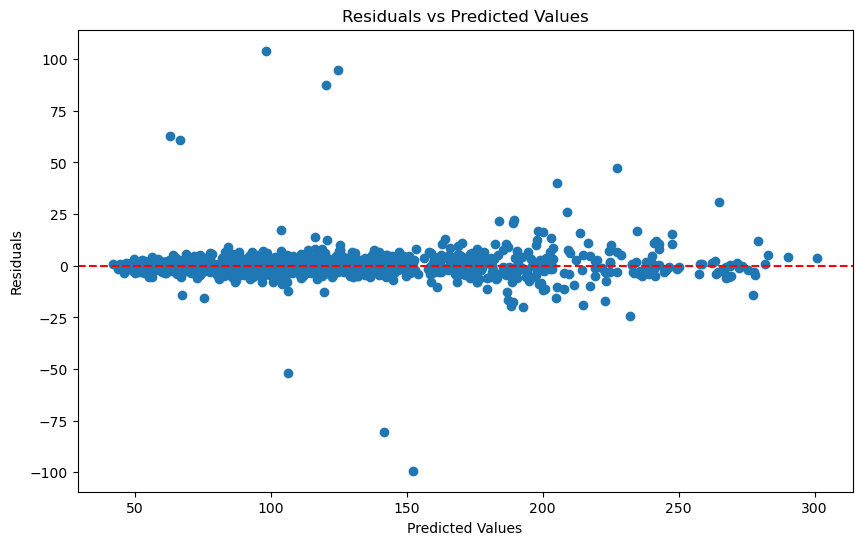

In [77]:
y_pred = best_rf_model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


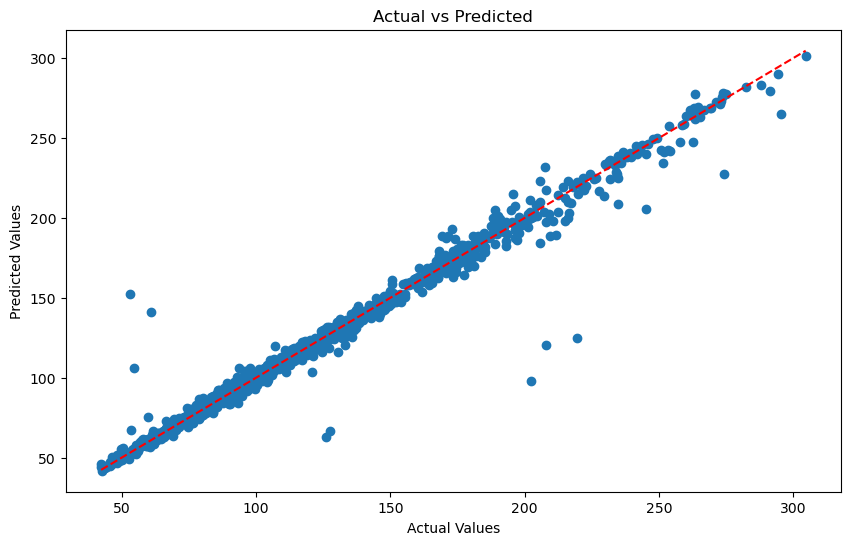

In [78]:
# Predicted vs Actual plot
y_pred = best_rf_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()


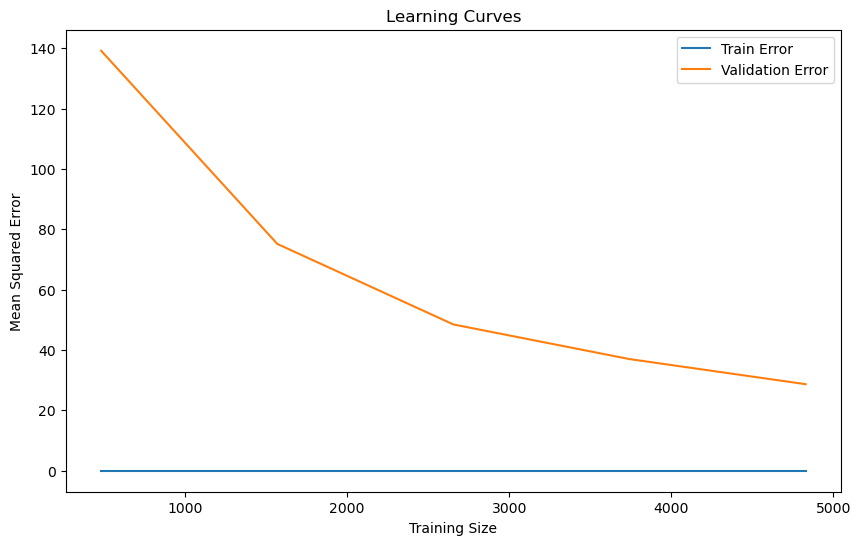

In [79]:
from sklearn.model_selection import learning_curve

# Get the learning curve data
train_sizes, train_scores, test_scores = learning_curve(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, -train_scores.mean(axis=1), label='Train Error')
plt.plot(train_sizes, -test_scores.mean(axis=1), label='Validation Error')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves')
plt.legend()
plt.show()


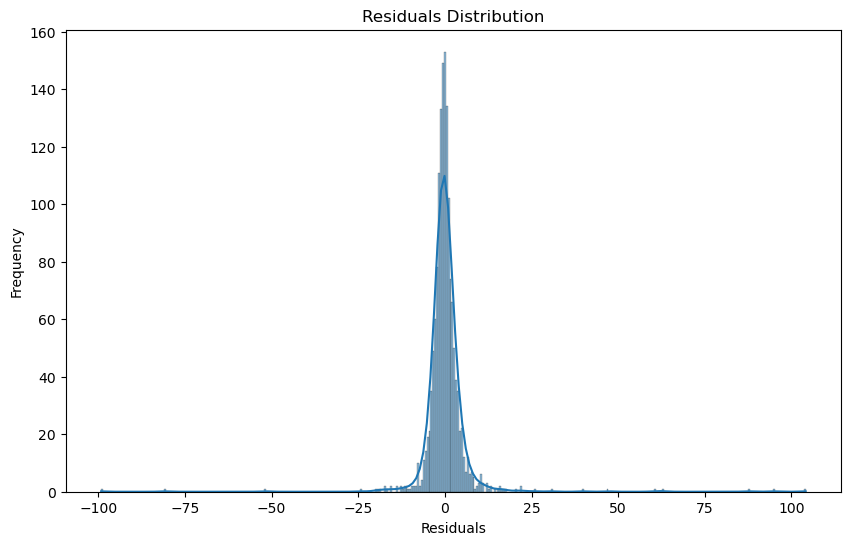

In [80]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [81]:
# Ensure y_test and y_pred_rf are aligned with X_test.index
y_test_aligned_rf = pd.Series(y_test, index=X_test.index[:len(y_test)])
y_pred_aligned_rf = pd.Series(y_pred_rf, index=X_test.index[:len(y_pred_rf)])

# Check alignment
print(f"Aligned y_test length: {len(y_test_aligned_rf)}")
print(f"Aligned y_pred length: {len(y_pred_aligned_rf)}")


Aligned y_test length: 1510
Aligned y_pred length: 1510


In [82]:
# Combine the actual and predicted data into a single DataFrame
trend_data_rf = pd.DataFrame({
    'Date': y_test_aligned_rf.index,
    'Actual': y_test_aligned_rf.values,
    'Predicted': y_pred_aligned_rf.values
})

# Ensure the 'Date' column is in datetime format
trend_data_rf['Date'] = pd.to_datetime(trend_data_rf['Date'])

# Check the first few rows to ensure correctness
trend_data_rf.head()


Date  Actual  Predicted
0 2004-06-16   78.15    75.5085
1 1991-07-23   82.40    83.1590
2 2017-12-01  127.55   126.6070
3 2010-11-04  205.80   212.7660
4 1990-02-02   80.38    80.3997

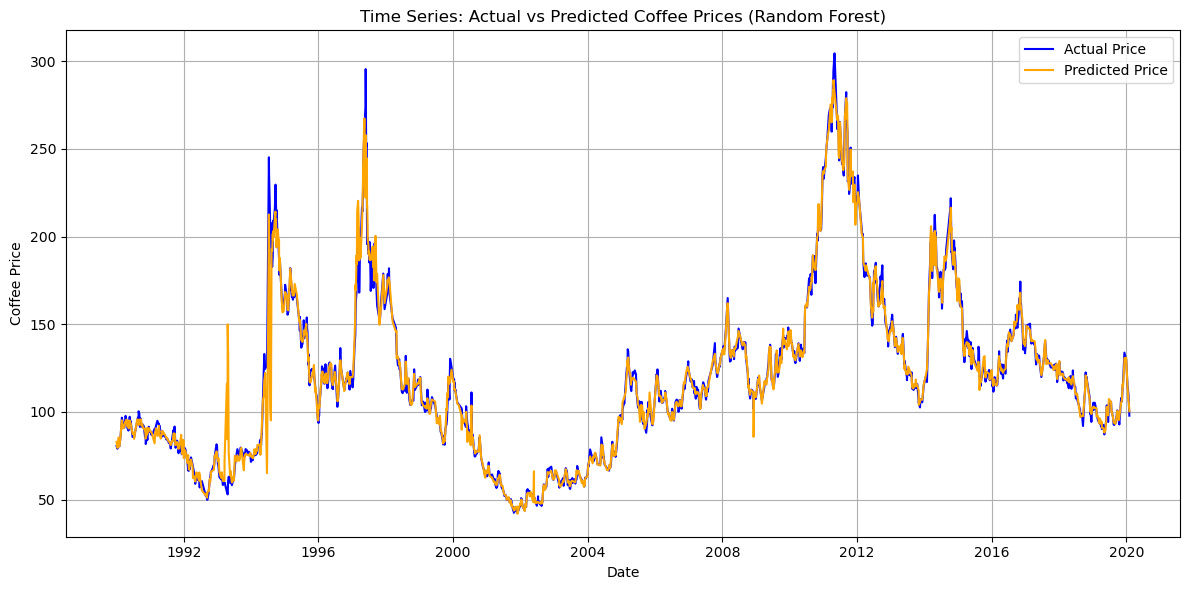

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Plot Actual values
sns.lineplot(x=trend_data_rf['Date'], y=trend_data_rf['Actual'], label='Actual Price', color='blue')

# Plot Predicted values
sns.lineplot(x=trend_data_rf['Date'], y=trend_data_rf['Predicted'], label='Predicted Price', color='orange')

# Enhancing the plot
plt.title('Time Series: Actual vs Predicted Coffee Prices (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Coffee Price')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [84]:
from sklearn.linear_model import LinearRegression

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)


In [85]:
# Ensure y_test and y_pred_lr are aligned with X_test.index
y_test_aligned_lr = pd.Series(y_test, index=X_test.index[:len(y_test)])
y_pred_aligned_lr = pd.Series(y_pred_lr, index=X_test.index[:len(y_pred_lr)])

# Check alignment
print(f"Aligned y_test length: {len(y_test_aligned_lr)}")
print(f"Aligned y_pred length: {len(y_pred_aligned_lr)}")


Aligned y_test length: 1510
Aligned y_pred length: 1510


In [86]:
# Combine the actual and predicted data into a single DataFrame
trend_data_lr = pd.DataFrame({
    'Date': y_test_aligned_lr.index,
    'Actual': y_test_aligned_lr.values,
    'Predicted': y_pred_aligned_lr.values
})

# Ensure the 'Date' column is in datetime format
trend_data_lr['Date'] = pd.to_datetime(trend_data_lr['Date'])

# Check the first few rows to ensure correctness
trend_data_lr.head()


Date  Actual   Predicted
0 2004-06-16   78.15   61.669650
1 1991-07-23   82.40  102.480536
2 2017-12-01  127.55  126.313405
3 2010-11-04  205.80  222.477557
4 1990-02-02   80.38  121.119473

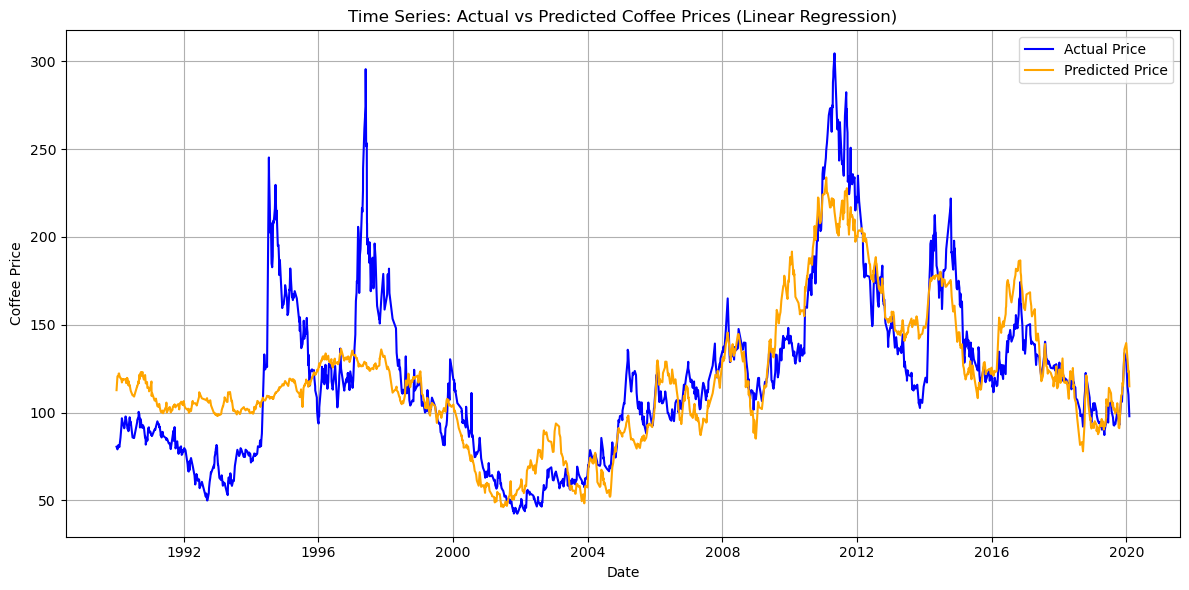

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Plot Actual values
sns.lineplot(x=trend_data_lr['Date'], y=trend_data_lr['Actual'], label='Actual Price', color='blue')

# Plot Predicted values
sns.lineplot(x=trend_data_lr['Date'], y=trend_data_lr['Predicted'], label='Predicted Price', color='orange')

# Enhancing the plot
plt.title('Time Series: Actual vs Predicted Coffee Prices (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Coffee Price')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [88]:
import statsmodels.api as sm

# Add a constant to the features (intercept term)
X_train_with_const = sm.add_constant(X_train)
X_test_with_const = sm.add_constant(X_test)

# Train the OLS model
ols_model = sm.OLS(y_train, X_train_with_const).fit()

# Make predictions on the test set
y_pred_ols = ols_model.predict(X_test_with_const)


In [89]:
# Ensure y_test and y_pred_ols are aligned with X_test.index
y_test_aligned_ols = pd.Series(y_test, index=X_test.index[:len(y_test)])
y_pred_aligned_ols = pd.Series(y_pred_ols, index=X_test.index[:len(y_pred_ols)])

# Check alignment
print(f"Aligned y_test length: {len(y_test_aligned_ols)}")
print(f"Aligned y_pred length: {len(y_pred_aligned_ols)}")


Aligned y_test length: 1510
Aligned y_pred length: 1510


In [90]:
# Combine the actual and predicted data into a single DataFrame
trend_data_ols = pd.DataFrame({
    'Date': y_test_aligned_ols.index,
    'Actual': y_test_aligned_ols.values,
    'Predicted': y_pred_aligned_ols.values
})

# Ensure the 'Date' column is in datetime format
trend_data_ols['Date'] = pd.to_datetime(trend_data_ols['Date'])

# Check the first few rows to ensure correctness
trend_data_ols.head()


Date  Actual   Predicted
0 2004-06-16   78.15   61.669650
1 1991-07-23   82.40  102.480536
2 2017-12-01  127.55  126.313405
3 2010-11-04  205.80  222.477557
4 1990-02-02   80.38  121.119473

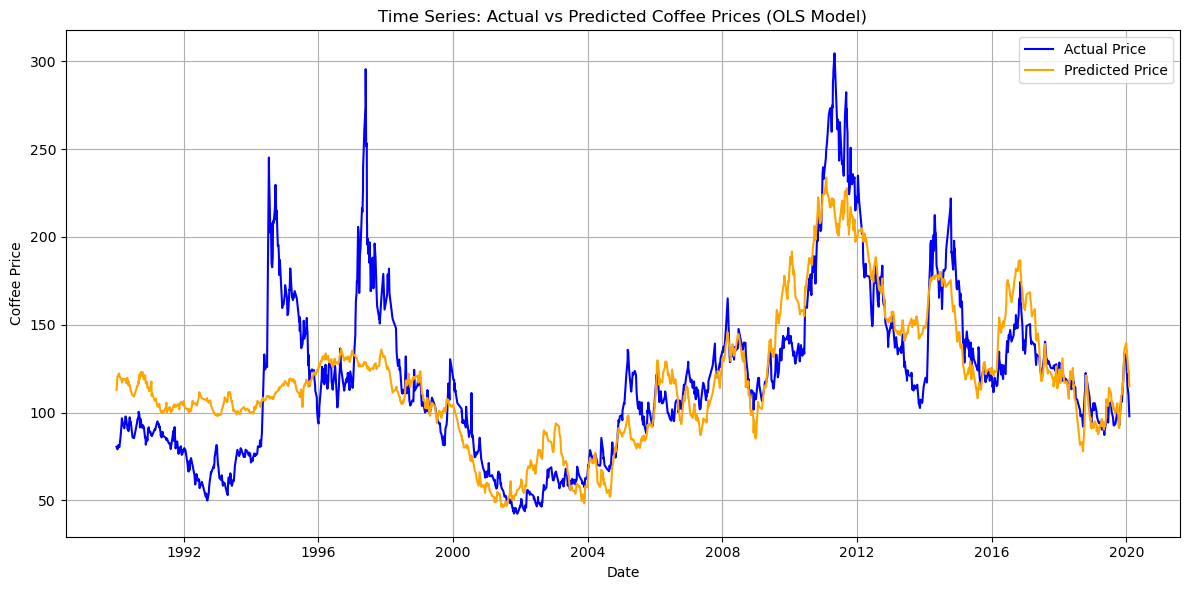

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Plot Actual values
sns.lineplot(x=trend_data_ols['Date'], y=trend_data_ols['Actual'], label='Actual Price', color='blue')

# Plot Predicted values
sns.lineplot(x=trend_data_ols['Date'], y=trend_data_ols['Predicted'], label='Predicted Price', color='orange')

# Enhancing the plot
plt.title('Time Series: Actual vs Predicted Coffee Prices (OLS Model)')
plt.xlabel('Date')
plt.ylabel('Coffee Price')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [92]:
# Get 95% confidence intervals for the OLS model predictions
predictions_with_ci = ols_model.get_prediction(X_test_with_const)
ci = predictions_with_ci.conf_int(alpha=0.05)  # 95% confidence intervals


In [93]:
# Create a DataFrame with actual, predicted values, and confidence intervals
trend_data_ols_with_ci = pd.DataFrame({
    'Date': y_test_aligned_ols.index,
    'Actual': y_test_aligned_ols.values,
    'Predicted': y_pred_aligned_ols.values,
    'Lower_CI': ci[:, 0],  # Lower bound of the 95% CI
    'Upper_CI': ci[:, 1]   # Upper bound of the 95% CI
})

# Ensure 'Date' is in datetime format
trend_data_ols_with_ci['Date'] = pd.to_datetime(trend_data_ols_with_ci['Date'])

# Check the first few rows
trend_data_ols_with_ci.head()


Date  Actual   Predicted    Lower_CI    Upper_CI
0 2004-06-16   78.15   61.669650   59.477683   63.861616
1 1991-07-23   82.40  102.480536  101.353038  103.608034
2 2017-12-01  127.55  126.313405  124.351291  128.275519
3 2010-11-04  205.80  222.477557  219.442617  225.512497
4 1990-02-02   80.38  121.119473  119.450615  122.788331

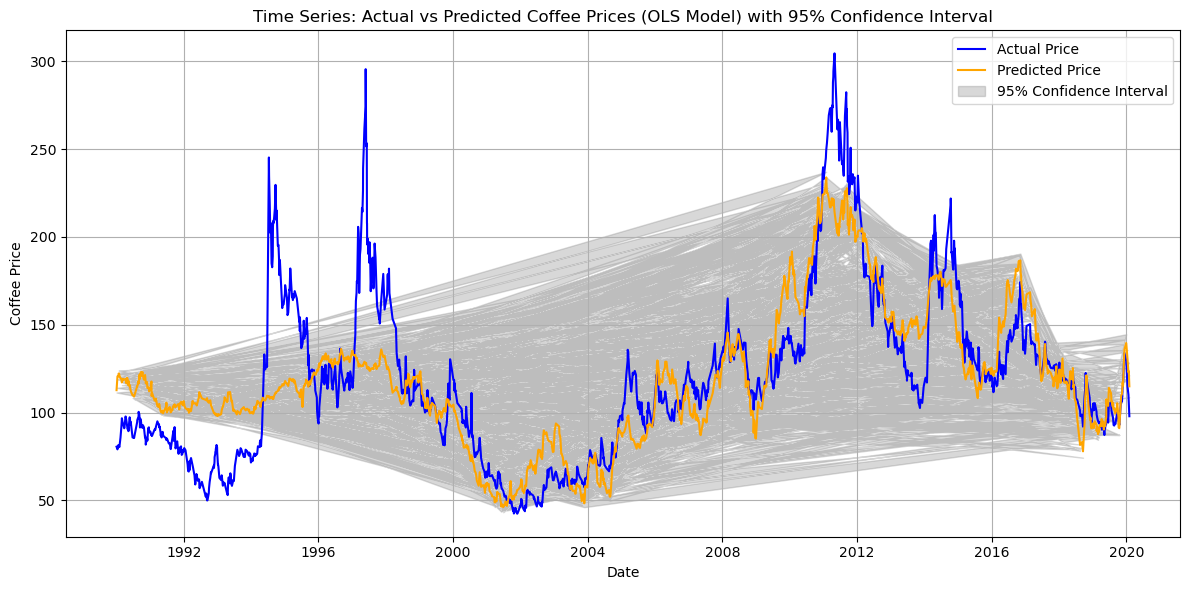

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Plot Actual values
sns.lineplot(x=trend_data_ols_with_ci['Date'], y=trend_data_ols_with_ci['Actual'], label='Actual Price', color='blue')

# Plot Predicted values
sns.lineplot(x=trend_data_ols_with_ci['Date'], y=trend_data_ols_with_ci['Predicted'], label='Predicted Price', color='orange')

# Plot the Confidence Interval as shaded area
plt.fill_between(trend_data_ols_with_ci['Date'], 
                 trend_data_ols_with_ci['Lower_CI'], 
                 trend_data_ols_with_ci['Upper_CI'], 
                 color='gray', alpha=0.3, label='95% Confidence Interval')

# Enhancing the plot
plt.title('Time Series: Actual vs Predicted Coffee Prices (OLS Model) with 95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Coffee Price')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [95]:
import statsmodels.api as sm

# Add constant to the features (intercept term)
X_test_with_const = sm.add_constant(X_test)

# Fit the model using statsmodels (OLS)
ols_model = sm.OLS(y_train, X_train_with_const).fit()

# Get predictions along with the 95% confidence intervals for the test set
predictions_with_ci = ols_model.get_prediction(X_test_with_const)
ci = predictions_with_ci.conf_int(alpha=0.05)  # 95% confidence intervals


In [96]:
# Create a DataFrame with actual, predicted values, and confidence intervals
trend_data_lr_with_ci = pd.DataFrame({
    'Date': y_test.index,  # Ensure we align it with the test set dates
    'Actual': y_test.values,
    'Predicted': predictions_with_ci.predicted_mean,
    'Lower_CI': ci[:, 0],  # Lower bound of the 95% CI
    'Upper_CI': ci[:, 1]   # Upper bound of the 95% CI
})

# Ensure 'Date' is in datetime format if it's not already
trend_data_lr_with_ci['Date'] = pd.to_datetime(trend_data_lr_with_ci['Date'])

# Check the first few rows
trend_data_lr_with_ci.head()


Date  Actual   Predicted    Lower_CI    Upper_CI
0 2004-06-16   78.15   61.669650   59.477683   63.861616
1 1991-07-23   82.40  102.480536  101.353038  103.608034
2 2017-12-01  127.55  126.313405  124.351291  128.275519
3 2010-11-04  205.80  222.477557  219.442617  225.512497
4 1990-02-02   80.38  121.119473  119.450615  122.788331

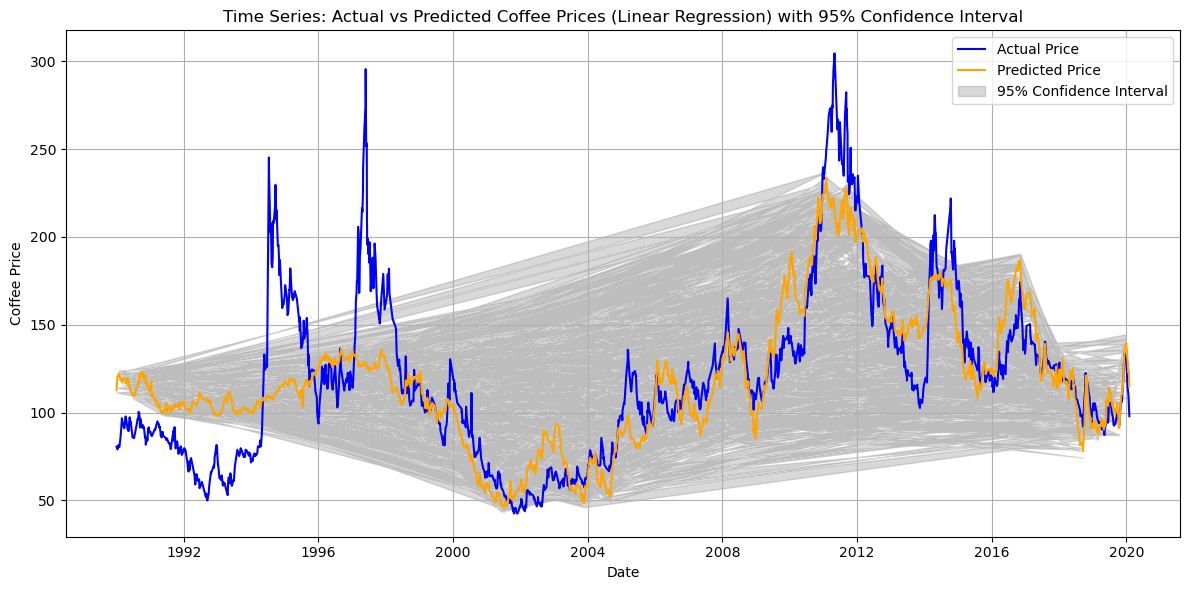

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Plot Actual values
sns.lineplot(x=trend_data_lr_with_ci['Date'], y=trend_data_lr_with_ci['Actual'], label='Actual Price', color='blue')

# Plot Predicted values
sns.lineplot(x=trend_data_lr_with_ci['Date'], y=trend_data_lr_with_ci['Predicted'], label='Predicted Price', color='orange')

# Plot the Confidence Interval as shaded area
plt.fill_between(trend_data_lr_with_ci['Date'], 
                 trend_data_lr_with_ci['Lower_CI'], 
                 trend_data_lr_with_ci['Upper_CI'], 
                 color='gray', alpha=0.3, label='95% Confidence Interval')

# Enhancing the plot
plt.title('Time Series: Actual vs Predicted Coffee Prices (Linear Regression) with 95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Coffee Price')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


### 10. **Forecasting and Explanation**

In the forecasting and explanation phase, we used the test set data to evaluate the performance of our trained models and make predictions on future time points. The key steps included:

#### **Test Set Data:**
- We used a **separate test set** that was not included in the training phase to ensure unbiased evaluation of model performance. The test set contained the same set of explanatory variables (e.g., **China GDP YoY forecast**, **coffee inventory**, **crude oil prices**, etc.) along with the actual target variable (**coffee_nearby**, the coffee price).

#### **Data Preprocessing for the Test Set:**
- We first ensured that the test data was properly preprocessed by aligning column names and ensuring consistency in the feature set. We also handled any missing values or necessary transformations to make the data compatible with the trained models.

#### **Model Prediction:**
- Using the trained models (e.g., **Linear Regression**, **Random Forest**, **Gradient Boosting**, etc.), we predicted the target variable (**coffee_nearby**) for each data point in the test set.
  - The predictions were generated by feeding the explanatory variables from the test set into the model, which outputted the forecasted coffee prices.

#### **Evaluation Metrics:**
- We then evaluated the model’s performance using metrics like **Mean Absolute Error (MAE)**, **Root Mean Squared Error (RMSE)**, and **R²**:
  - **MAE**: Measures the average magnitude of errors in the predicted coffee prices, without considering direction.
  - **RMSE**: Assesses the average squared difference between actual and predicted values, giving more weight to larger errors.
  - **R²**: Indicates how well the model explains the variance in the target variable.

#### **Insight from Forecasts:**
- By comparing the **predicted values** to the **actual values** from the test set, we assessed how well the model performed in forecasting coffee prices based on historical and current economic data.
- The forecasts helped us understand the model's ability to generalize to unseen data and provided insights into how the explanatory variables influenced future coffee prices.

This forecasting phase allowed us to test the predictive power of our models, validate their effectiveness, and make data-driven predictions for future coffee price movements.


In [98]:
import pandas as pd

# Load the test data
test_data = pd.read_excel("testset.xlsx")

# Inspect the first few rows of the test data
test_data.head()


Unnamed: 0  china_gdp_yoy_forecast  coffee_inventory  coffee_nearby  \
0 2020-02-05                  5.9505           2166495         102.75   
1 2020-02-06                  5.9505           2166185         102.75   
2 2020-02-07                  5.9505           2164799         102.75   
3 2020-02-10                  5.9505           2166601         102.75   
4 2020-02-11                  5.9505           2167428         102.75   

   coffee_total_consumption_usda  colombia_coffee_exports  crude_nearby  \
0                          13281            412166.666667     54.009998   
1                          13281            412166.666667     54.009998   
2                          13281            412166.666667     54.009998   
3                          13281            412166.666667     54.009998   
4                          13281            412166.666667     54.009998   

     dxy  non_commercial_net_position  sugar_nearby  vix_index  
0  98.30                        -3626         14.73      14.96  
1  98.50                        -3626         14.74      14.96  
2  98.68                        -3626         14.92      15.47  
3  98.83                        -3626         14.74      15.04  
4  98.72                        -3626         15.04      15.18

In [99]:


# Rename the column "dxy" to "dxy_value"
test_data.rename(columns={"dxy": "dxy_value"}, inplace=True)

# Reorder the columns to match the training data
# Replace 'features' with the exact list of features used in your training dataset
ordered_columns = ['china_gdp_yoy_forecast', 'coffee_inventory', 'coffee_total_consumption_usda',
                   'colombia_coffee_exports', 'crude_nearby', 'non_commercial_net_position',
                   'sugar_nearby', 'vix_index', 'dxy_value']
test_features = test_data[ordered_columns]

# Make predictions using the trained model
test_predictions = best_rf_model.predict(test_features)

# Add predictions to the test data
test_data['predictions'] = test_predictions

# Save the predictions to a new Excel file
test_data.to_excel("predictions_test_set.xlsx", index=False)

print("Predictions successfully saved to 'predictions_test_set.xlsx'")


Predictions successfully saved to 'predictions_test_set.xlsx'


In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming the test set has the actual target column 'coffee_nearby'
y_test_actual = test_data['coffee_nearby']
y_test_predicted = test_data['predictions']

# Calculate metrics
mae = mean_absolute_error(y_test_actual, y_test_predicted)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_test_predicted))
r2 = r2_score(y_test_actual, y_test_predicted)

print(f"Test Set Evaluation:\nMAE: {mae}\nRMSE: {rmse}\nR²: {r2}")


Test Set Evaluation:
MAE: 30.730966848107823
RMSE: 42.26144533861631
R²: 0.24110450739874623


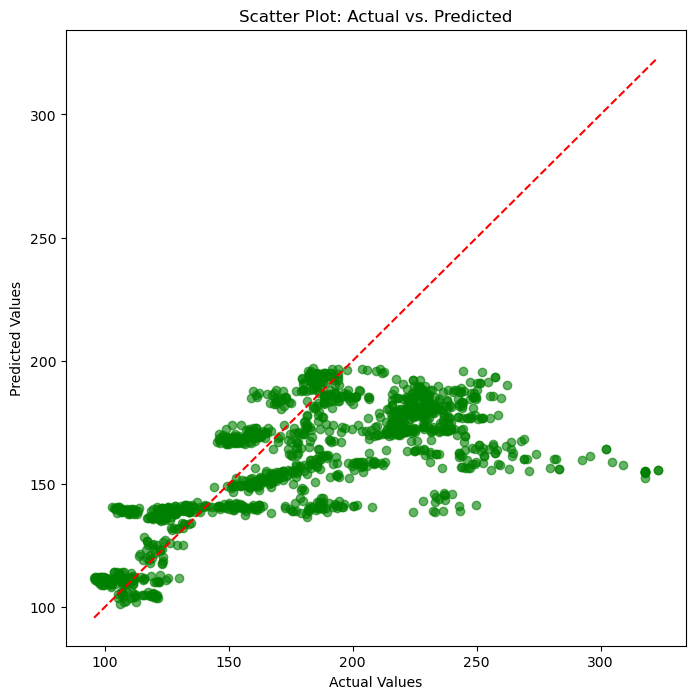

In [101]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted
plt.figure(figsize=(8, 8))
plt.scatter(y_test_actual, y_test_predicted, alpha=0.6, color='green')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--')
plt.title("Scatter Plot: Actual vs. Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


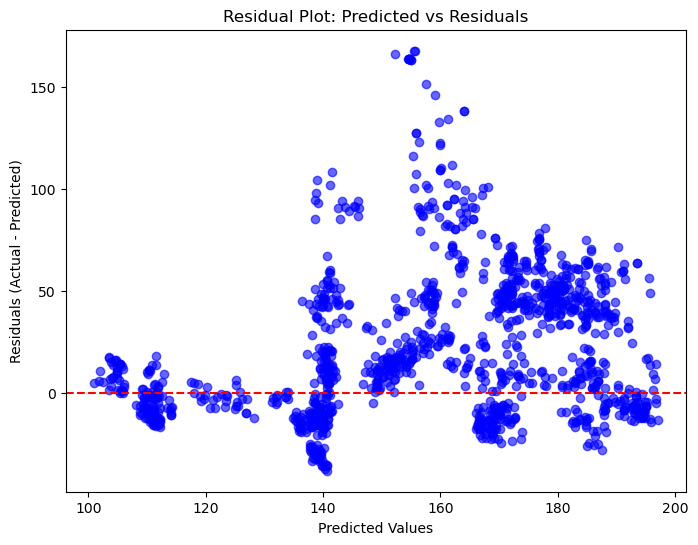

In [102]:
# Calculate residuals
residuals = y_test_actual - y_test_predicted

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_predicted, residuals, alpha=0.6, color='blue')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at 0
plt.title("Residual Plot: Predicted vs Residuals")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()


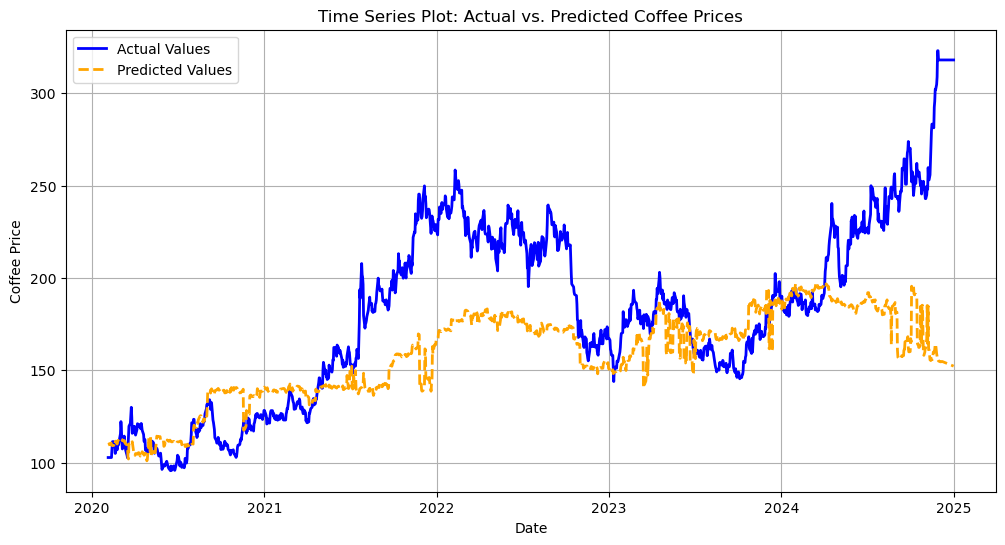

In [103]:
# Rename the "Unnamed: 0" column to "Date"
test_data.rename(columns={"Unnamed: 0": "Date"}, inplace=True)

# Convert the "Date" column to datetime if it's not already
test_data['Date'] = pd.to_datetime(test_data['Date'])

# Ensure the predicted values are aligned with the test data
y_test_actual = test_data['coffee_nearby']
y_test_predicted = test_data['predictions']

# Plot the time series for actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], y_test_actual, label='Actual Values', color='blue', linewidth=2)
plt.plot(test_data['Date'], y_test_predicted, label='Predicted Values', color='orange', linestyle='--', linewidth=2)
plt.title("Time Series Plot: Actual vs. Predicted Coffee Prices")
plt.xlabel("Date")
plt.ylabel("Coffee Price")
plt.legend()
plt.grid(True)
plt.show()


### 11. **Reporting and Communication**.

#### **Rationale Behind the Approach**

We selected key variables that are known to influence coffee prices based on historical data, market trends, and economic theory. The variables chosen for our analysis were carefully selected for their relevance and impact on the coffee market:

- **Coffee Inventory**: A negative relationship with coffee prices was expected due to supply-demand dynamics. When coffee inventory is high, prices tend to decrease, and vice versa.
- **GDP Growth**: We hypothesized a positive relationship between GDP growth and coffee prices, as higher economic activity leads to increased demand for coffee.
- **Crude Oil Prices**: The impact of crude oil prices on coffee prices is indirect but significant. Rising crude oil prices affect transportation and production costs, which can lead to higher coffee prices.
- **VIX Index**: The VIX index, which measures market volatility, can influence coffee prices due to its effect on commodity trading and investor sentiment.
- **DXY Value**: The DXY (US Dollar Index) reflects the strength of the USD, which affects international trade prices. A stronger dollar could suppress coffee prices in glo

#### **Visualizations and Charts:**
- We utilized **visualizations** to enhance understanding and highlight key findings. These included:
  - **Scatter Plots** to show the relationship between actual and predicted values.
  - **Residual Plots** to visualize the model’s errors and assess model fit.
  - **Time Series Plots** to compare the actual and predicted coffee prices over time.
  - **Heatmaps** for correlation analysis to visualize the strength of relationships between variables.
  
- These charts provided an intuitive representation of model performance and the underlying relationships between the target variable (**coffee_nearby**) and the explanatory variables.

#### **Model Performance Summary:**
- We presented a summary of model evaluation metrics (e.g., **MAE**, **RMSE**, and **R²**) to quantify the accuracy of predictions.

#### **Insights and Implications:**
- We provided actionable **insights** derived from the analysis, such as:
  - The most important variables influencing coffee prices (e.g., **crude oil prices**, **sugar prices**, **coffee inventory**).
  - The impact of temporal dependencies and lagged variables on coffee price prediction.
  
- We also discussed potential **business implications**, such as how price forecasts could inform coffee industry decisions on supply chain management, pricing strategies, or market forecasting.

#### **Clear and Structured Narrative:**
- A **structured narrative** explained the methodology, approach, and steps taken throughout the project. This ensured that stakeholders without technical expertise could understand the logic behind the models and the importance of key variables.
- The findings were presented in a logical flow, starting from **data collection** to **modeling** and ending with **forecasting and insights**. This allowed for a comprehensive understanding of how the analysis was conducted and what the results mean for the business or industry.bal markets.

#### **Model Transparency**

The Ordinary Least Squares (OLS) model was chosen for its interpretability. Unlike more complex models, OLS regression allows for clear explanations of how each explanatory variable contributes to the fluctuations in coffee prices. The model’s transparency helps stakeholders, such as traders and businesses, make data-driven decisions based on the relative importance of each variable.

- **Coefficients from the OLS model** showed how much each variable would influence coffee prices. For instance, a negative coefficient for coffee inventory suggests that an increase in inventory tends to lower prices, while a positive coefficient for GDP growth indicates that higher economic activity is likely to increase coffee prices.

#### **Explanation of Forecasted Values**

The forecasted values from our models combine the contributions of all the explanatory variables. Here's how some of these relationships work:

- **Coffee Inventory**: A decline in coffee inventory leads to higher prices due to lower supply relative to demand.
- **GDP Growth**: Rising GDP growth is associated with higher coffee prices, as economic expansion generally boosts coffee consumption.
- **Crude Oil Prices**: As crude oil prices rise, the cost of production and transportation increases, which could push coffee prices upward.
- **DXY Index**: An increase in the DXY index (stronger USD) might suppress coffee prices, as a stronger dollar can make coffee more expensive in other currencies, reducing demand.

#### **Using the Forecasting Approach**

The forecasted values from the model align with historical trends, with some residual variation caused by unpredictable factors like geopolitical events or weather conditions affecting coffee production.

By using this forecasting approach, businesses and stakeholders can:
- **Guide Inventory Management**: Adjust inventory levels based on price trends and expected future price fluctuations.
- **Develop Pricing Strategies**: Plan pricing strategies that account for the anticipated supply-demand balance.
- **Make Investment Decisions**: Use price forecasts to inform investment choices in coffee-related markets.

In summary, the analysis provided a comprehensive understanding of how key variables affect coffee prices, and the forecasts can be used to make strategic decisions for both short-term and long-term planning.
